In [1]:
import sys; 
sys.path.append('/home/jupyter/dist-shift/')
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join

print("loading data ...")
grouped = load_pickle('../processed/cifar10/resnets/group.pkl')
scores = load_pickle('../processed/cifar10/resnets/scores.pkl')
print("done")


# Test sets in this data
test_sets = ["CIFAR10_test", "CIFAR10v2_test", "CINIC10_test"]
# name of training dataset
train_set = "CIFAR10_train"


print("loading dataset ...")
dataset = {}
labels = {}

for name in test_sets: 
    dataset[name] = get_dataset('../data', name)
    labels[name] = np.array(dataset[name].targets)
print("done")

loading data ...
done
loading dataset ...
Files already downloaded and verified
done


In [2]:
classes = cifar10_label_names

# number of point figures to plot
num_figs = 100

# Dataset name
name=test_sets[2]

# Point type
ind_types = ["points", "small", "weird"]
ind_type = ind_types[2]

# Plots params 
fmts = {
    "Resnet18": "bo",
    "Densenet121": "ro",
    "Resnet18-pretrained": "c^",
    "Densenet121-pretrained": "m^",
    "ClipViTB32": "go",
}
alpha = 0.5
markersize = 12

if ind_type == "weird":
    indexes = scores[name]["idx"][:num_figs].astype(int)
elif ind_type == "small":
    indexes = scores[name]["idx"][-num_figs:].astype(int)
elif ind_type == "points":
    indexes = ind_fixed[:num_figs]
else:
    raise ValueError("unavailable index type %s" % ind_type)

index 72604


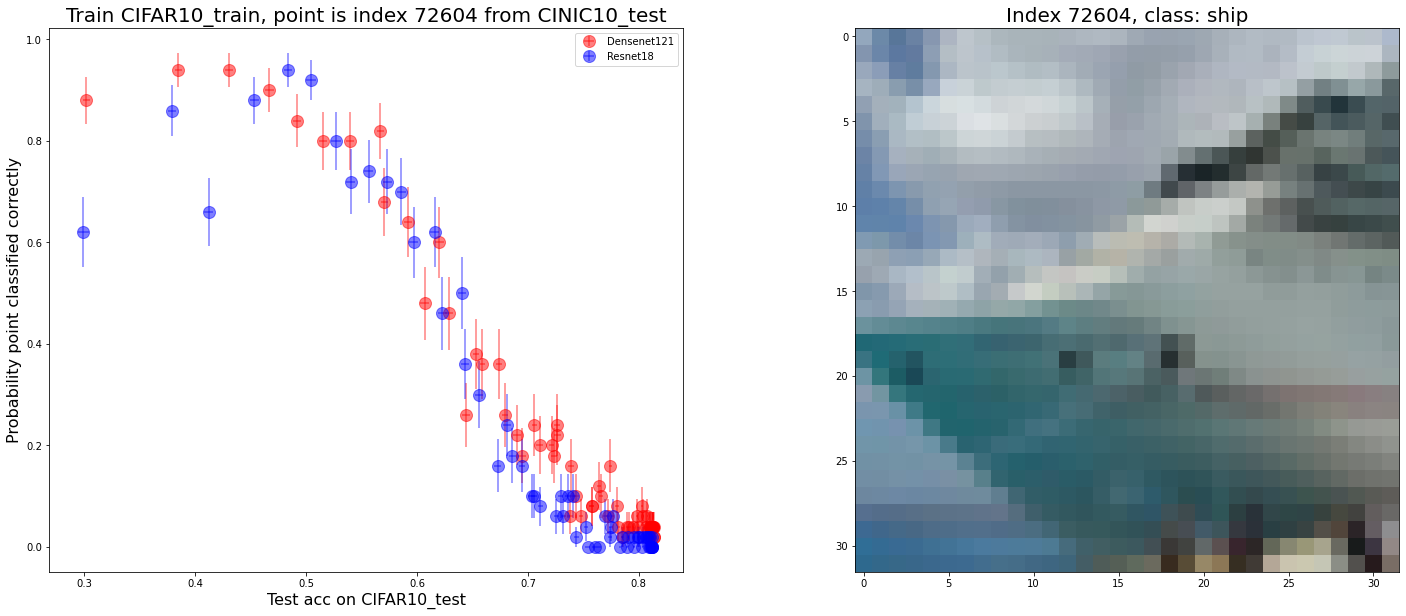

index 79915


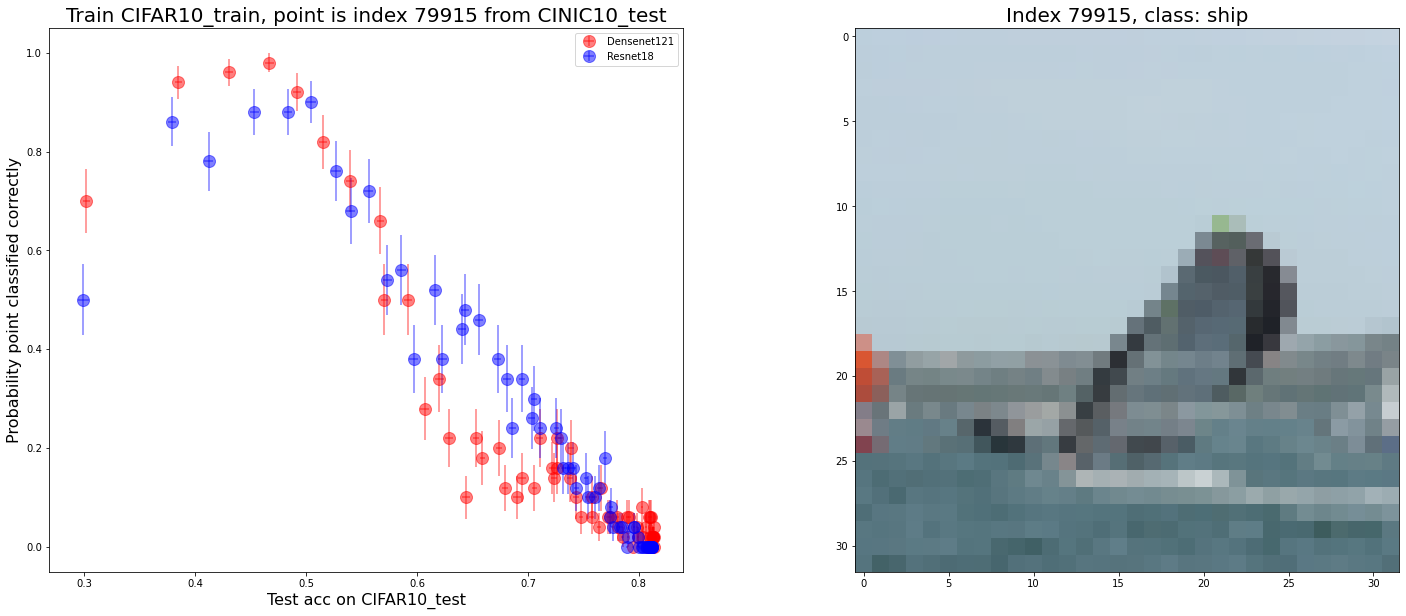

index 75846


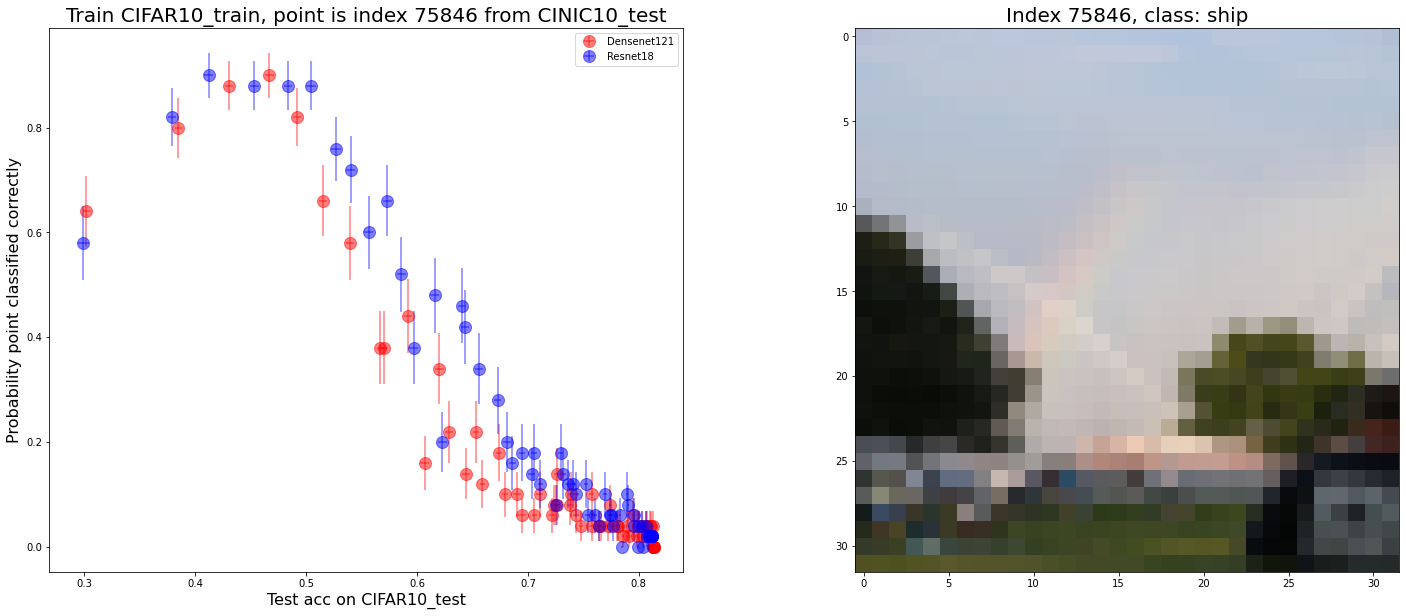

index 86418


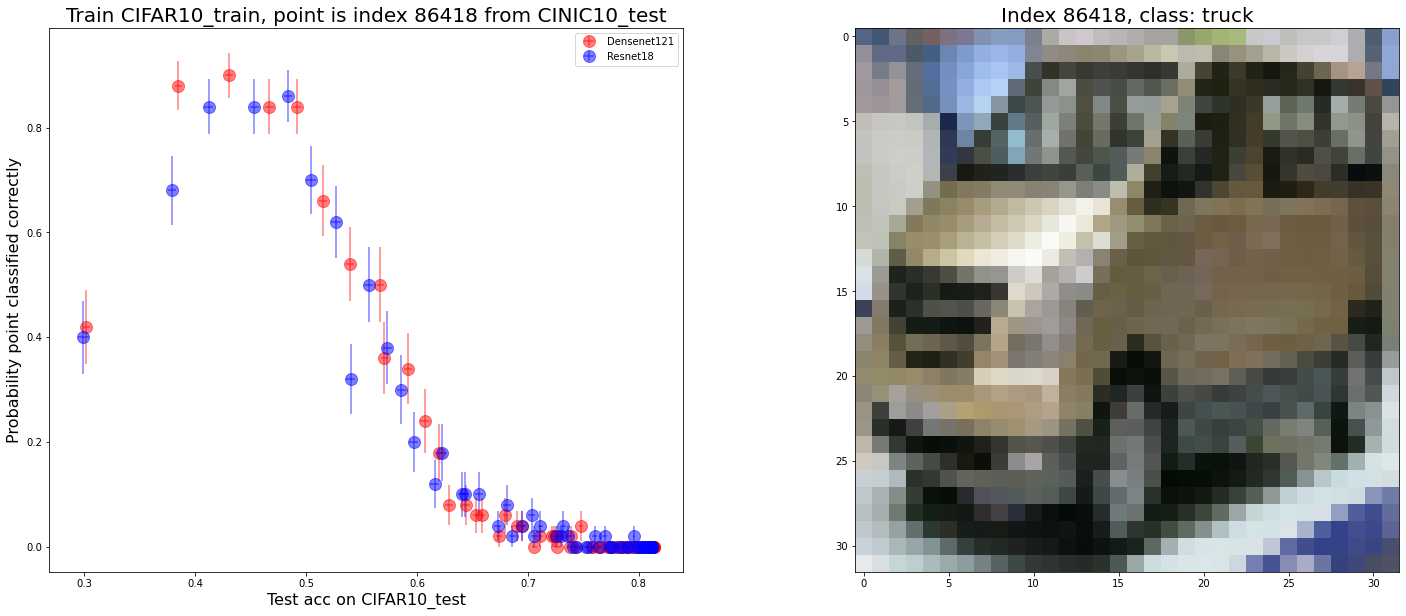

index 62388


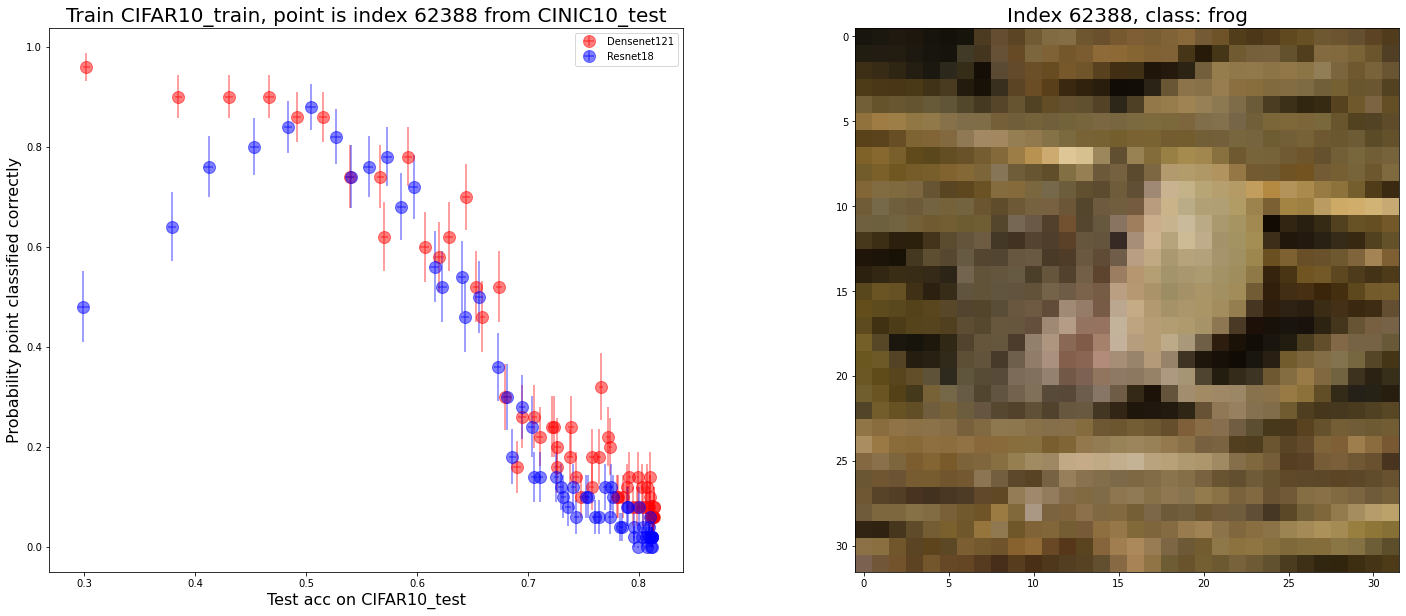

index 78922


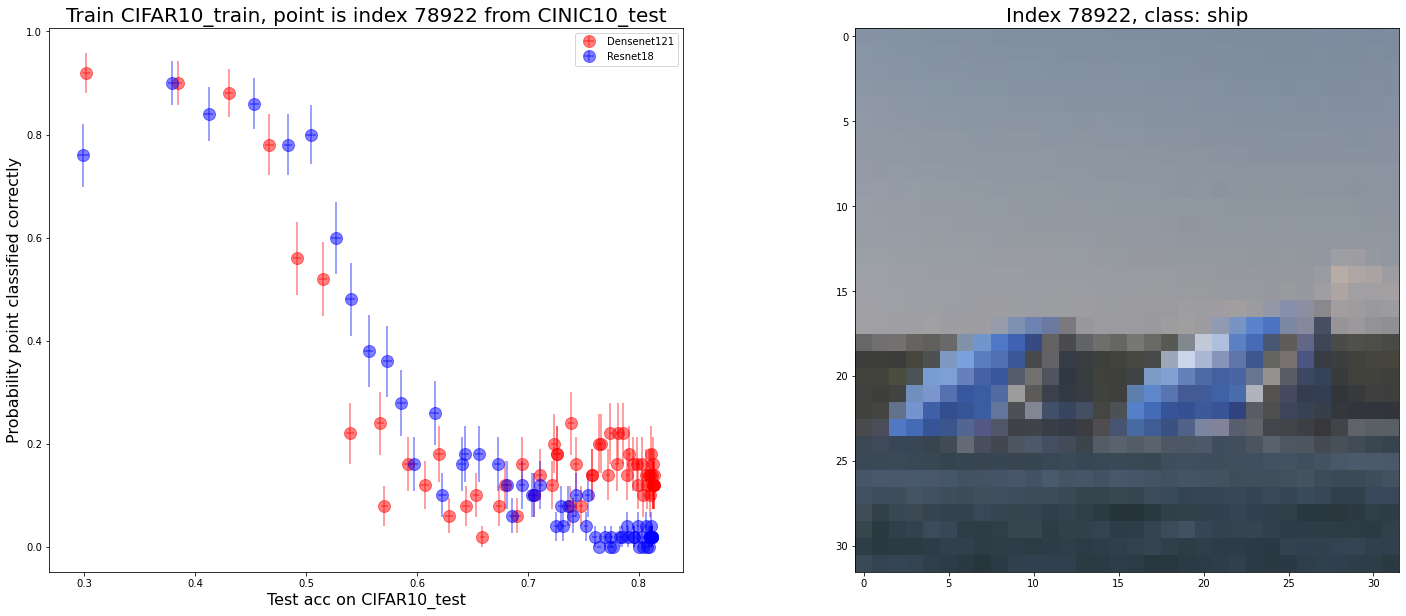

index 88112


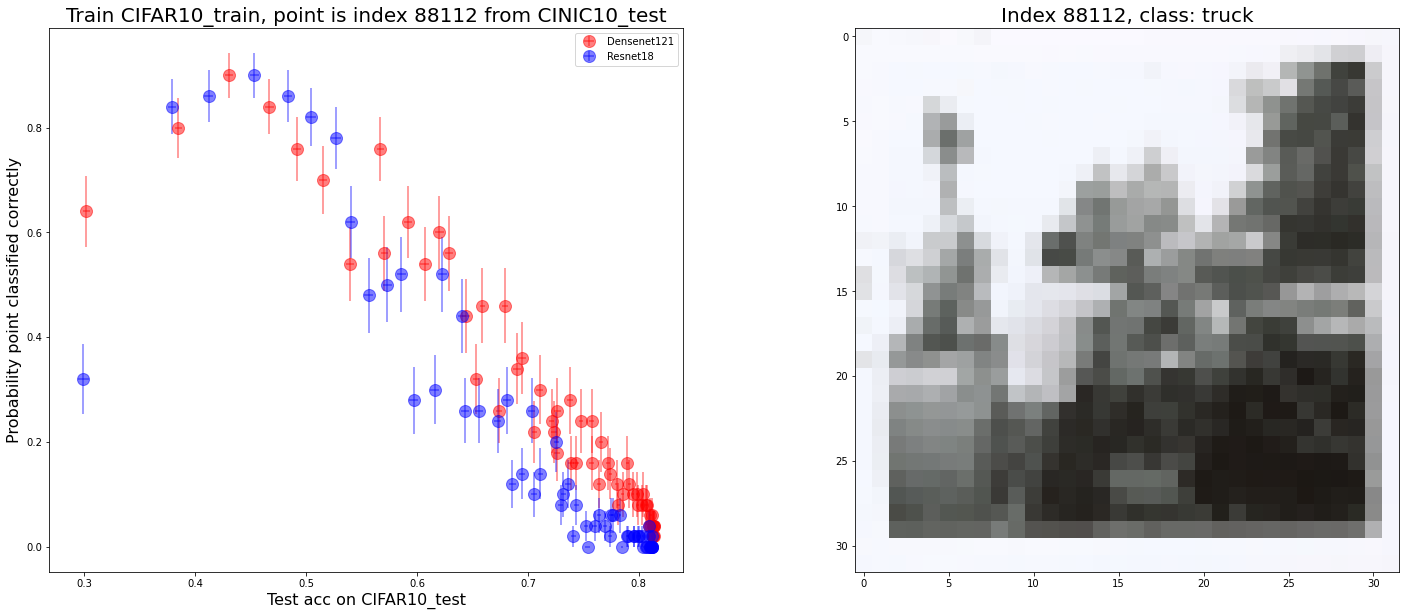

index 70374


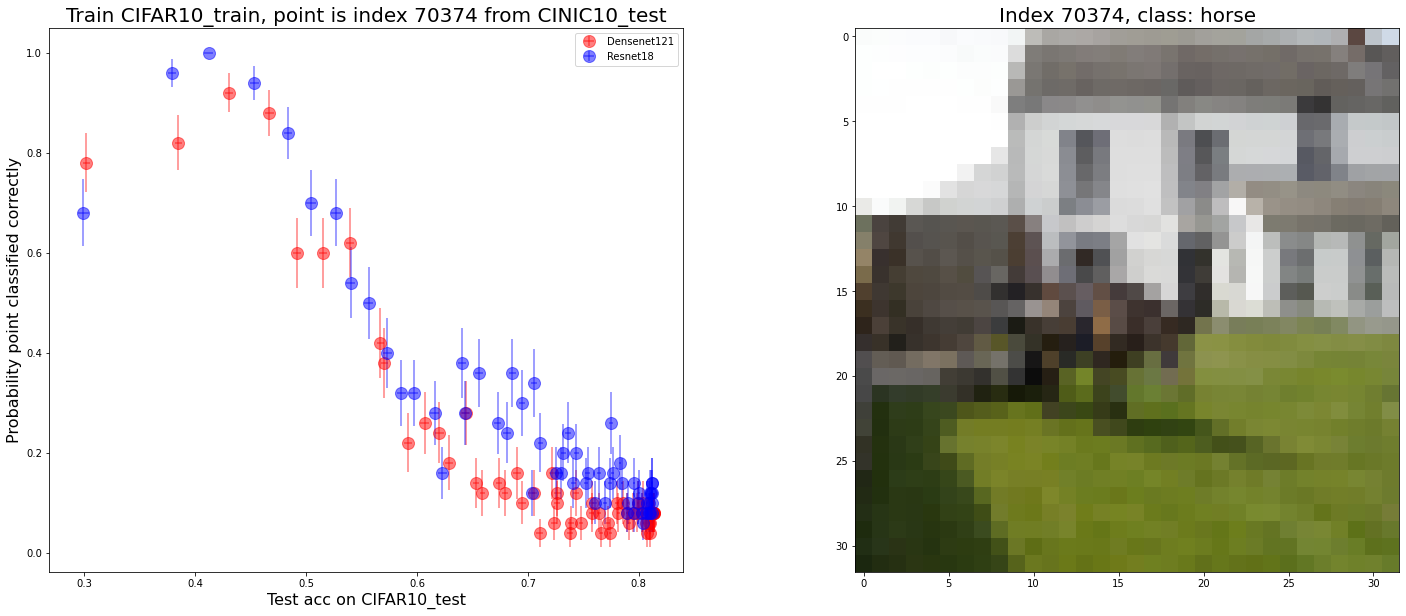

index 65941


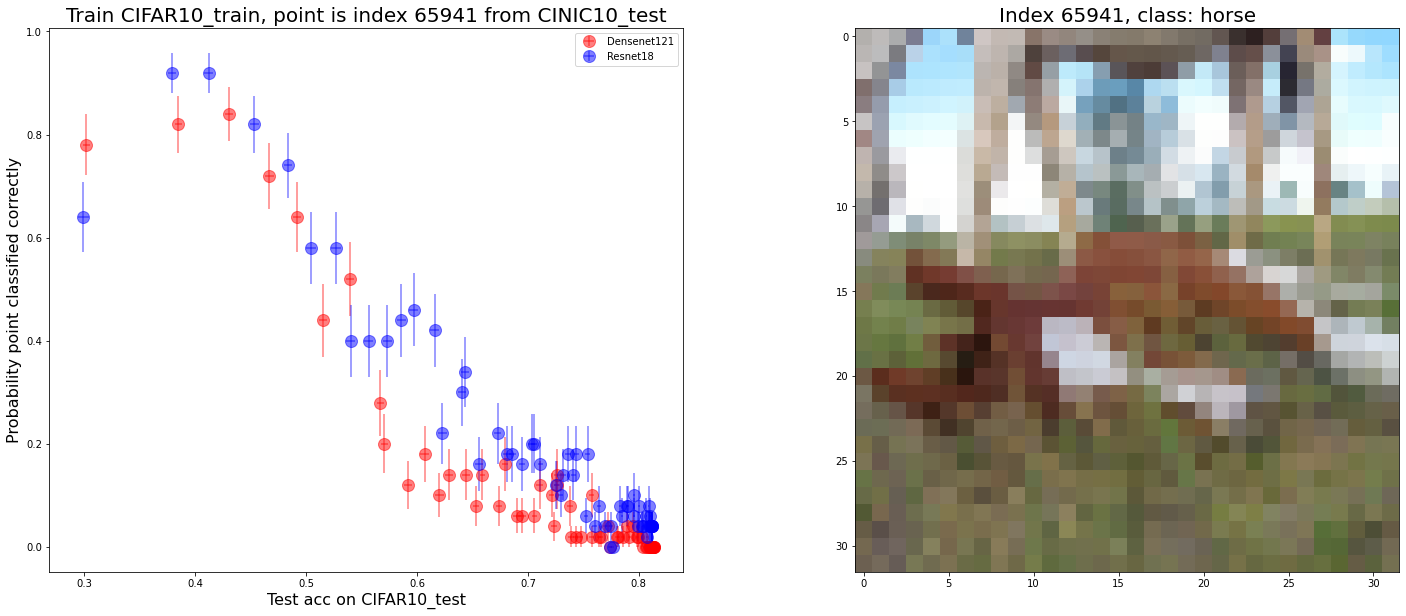

index 75803


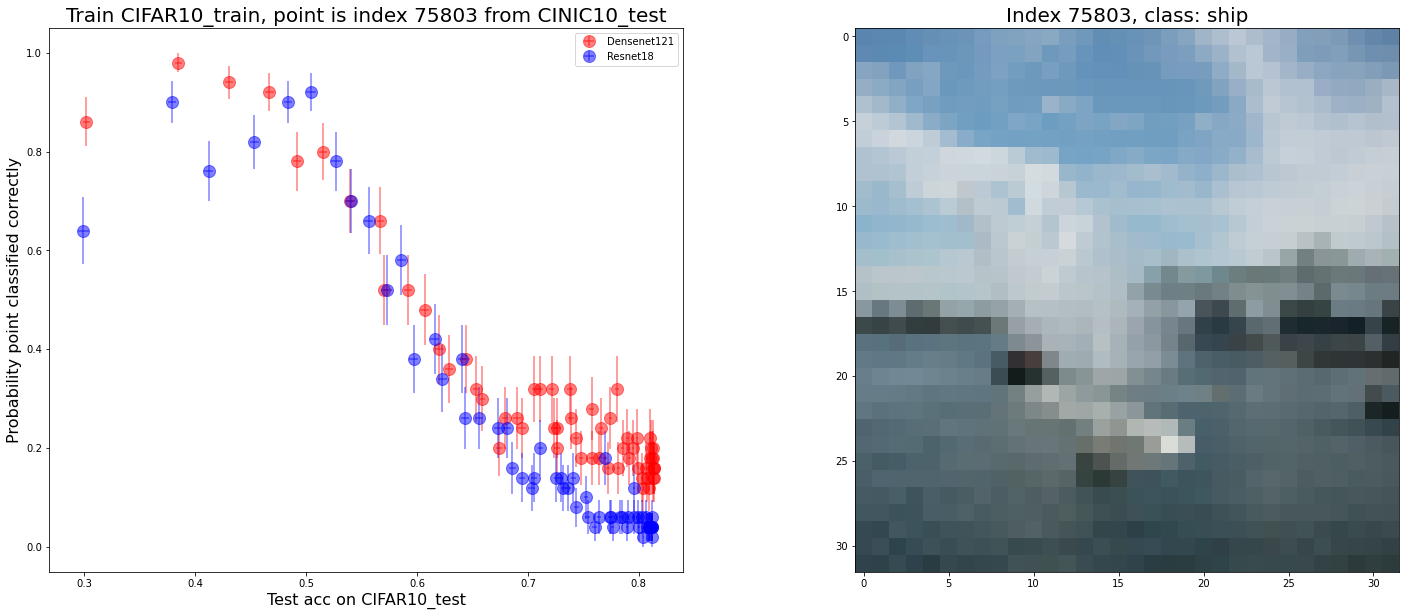

index 75826


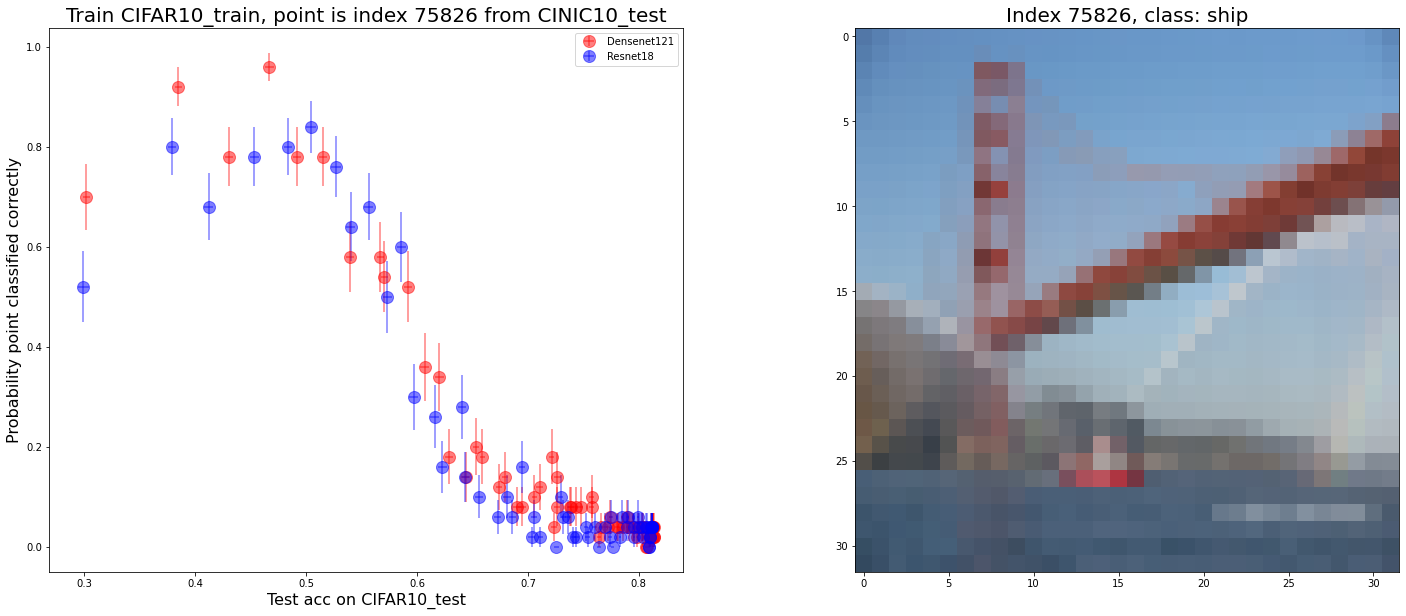

index 78927


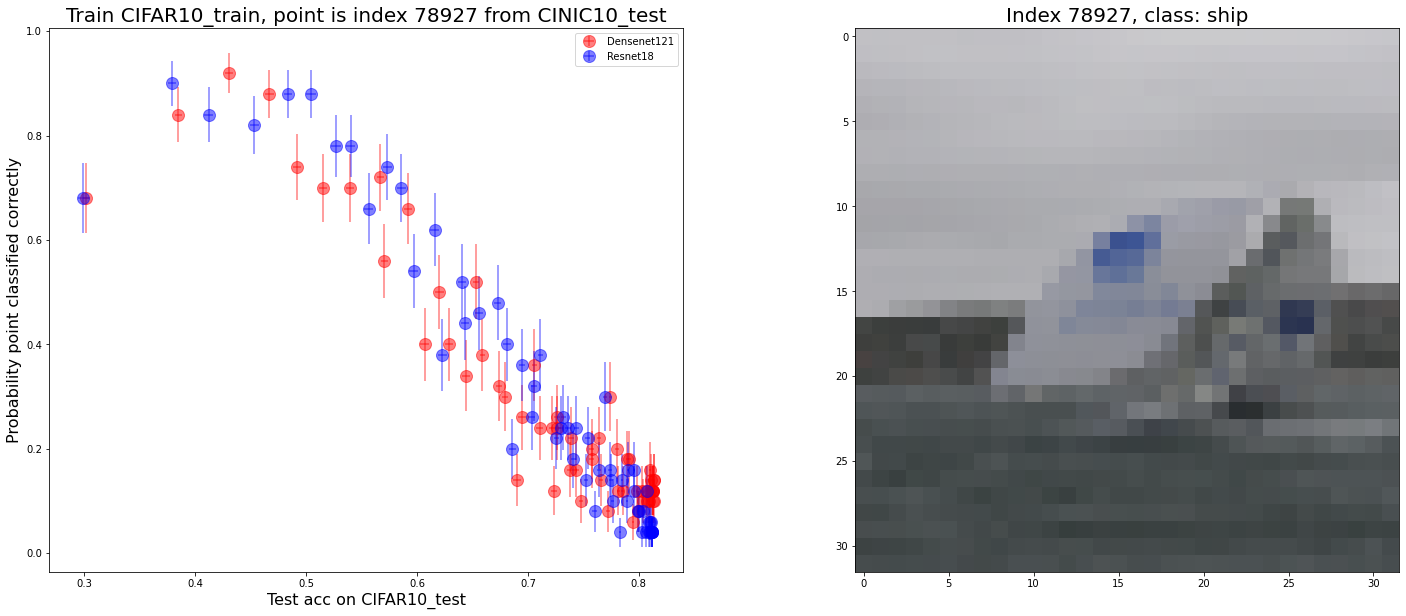

index 86506


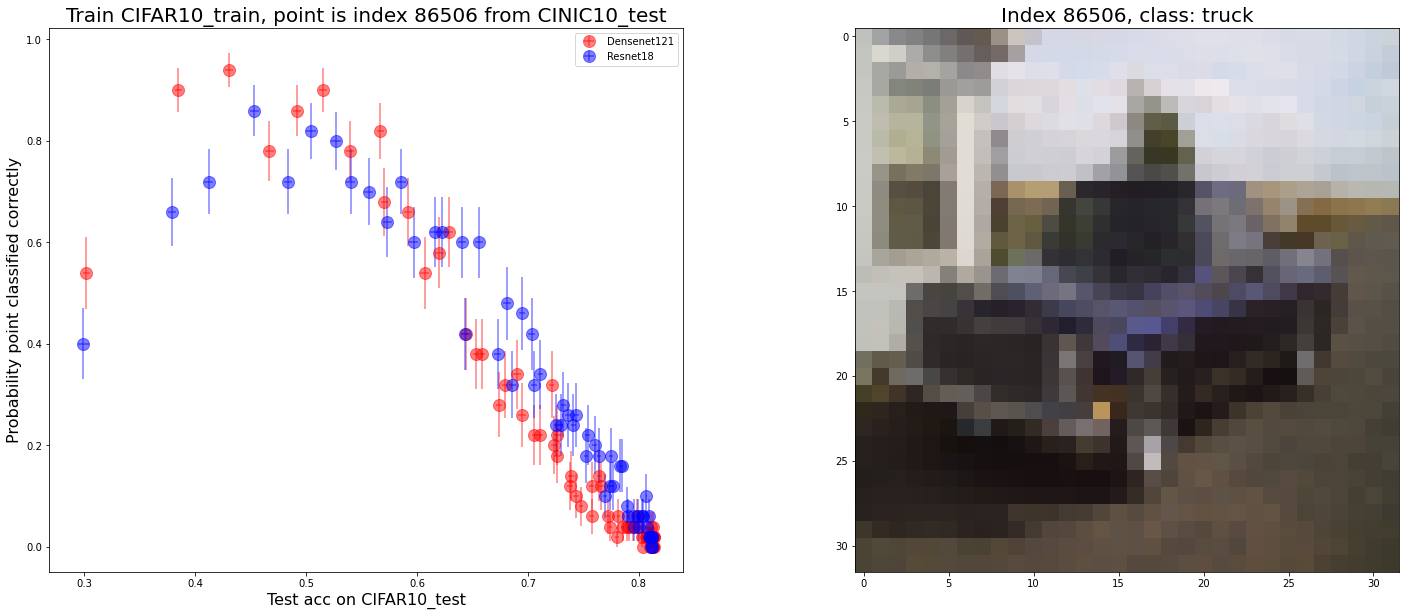

index 14348


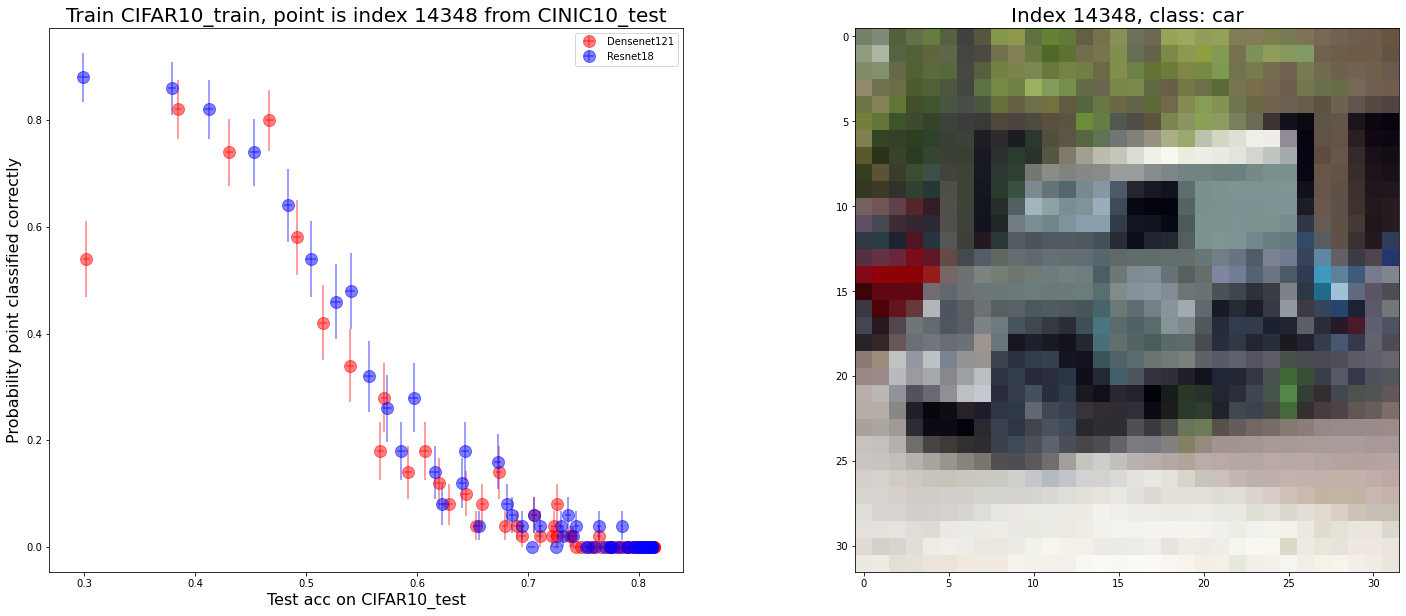

index 16314


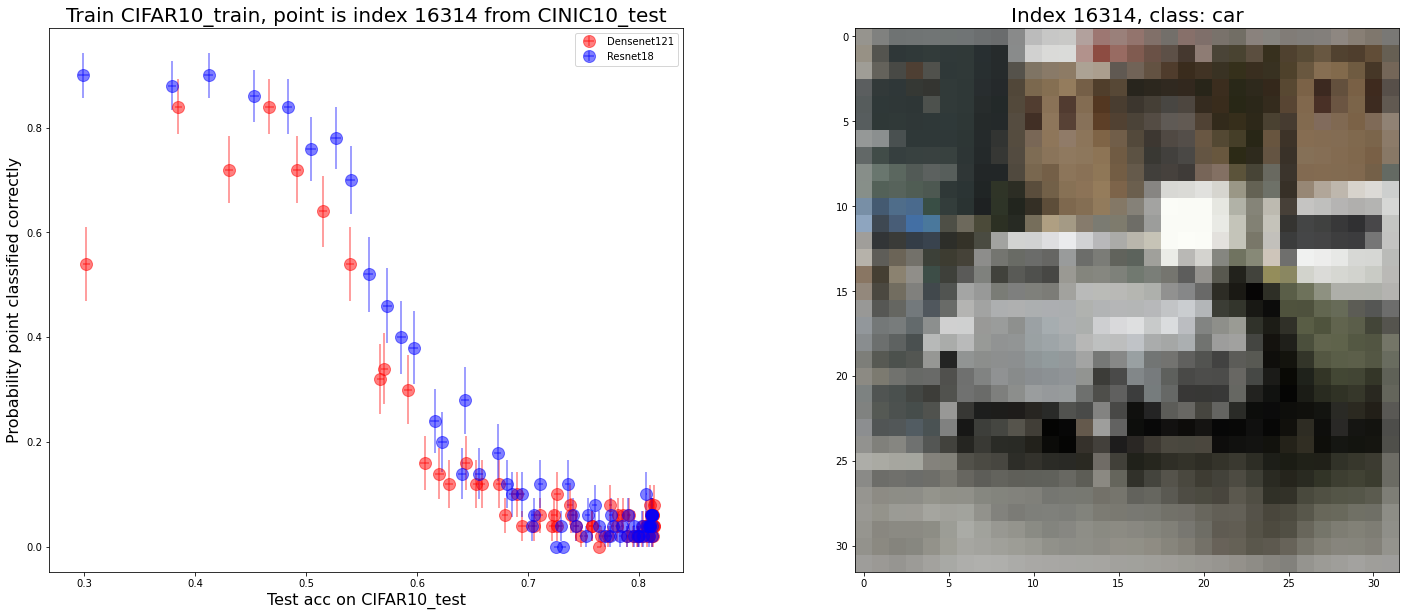

index 57024


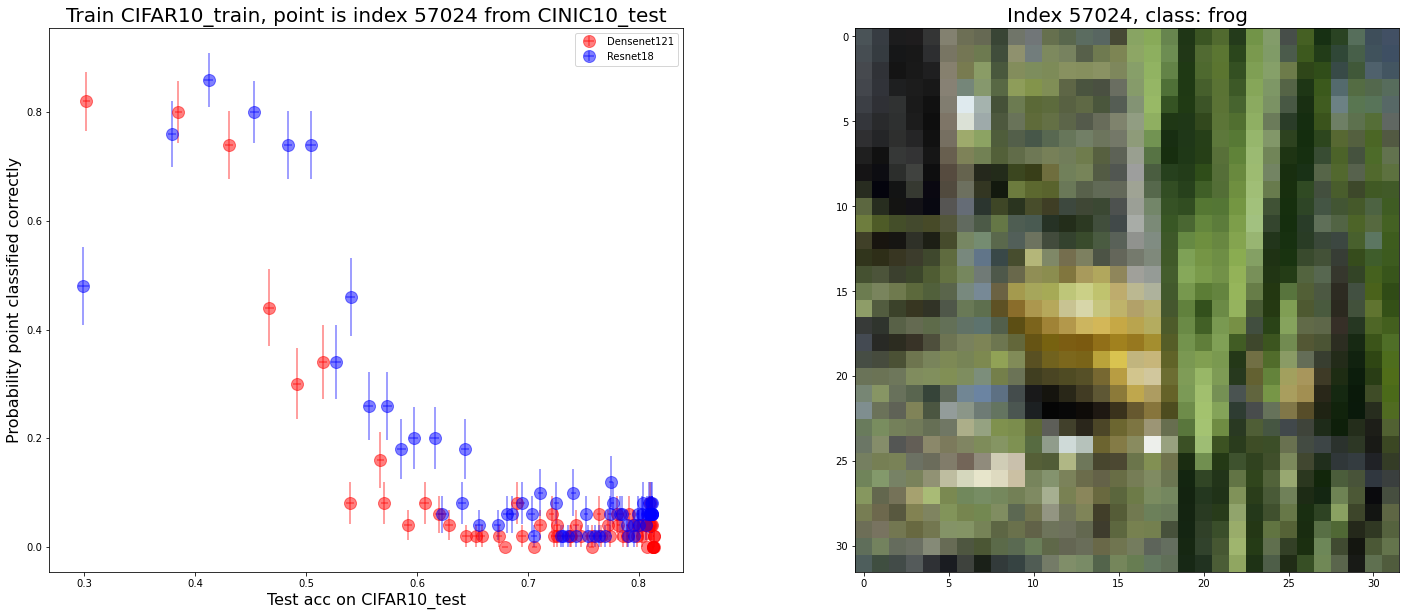

index 75990


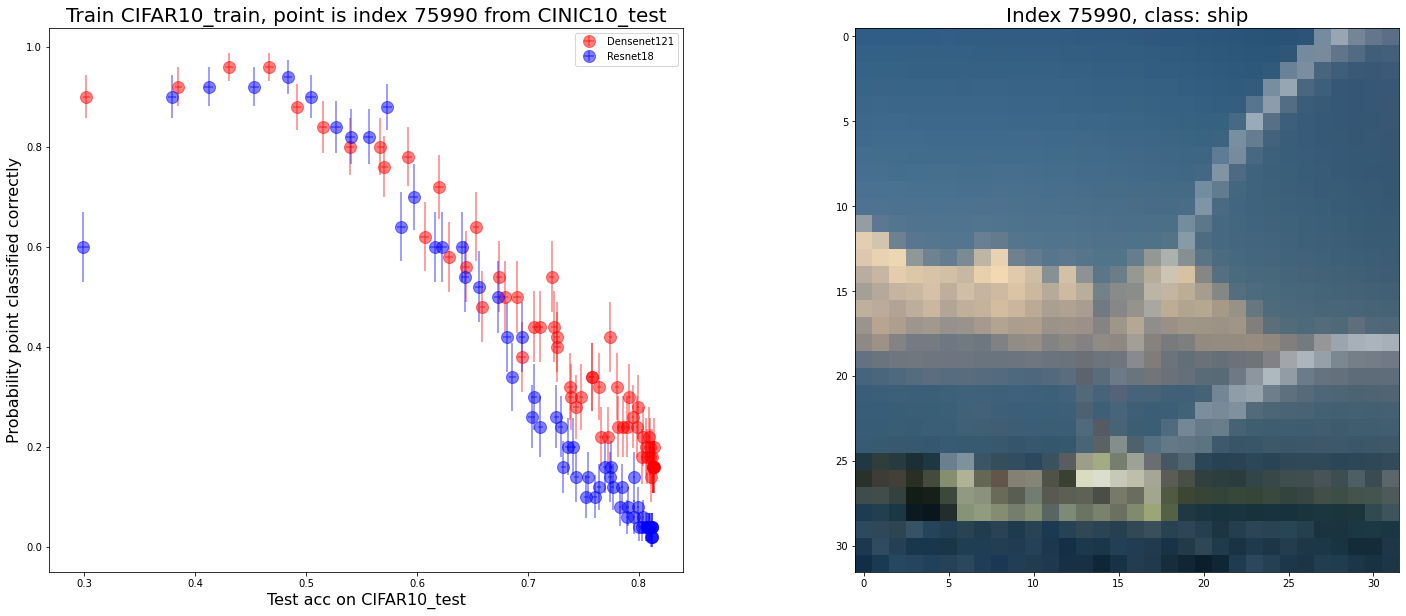

index 11136


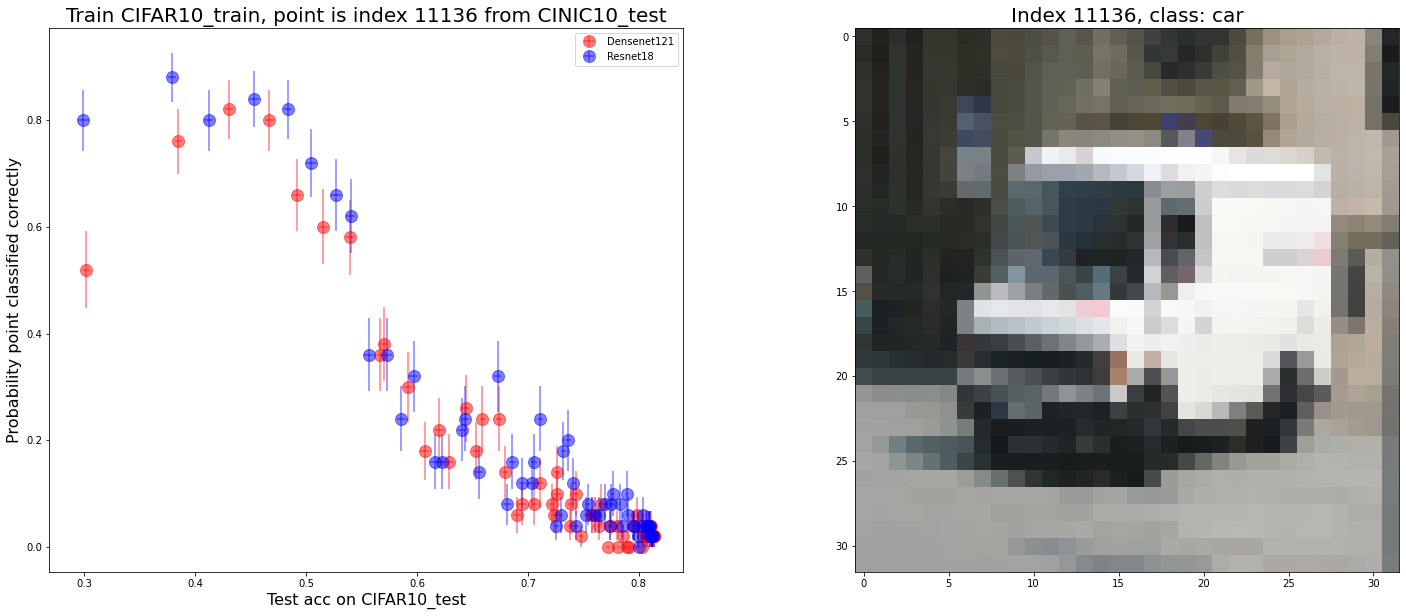

index 11189


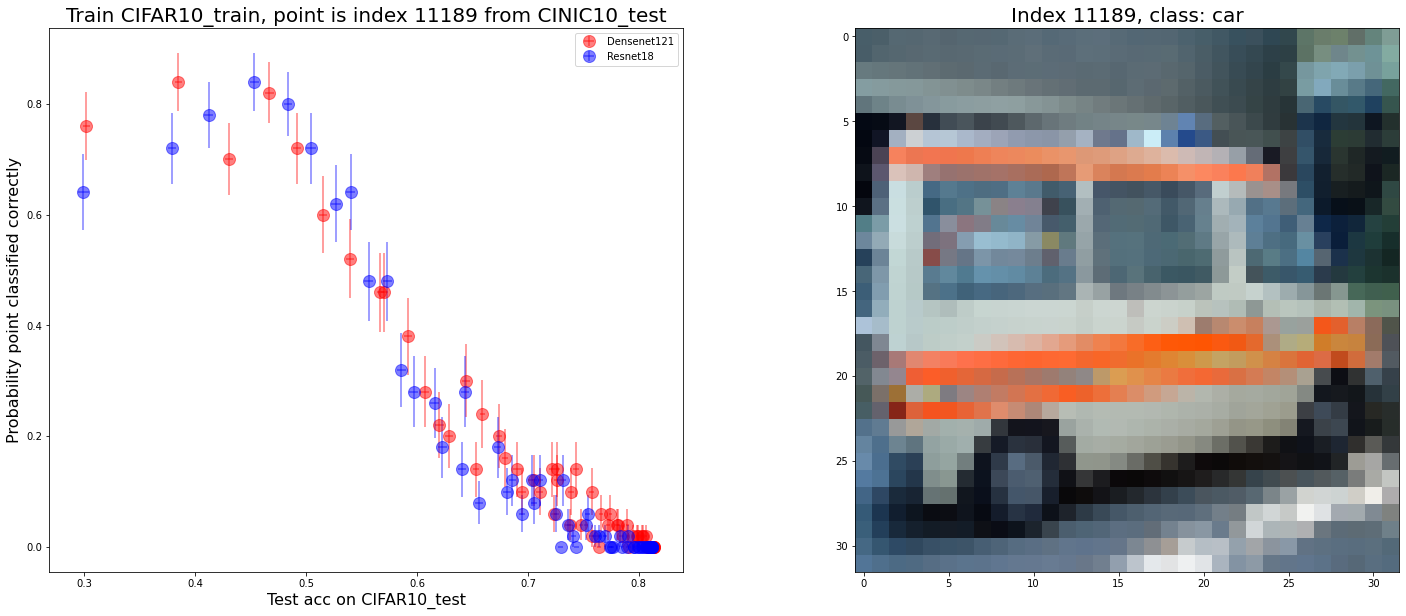

index 69928


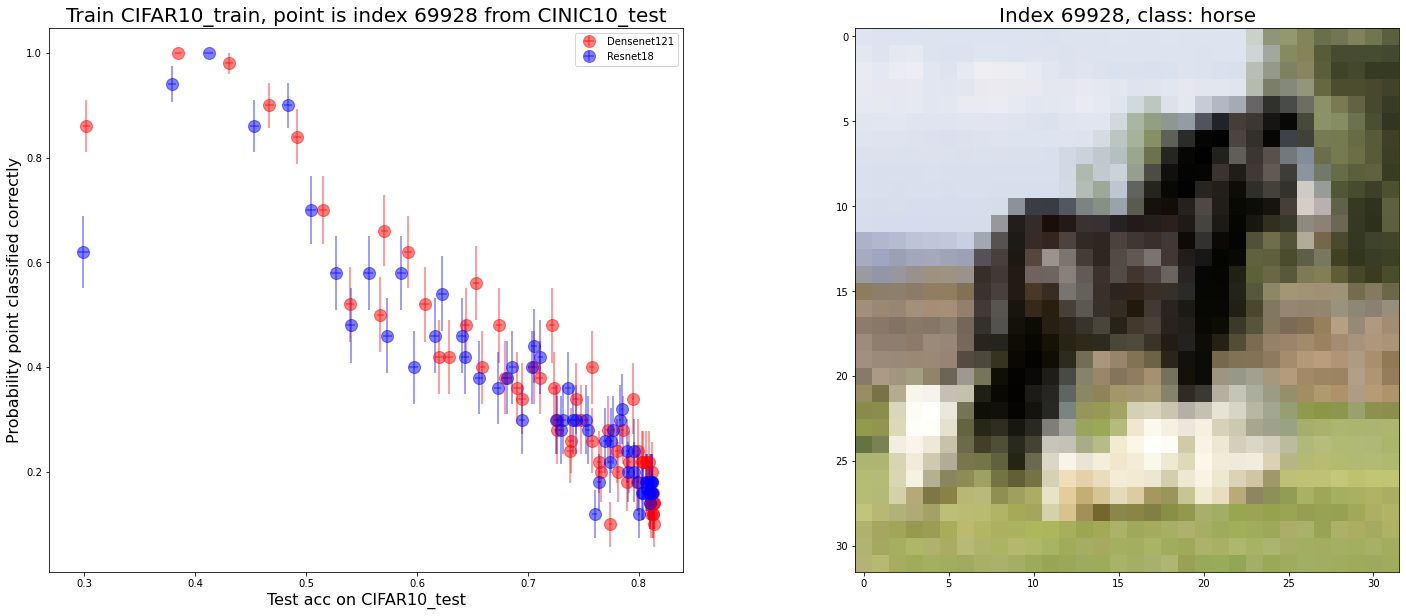

index 86289


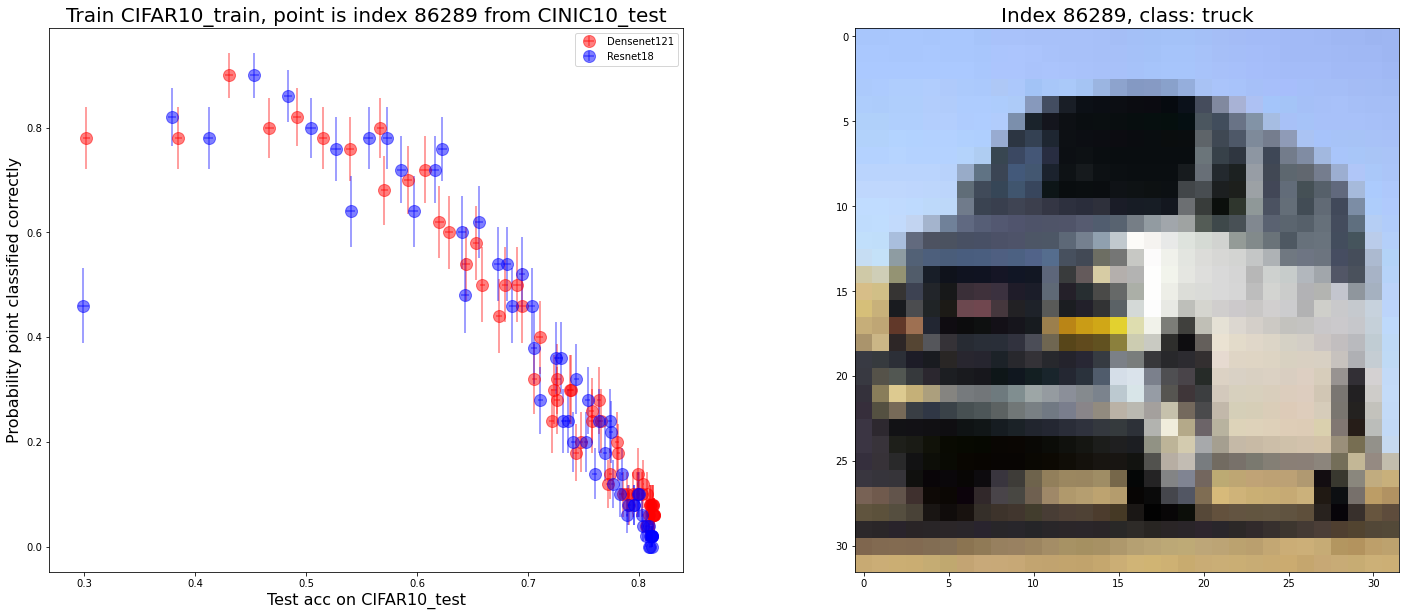

index 62153


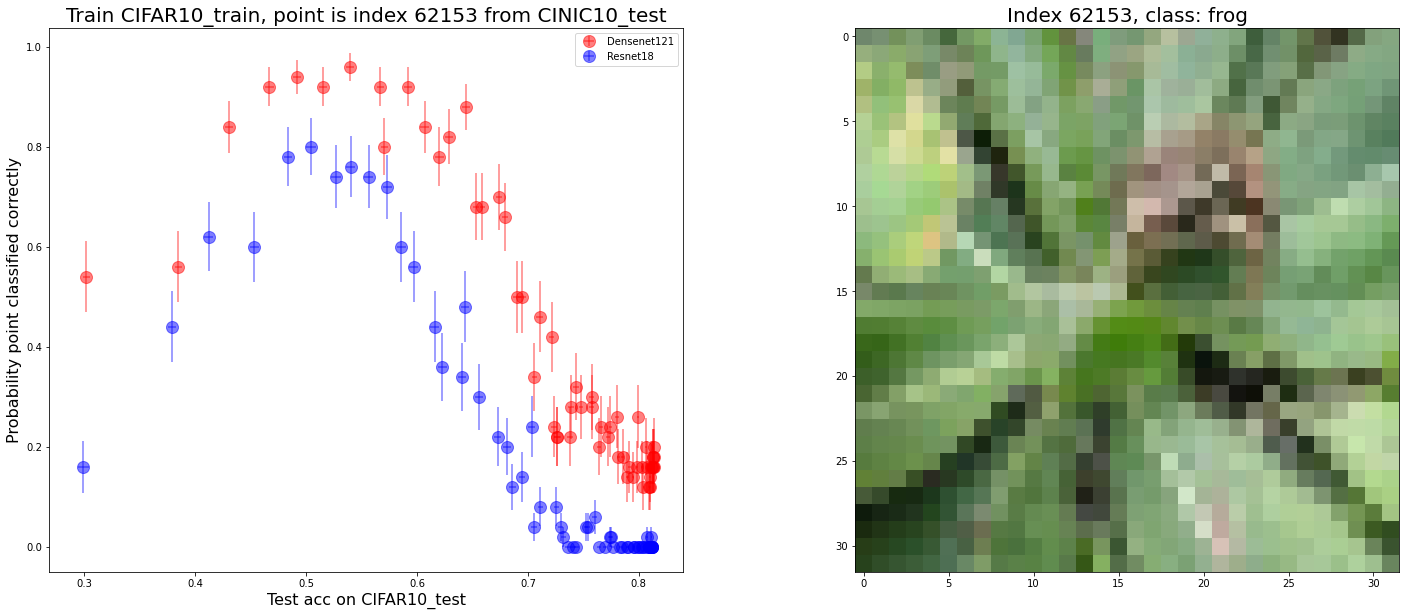

index 86481


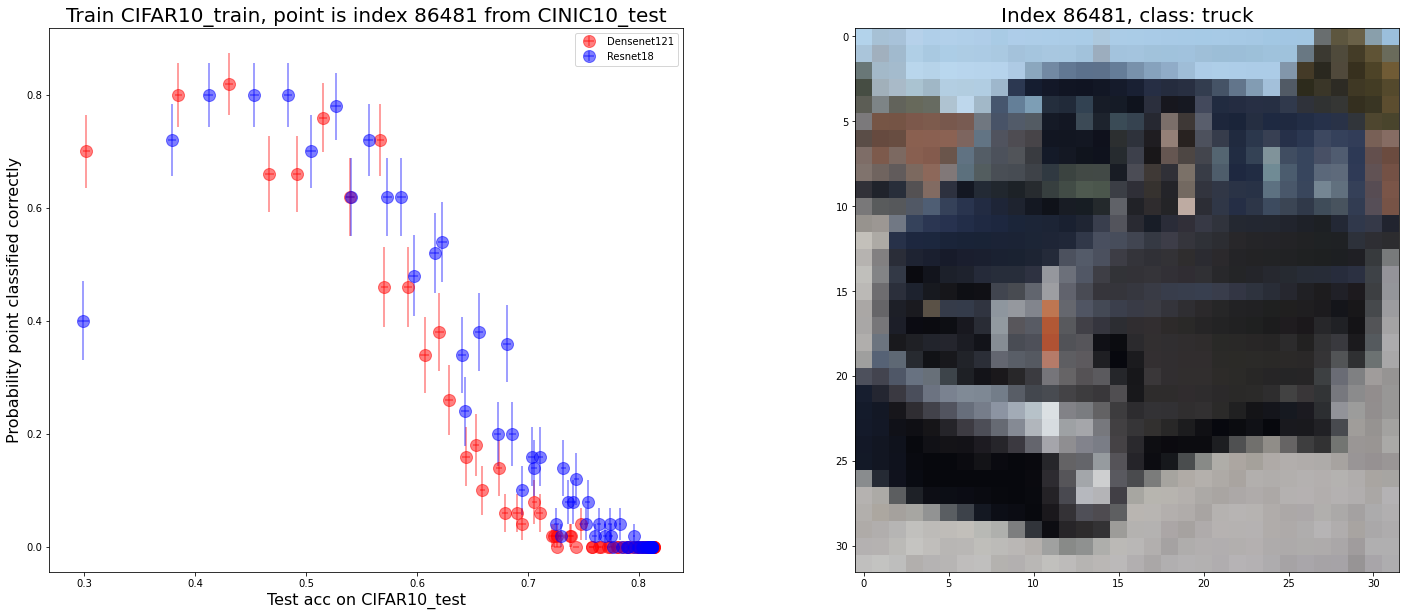

index 24468


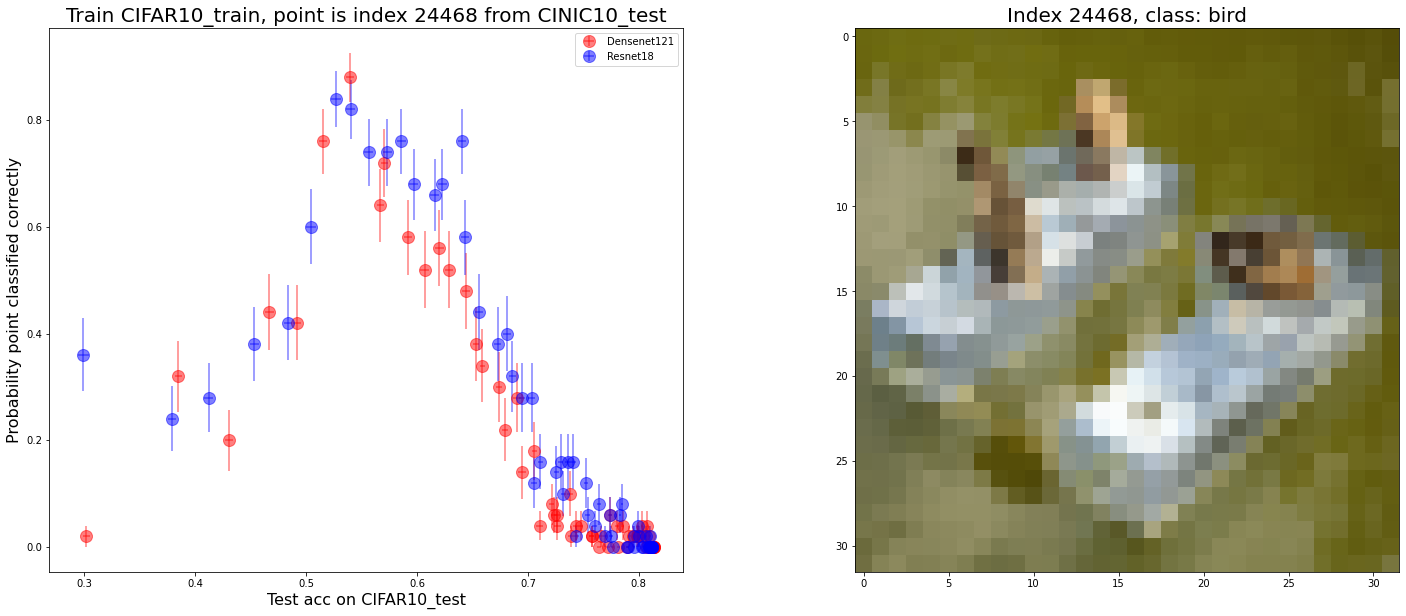

index 88162


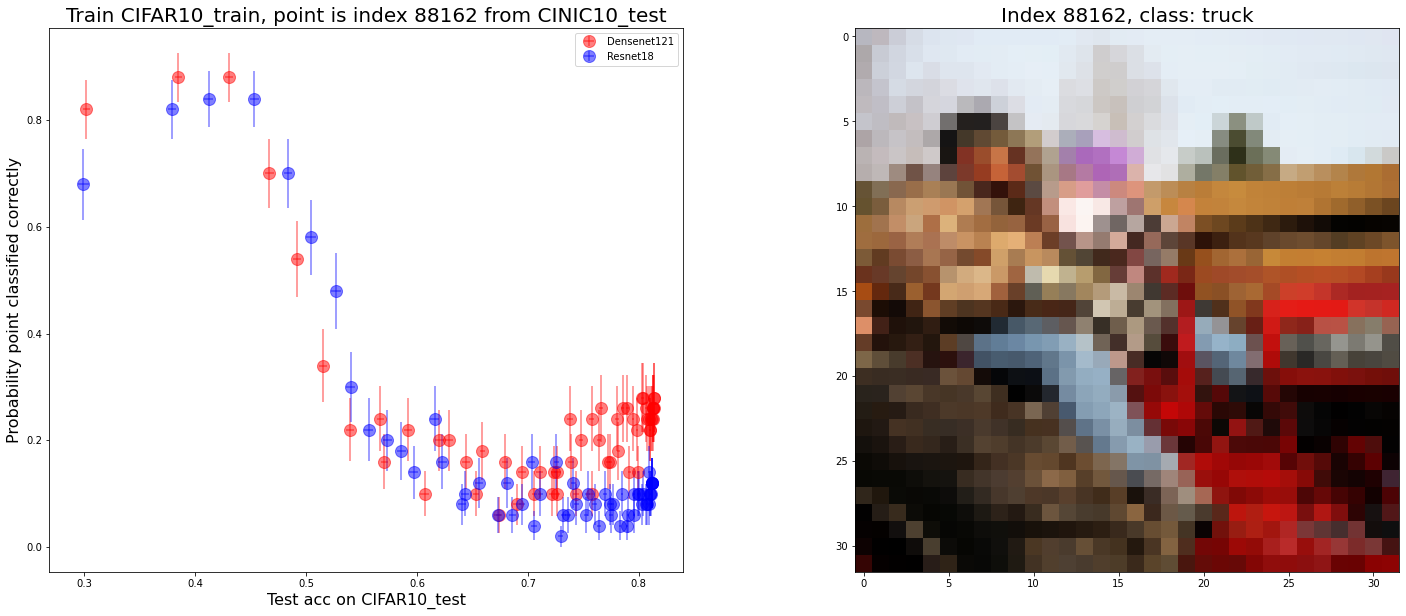

index 11213


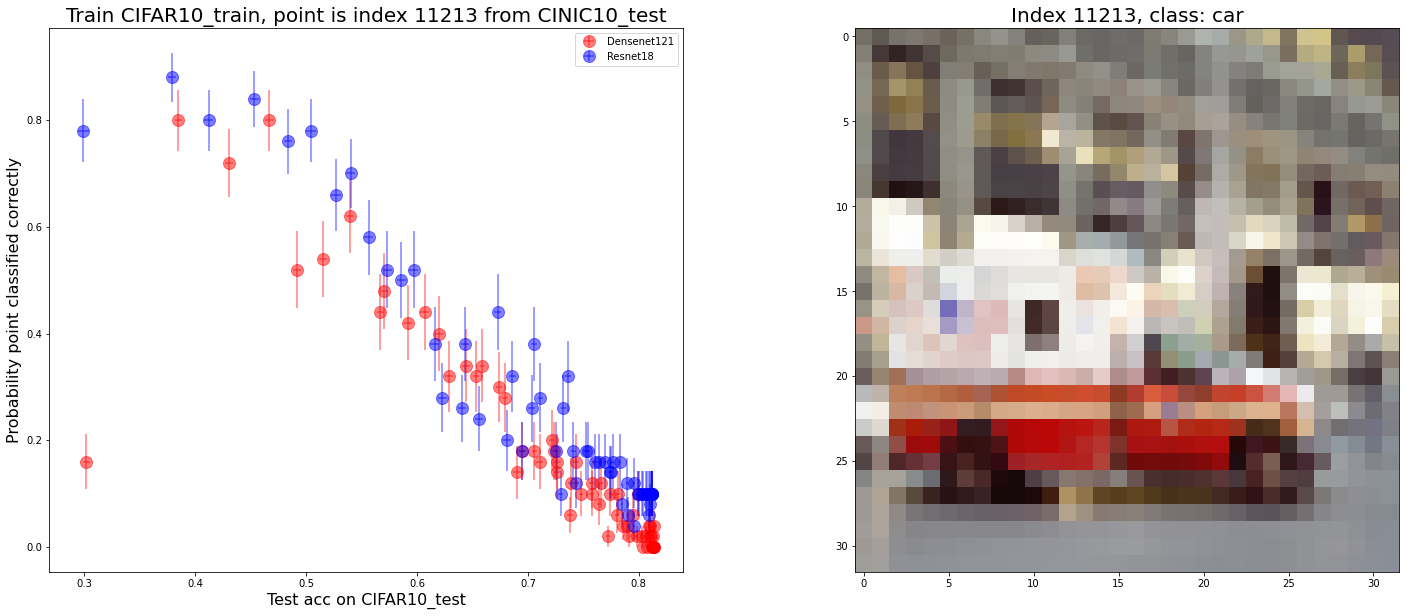

index 11252


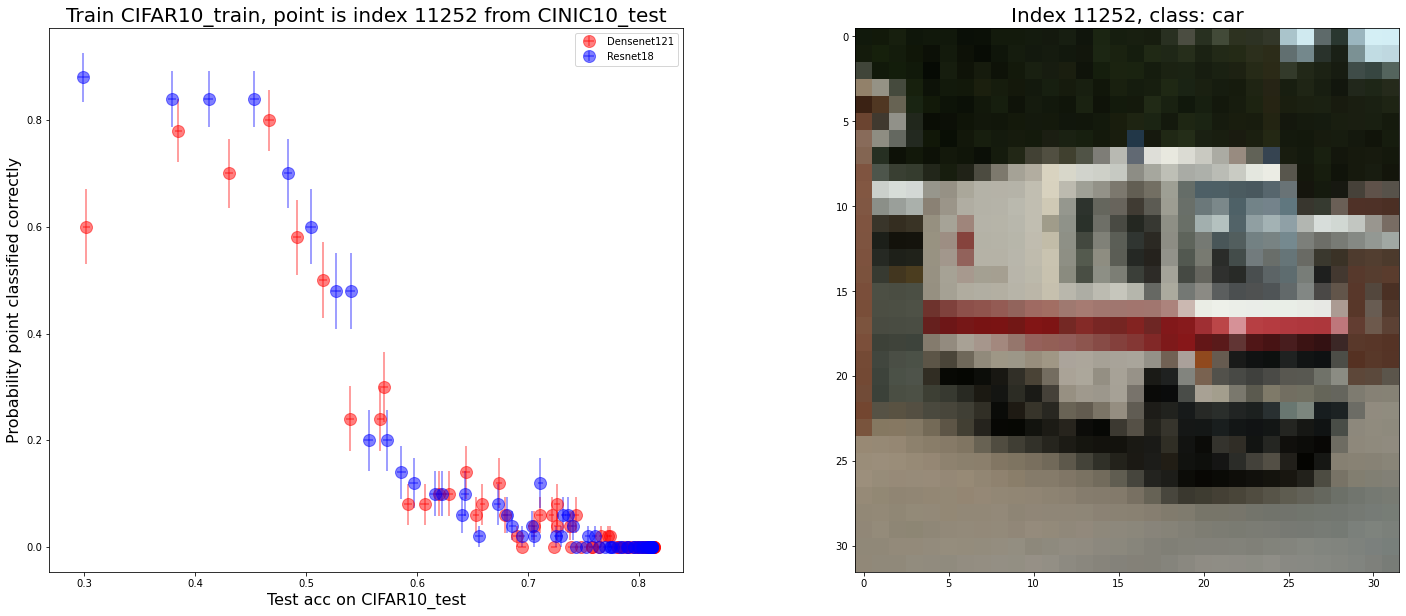

index 71327


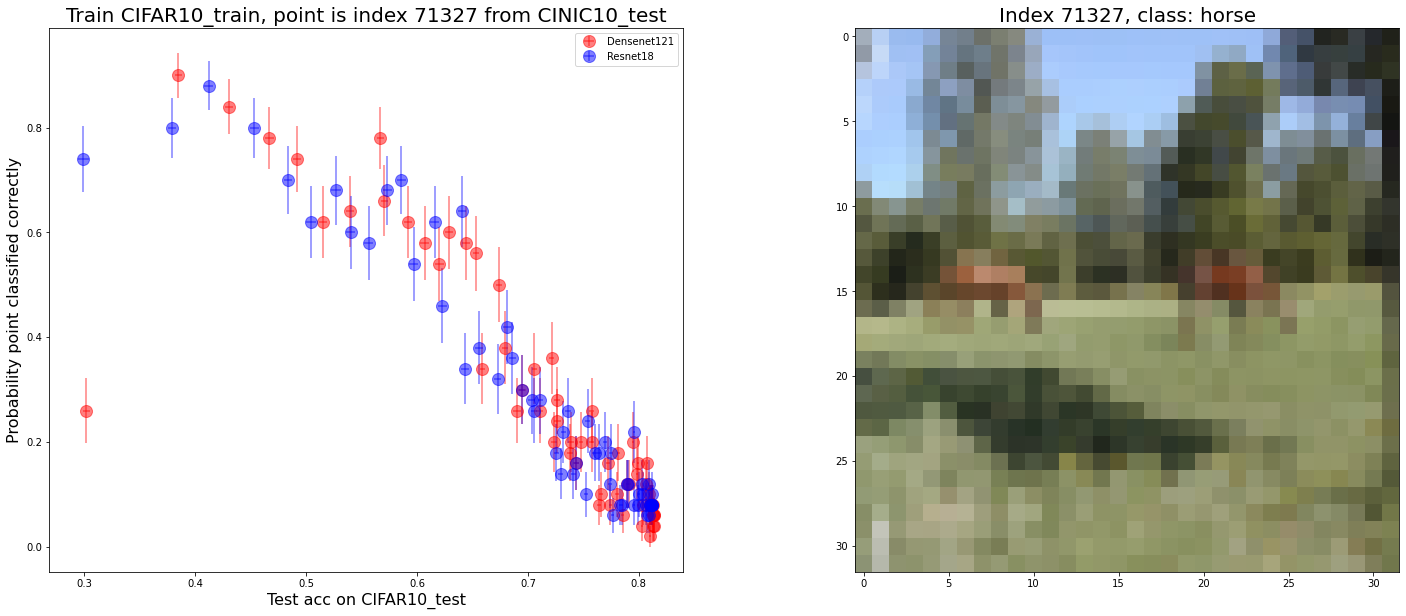

index 56564


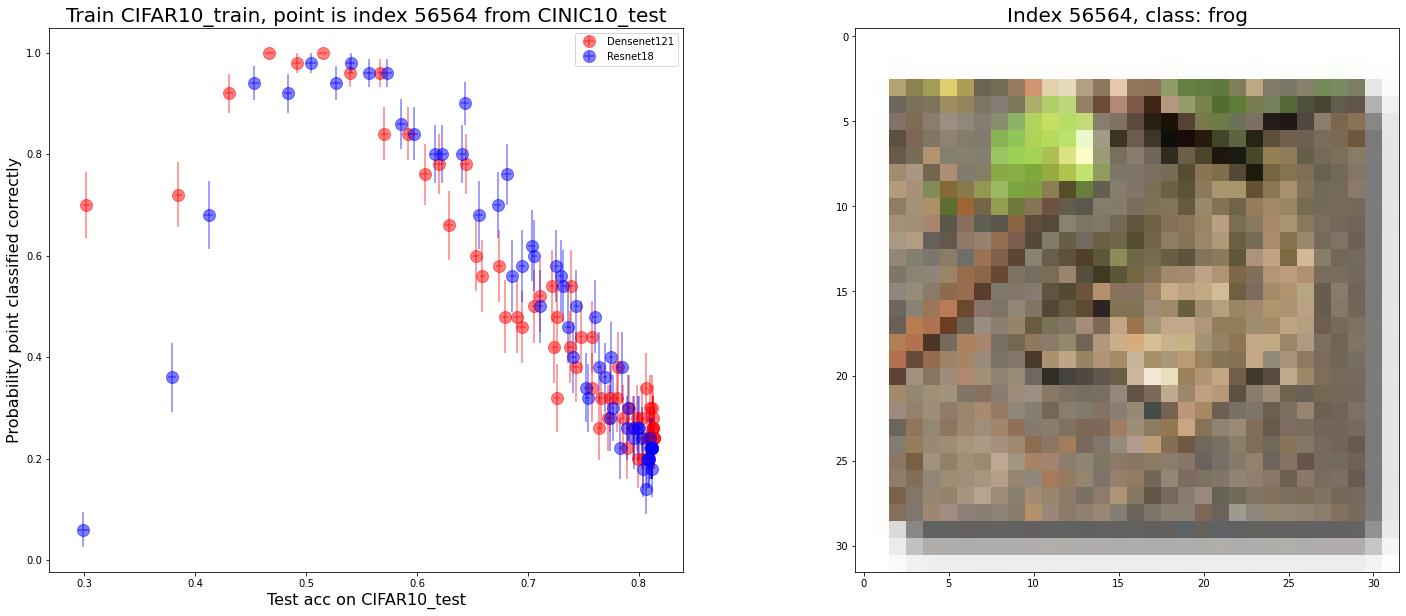

index 89583


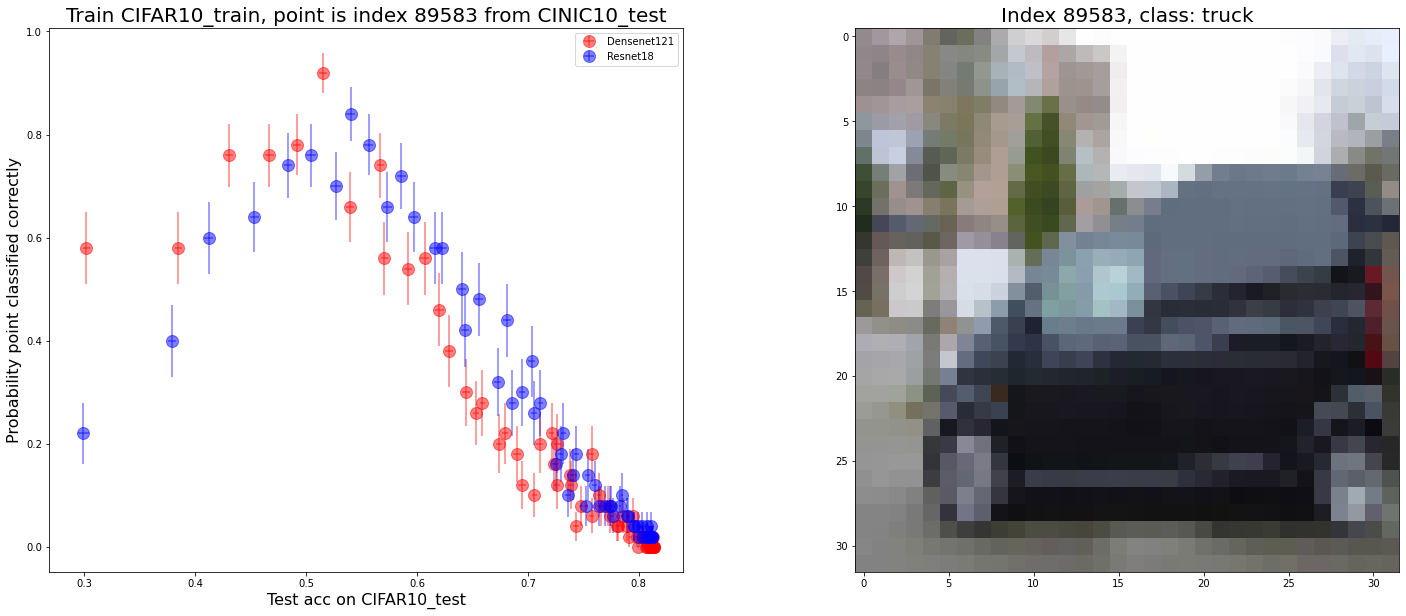

index 17975


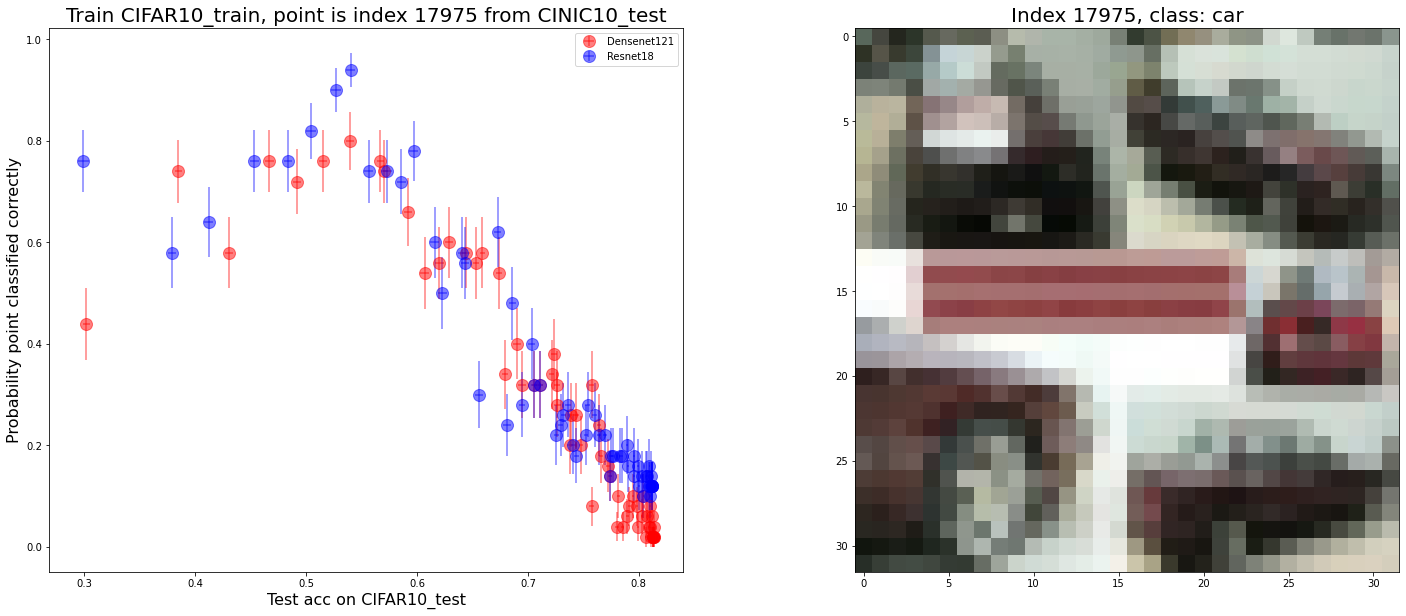

index 51339


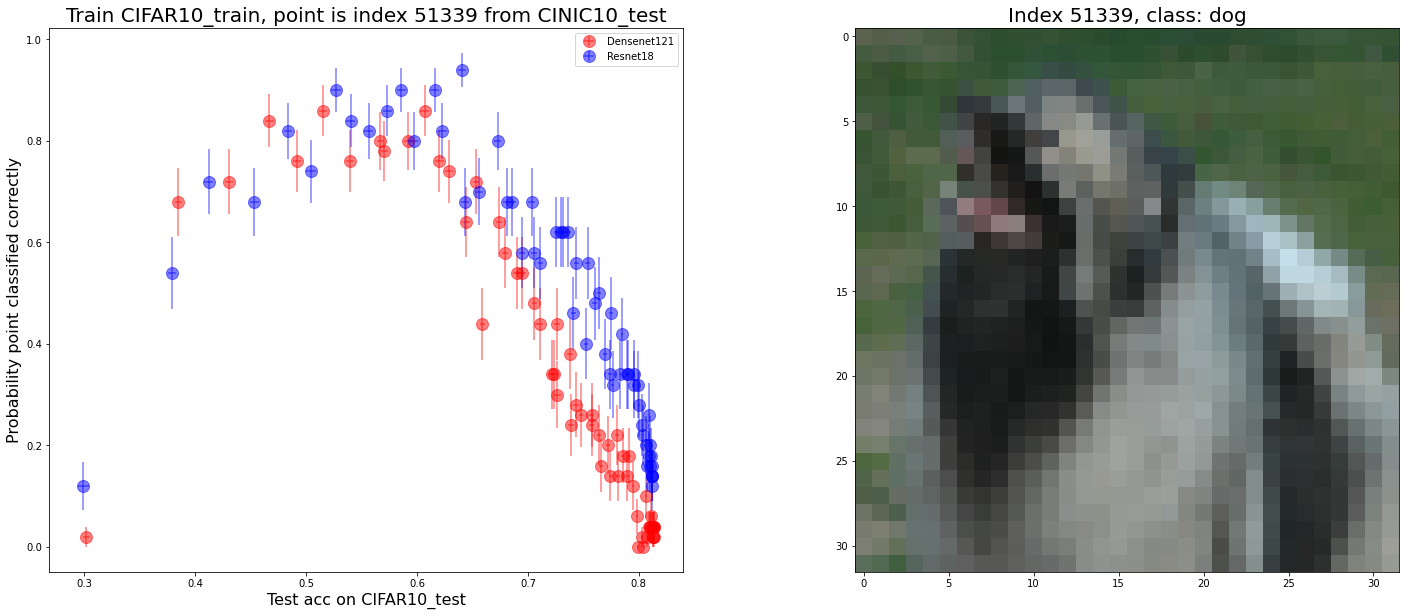

index 89637


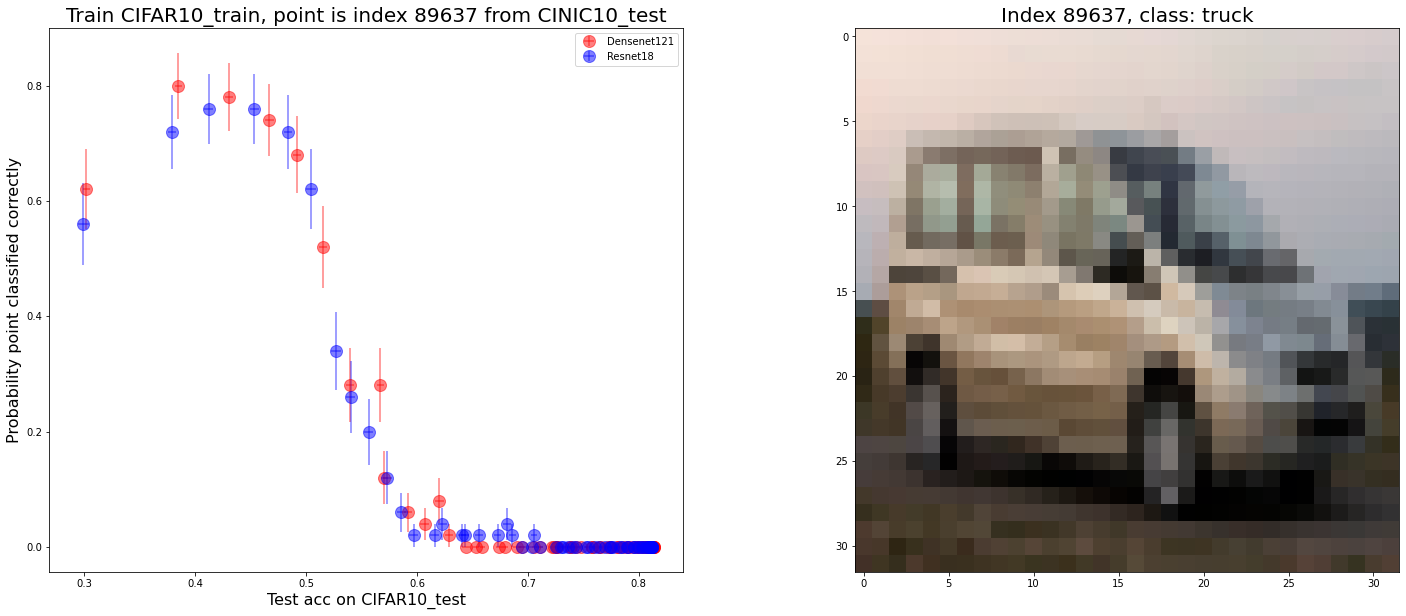

index 86421


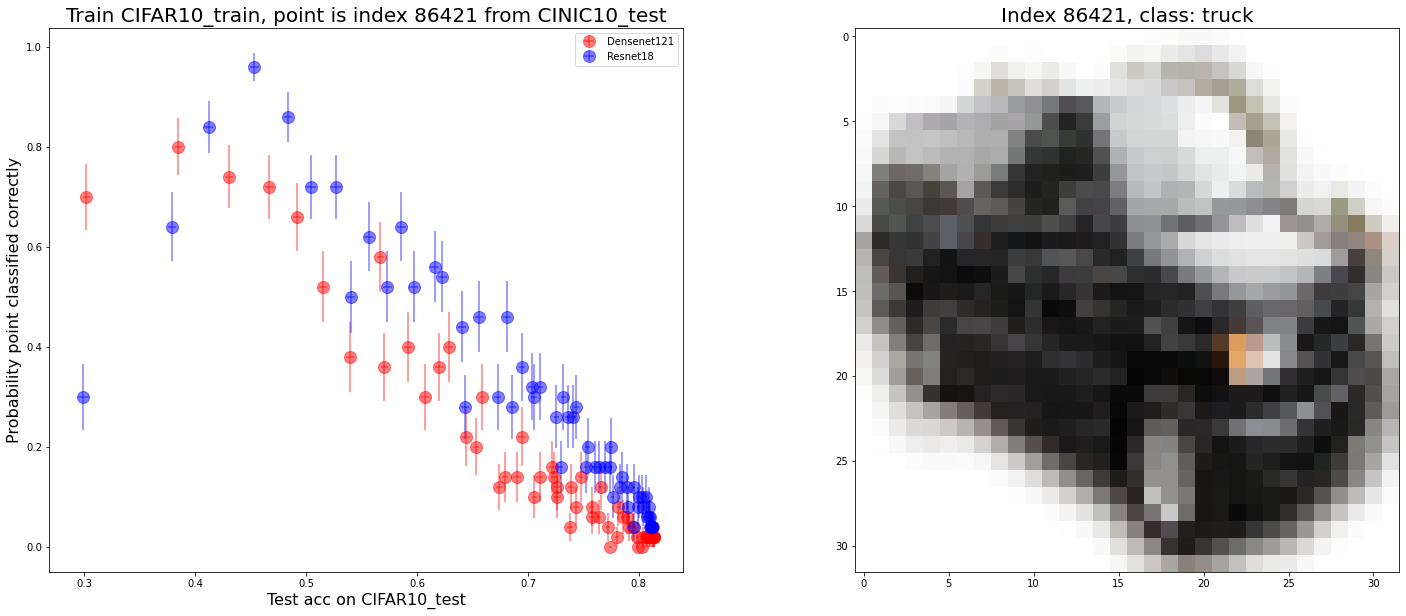

index 75855


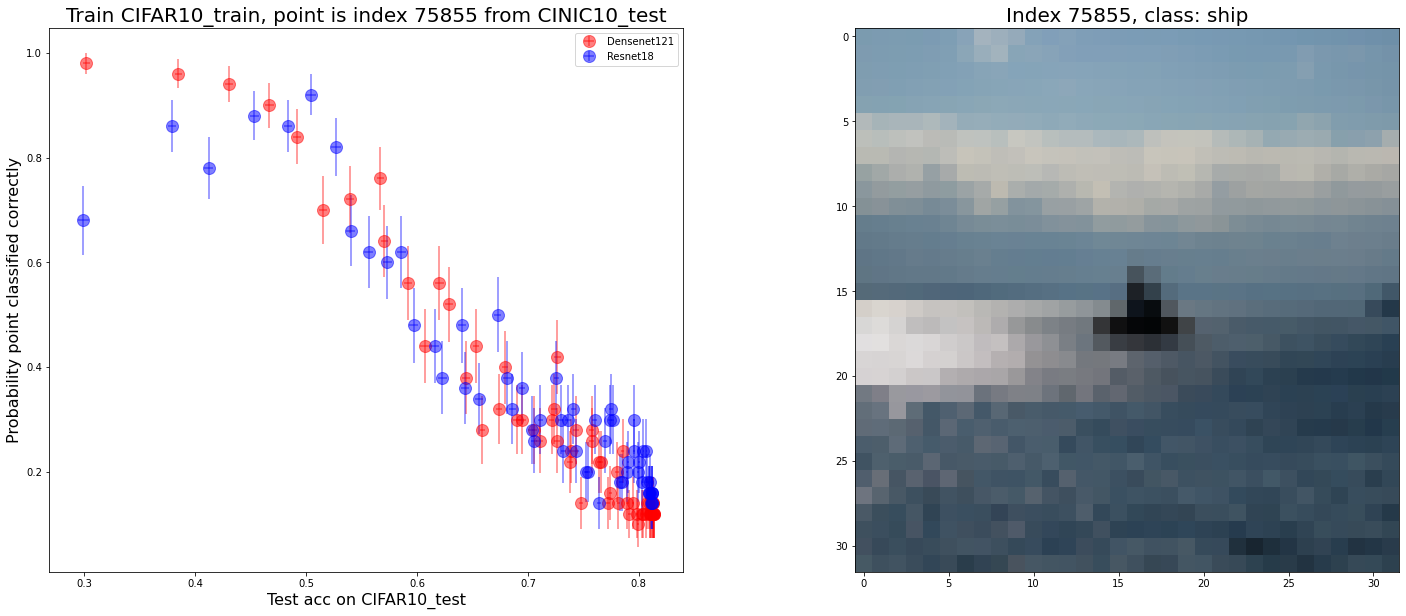

index 56350


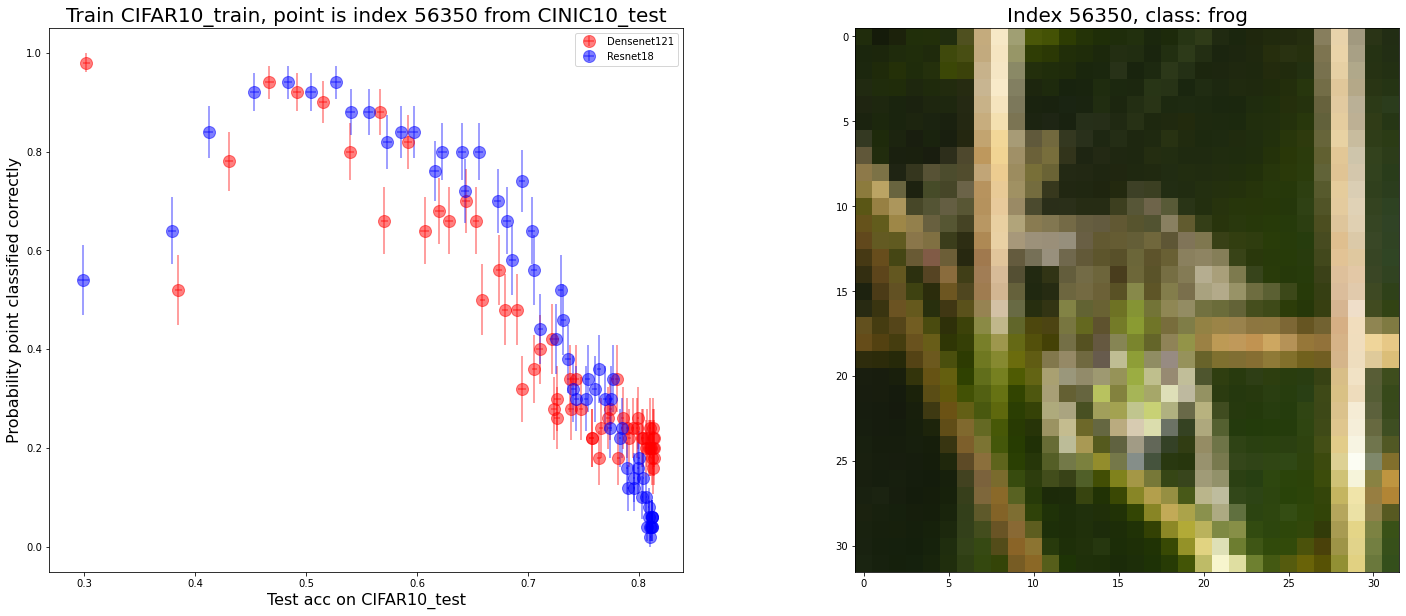

index 69257


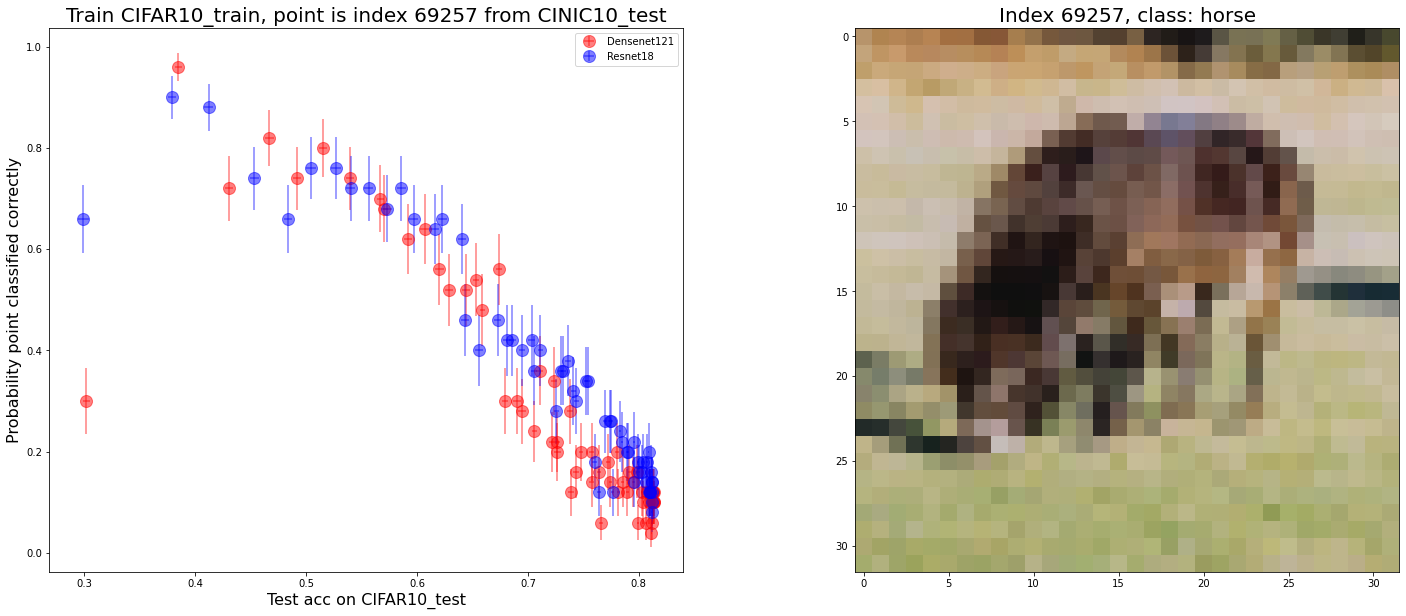

index 86887


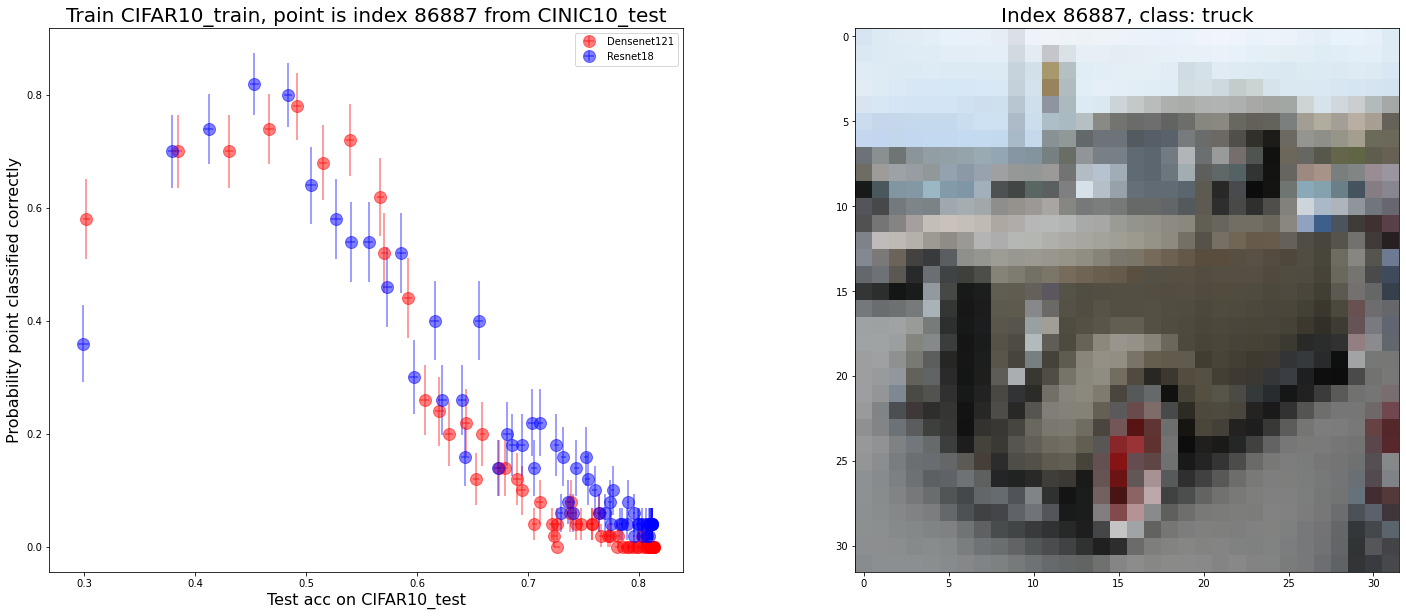

index 59054


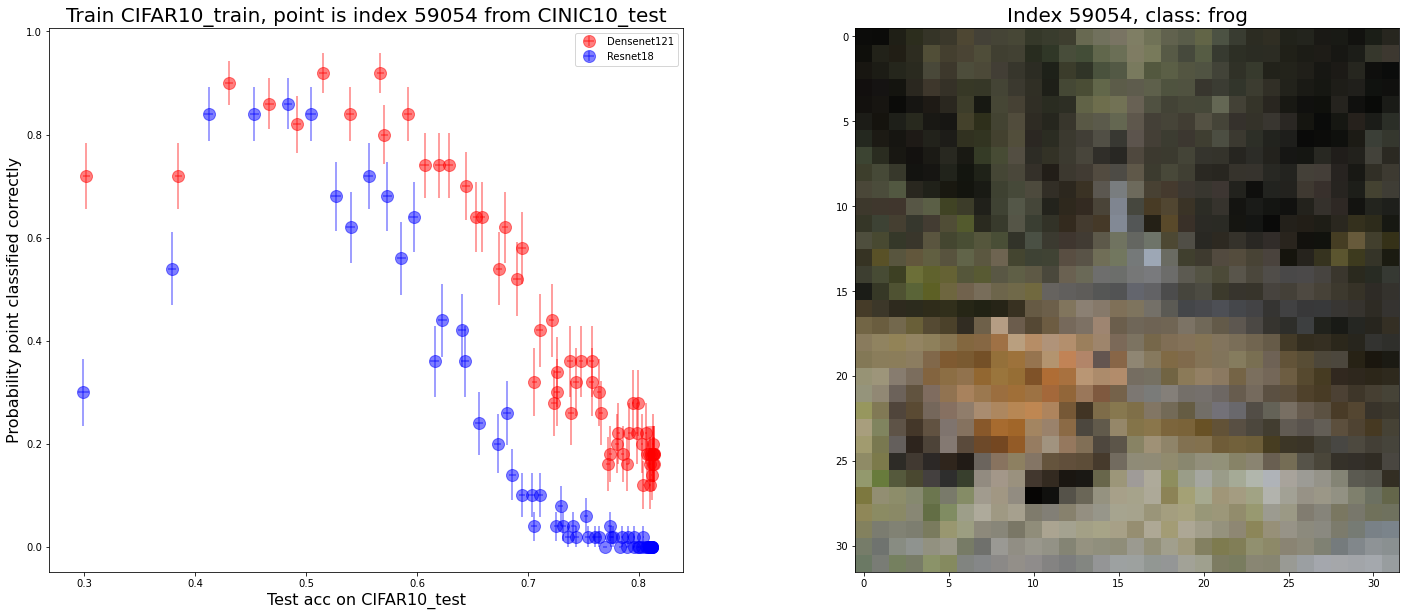

index 79500


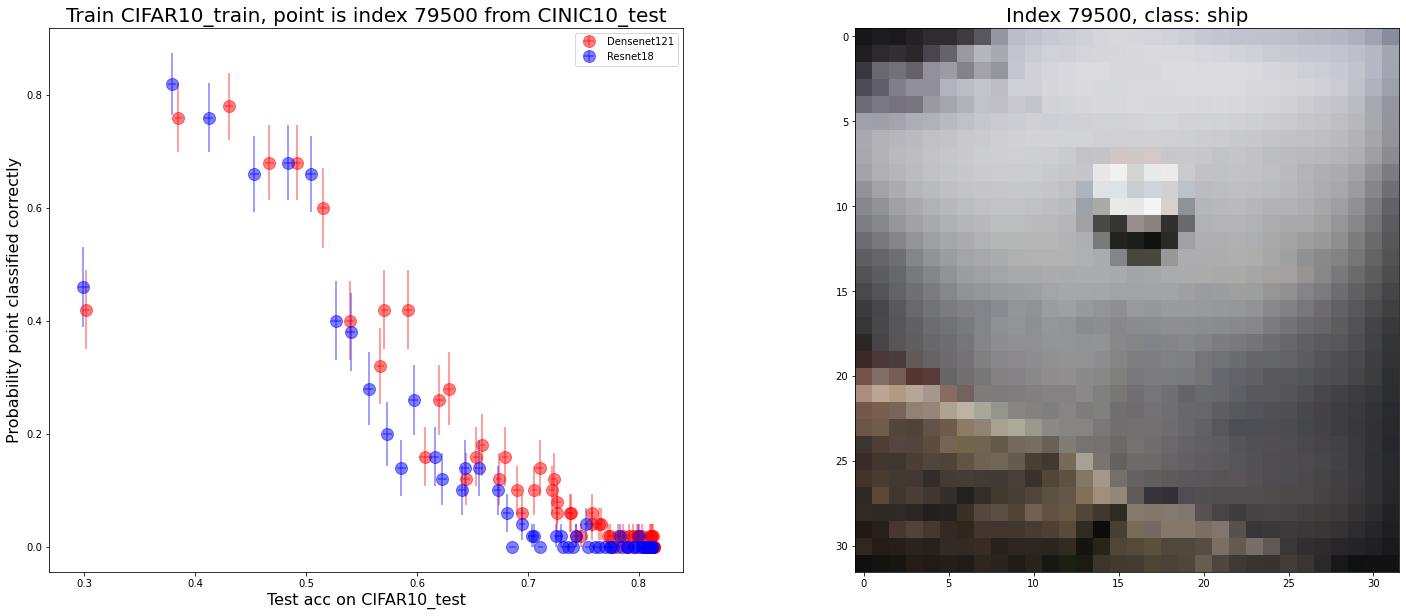

index 86876


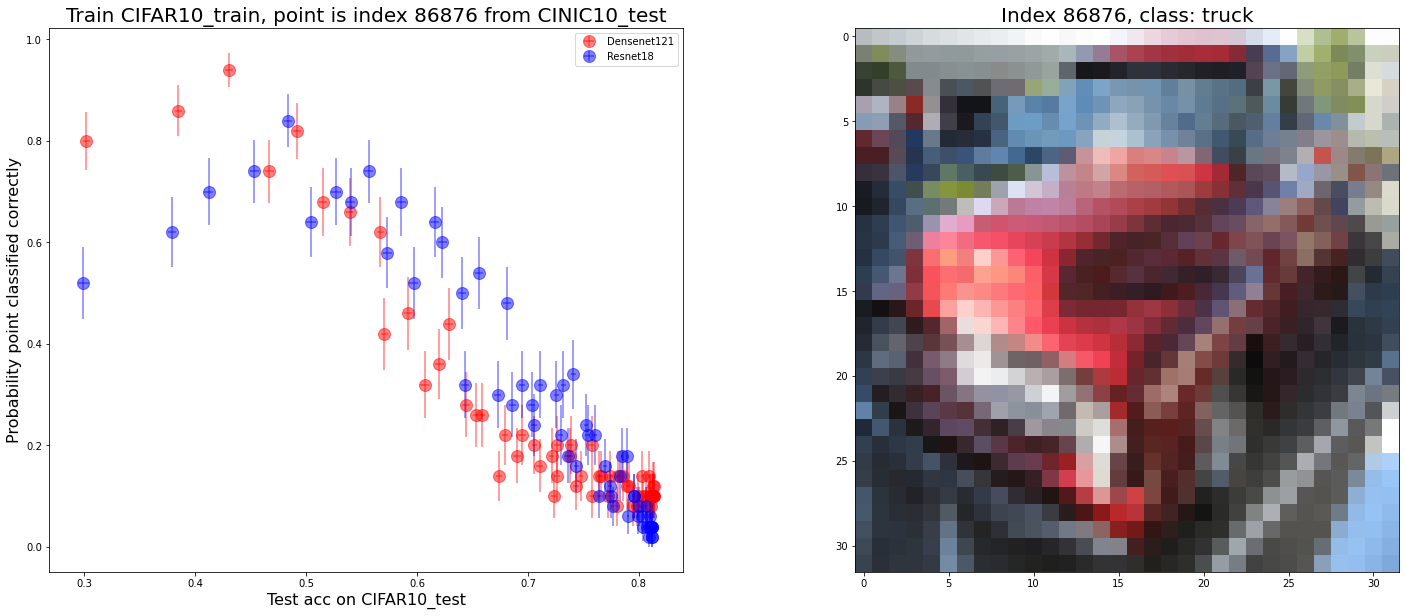

index 66469


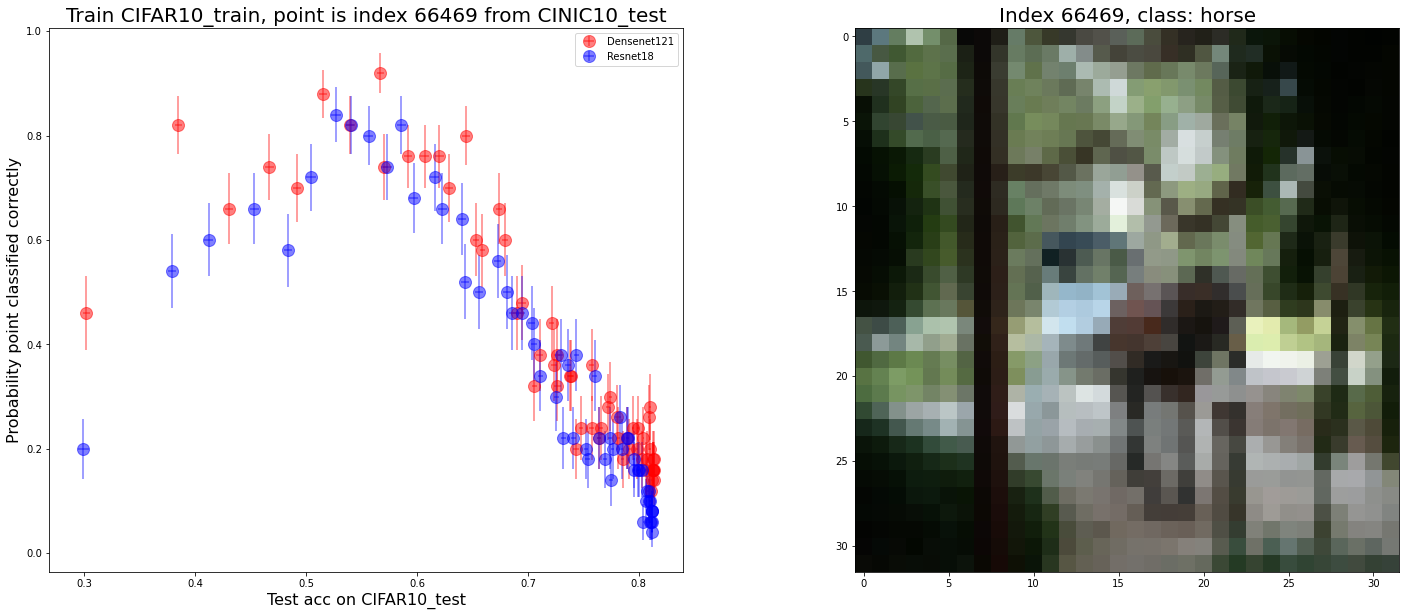

index 69244


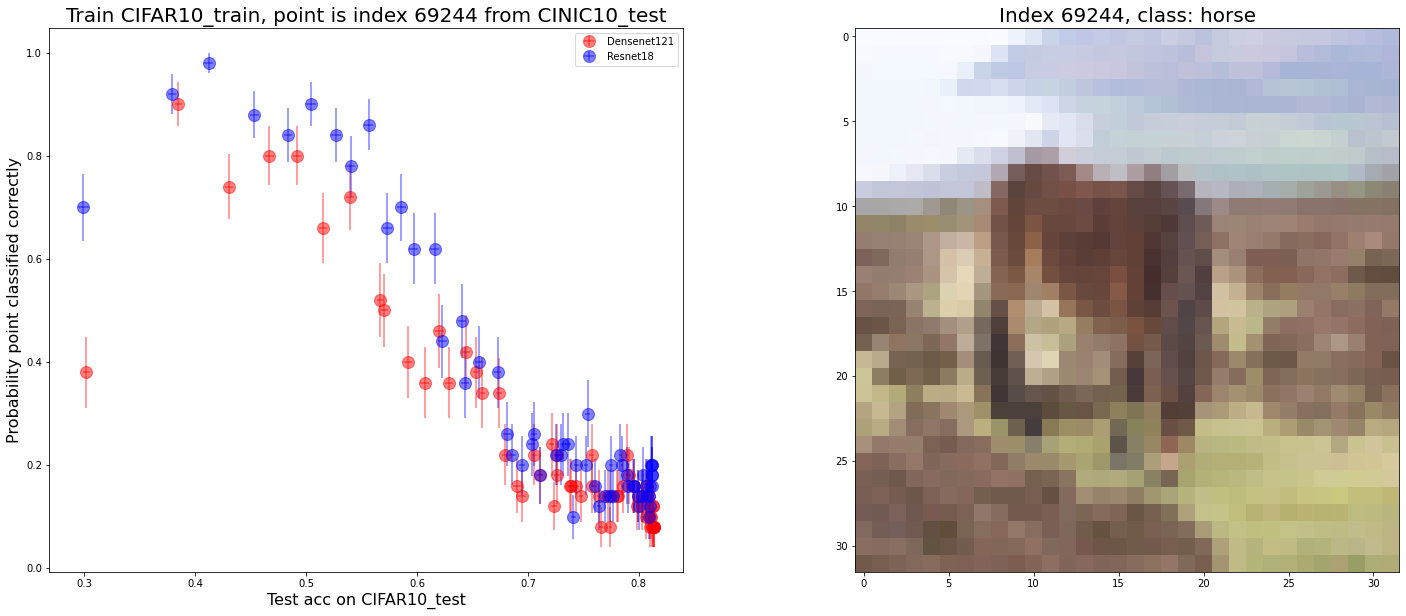

index 83352


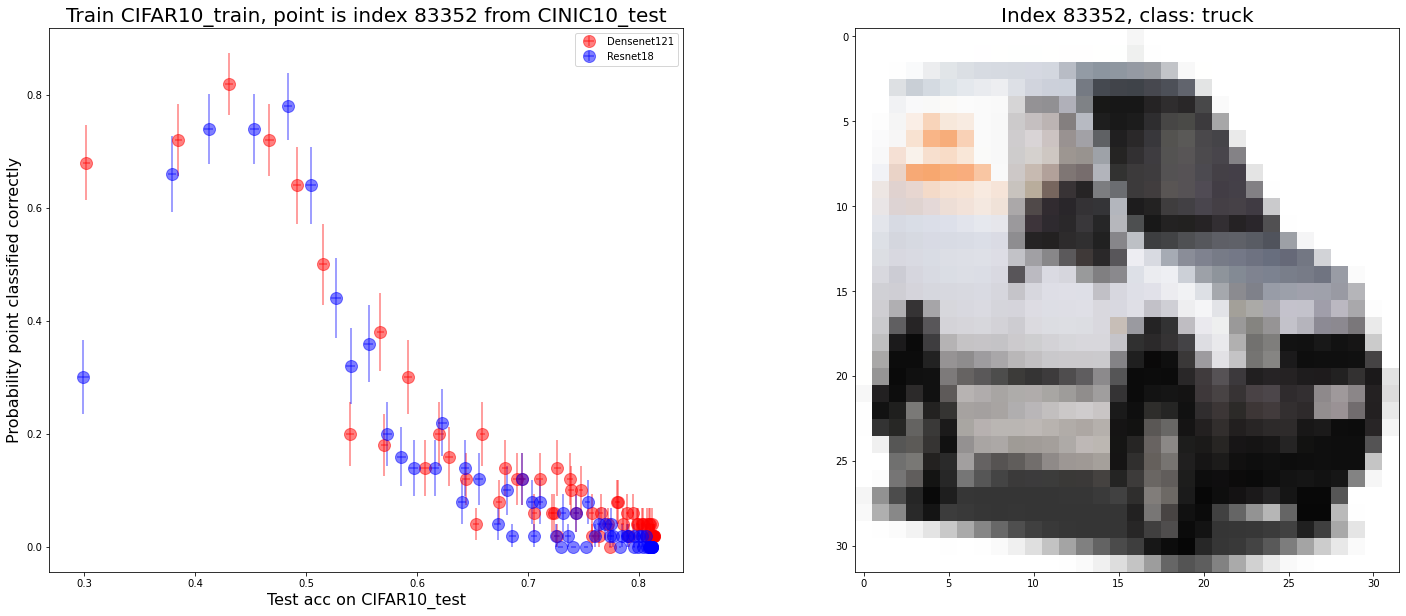

index 83554


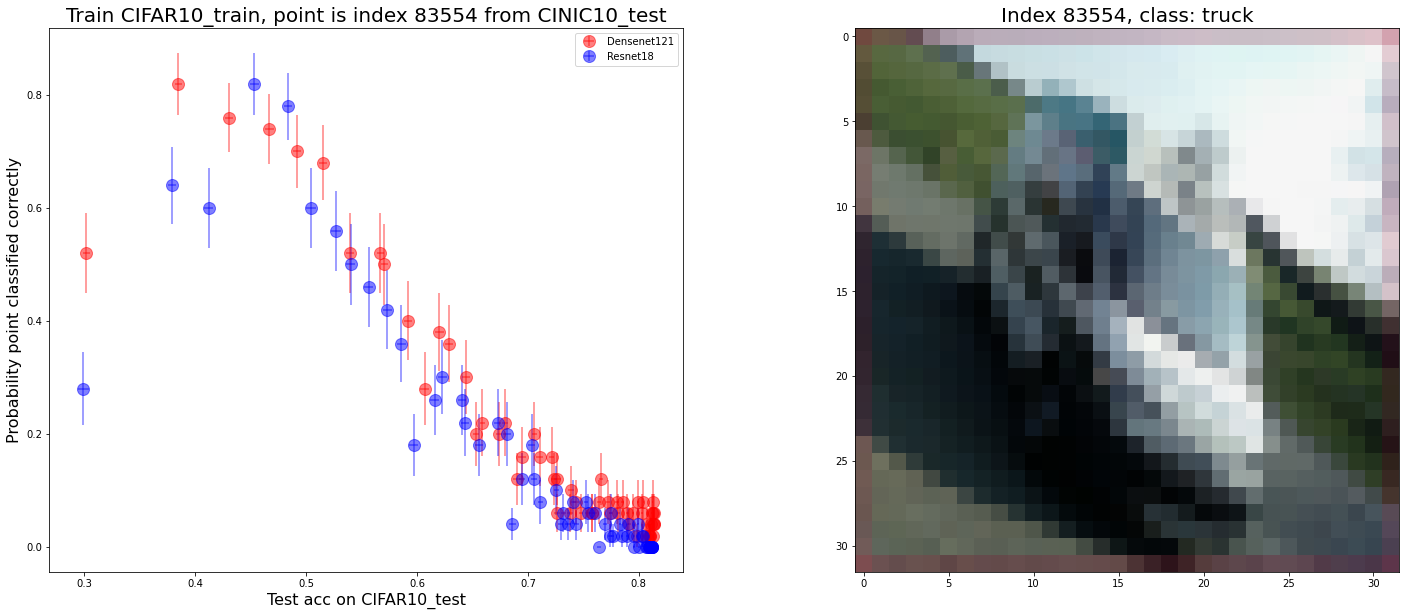

index 74436


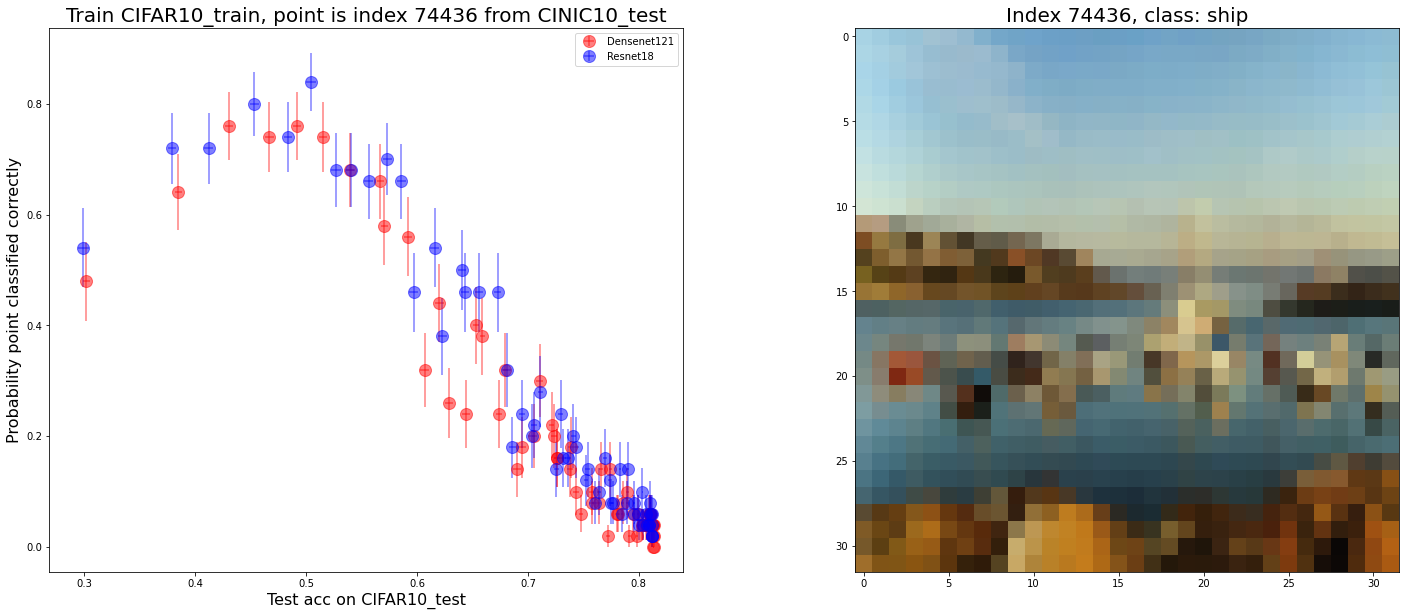

index 86659


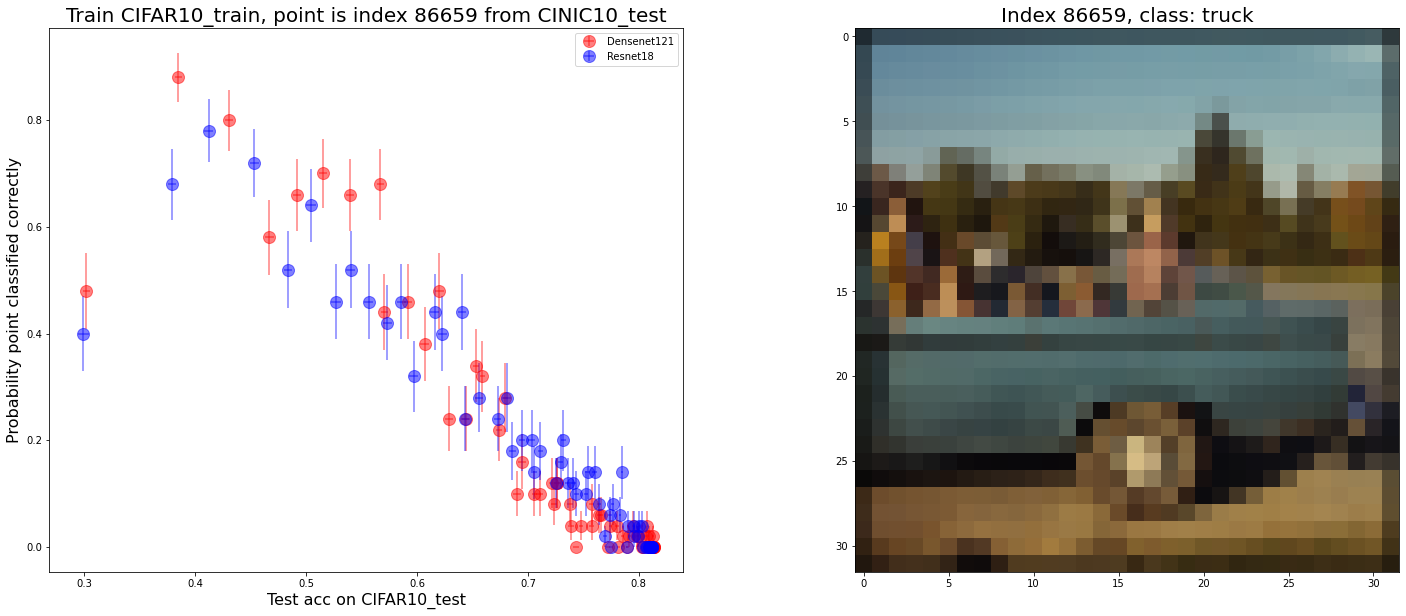

index 83484


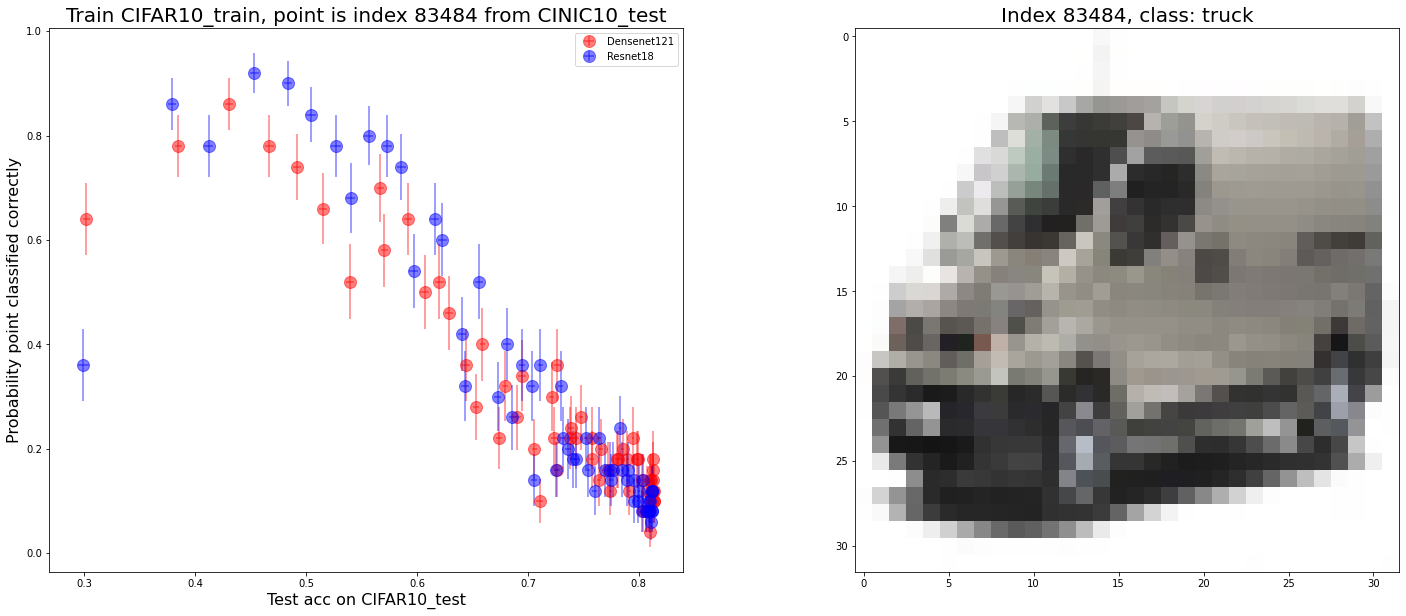

index 13431


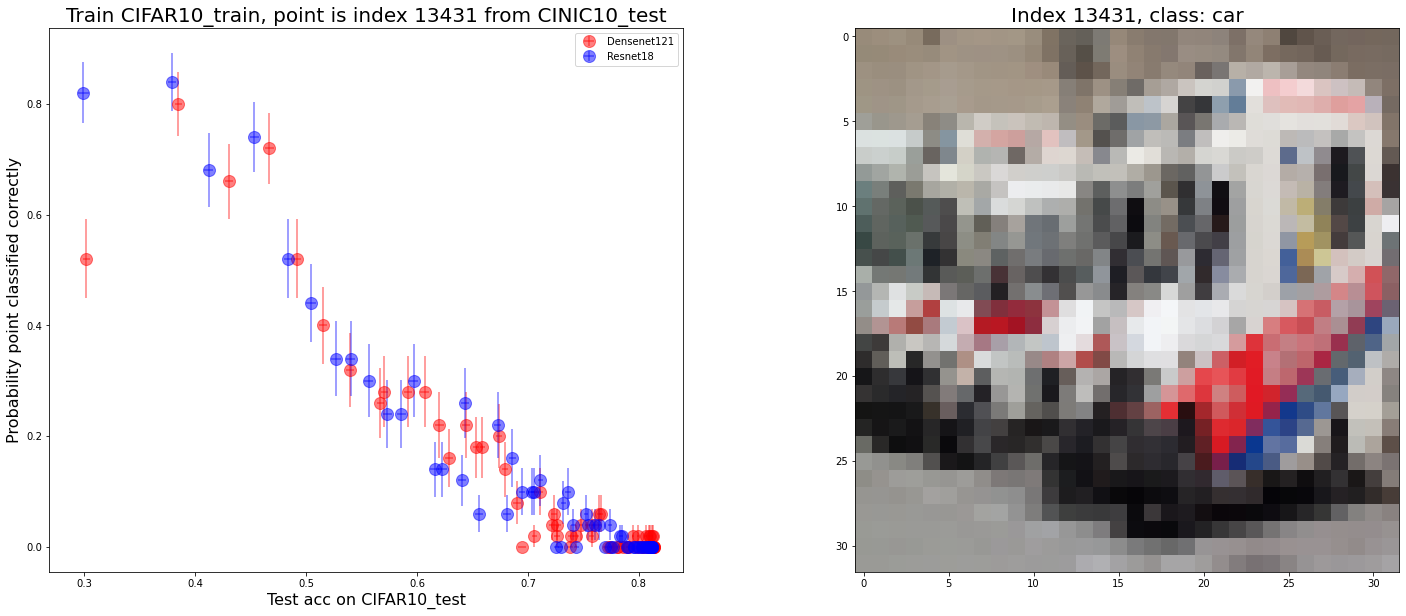

index 47464


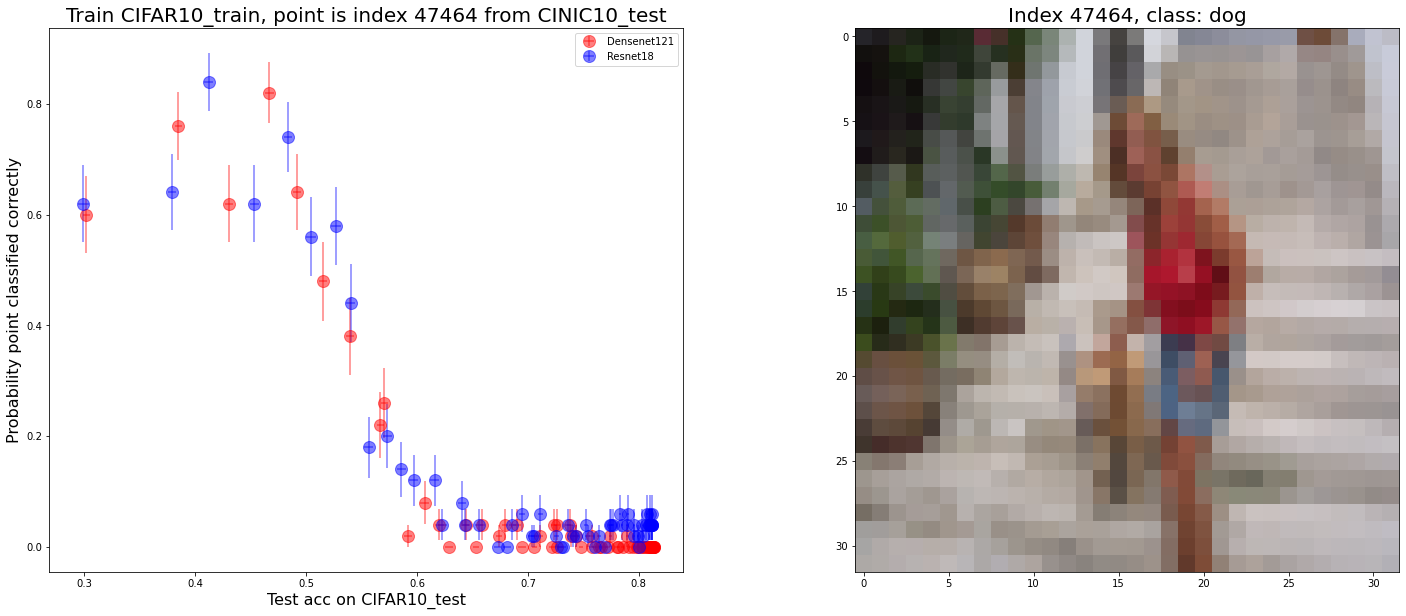

index 65377


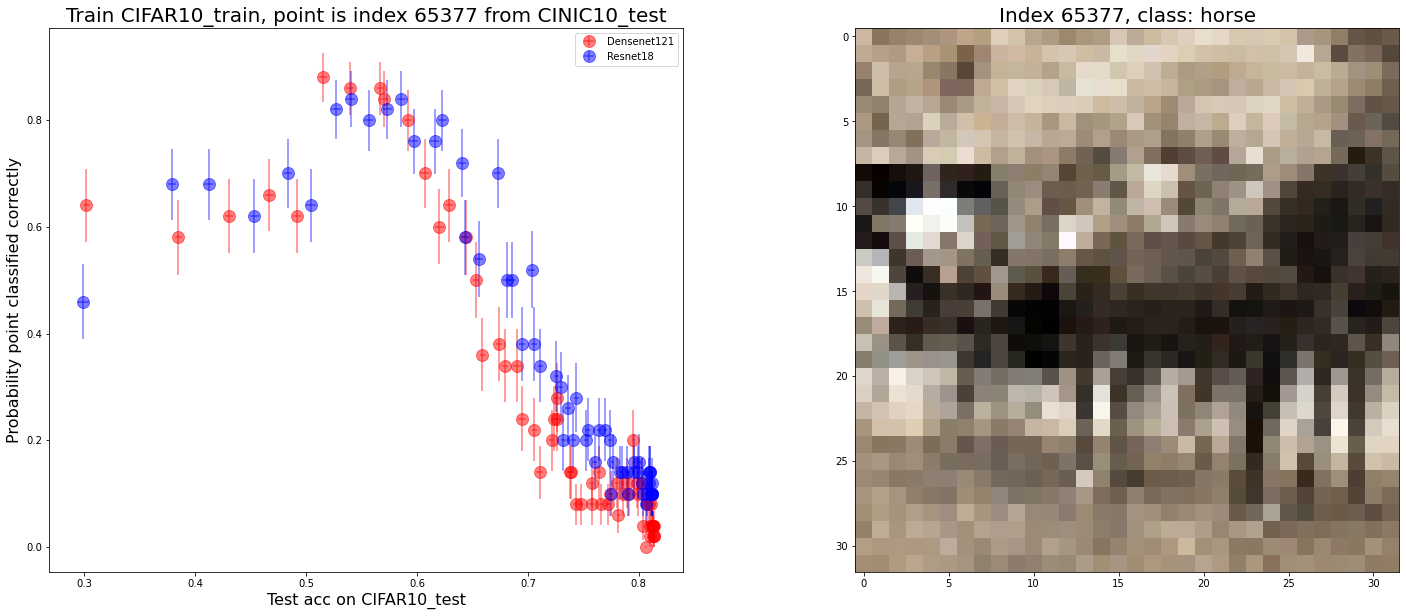

index 61647


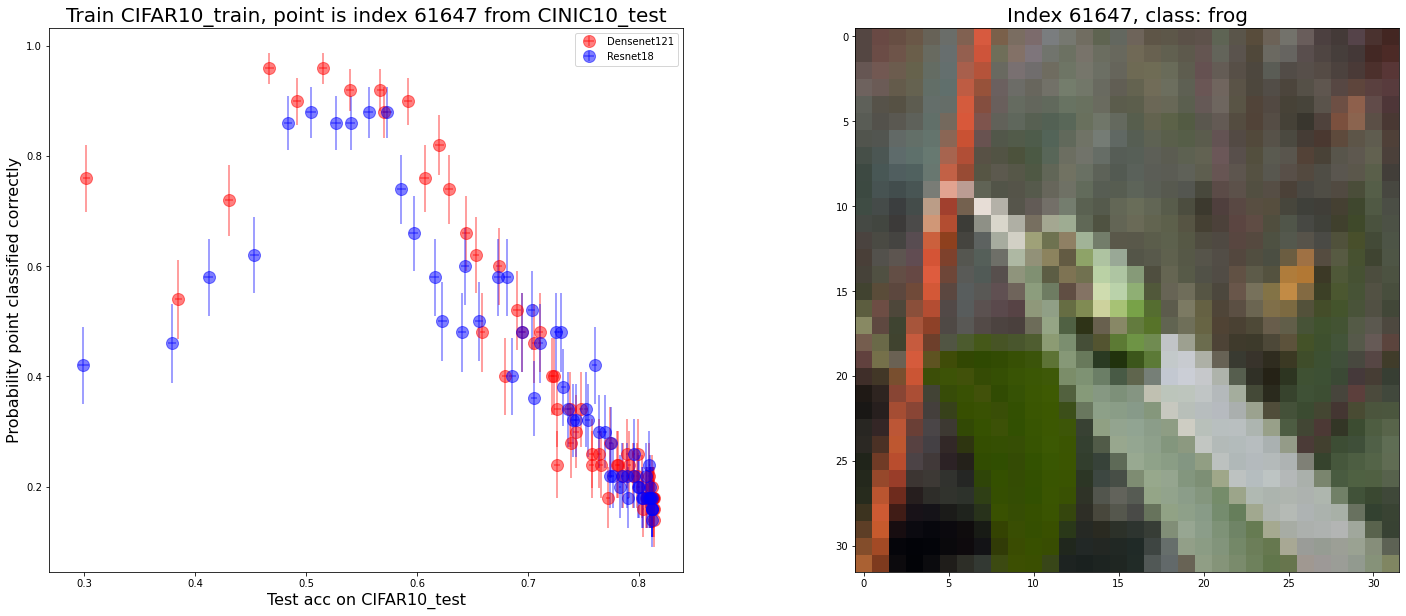

index 59030


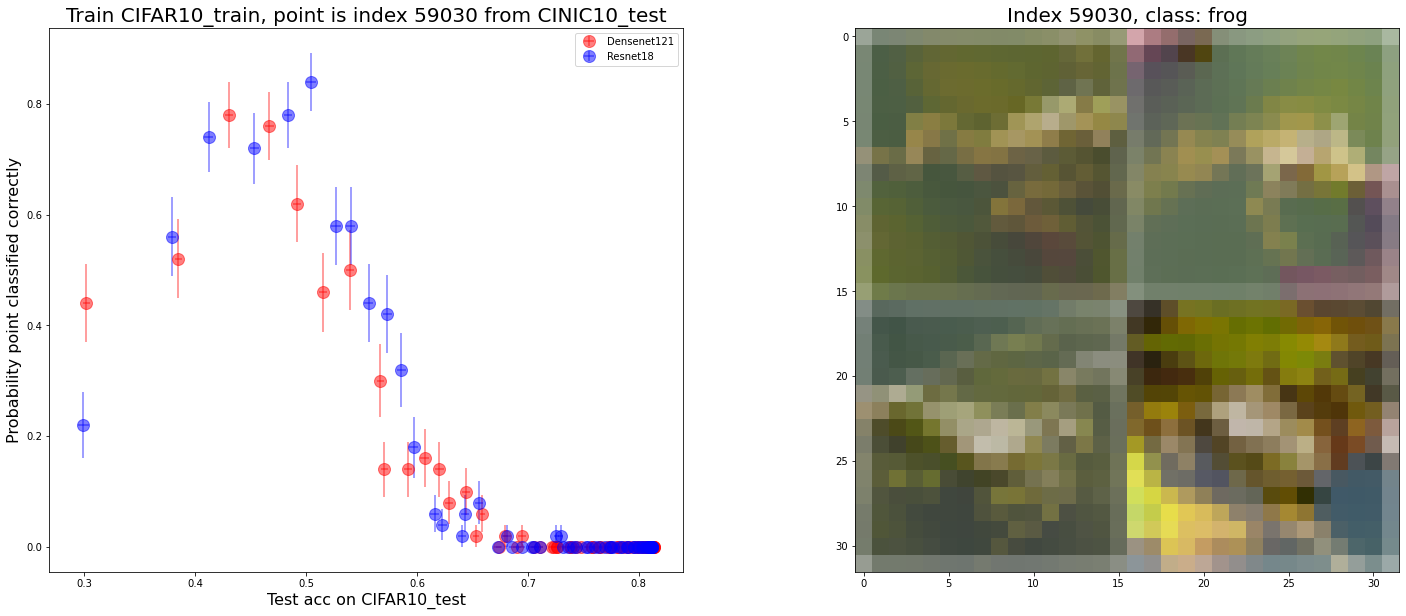

index 81343


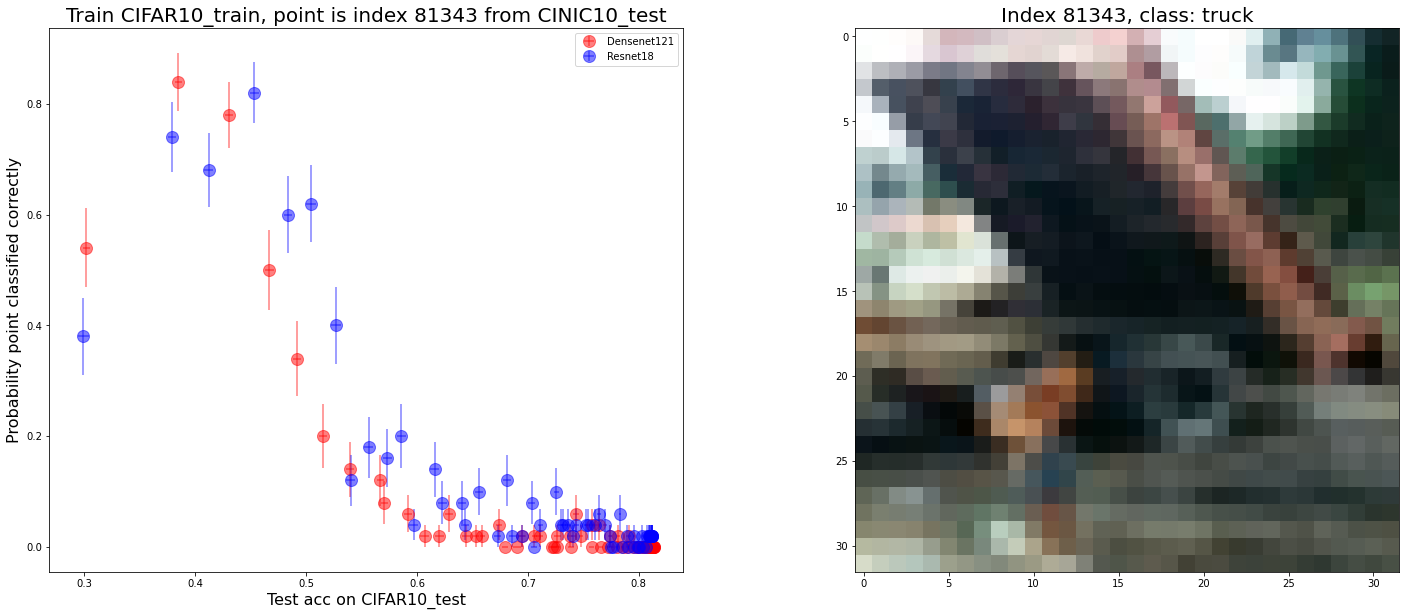

index 39729


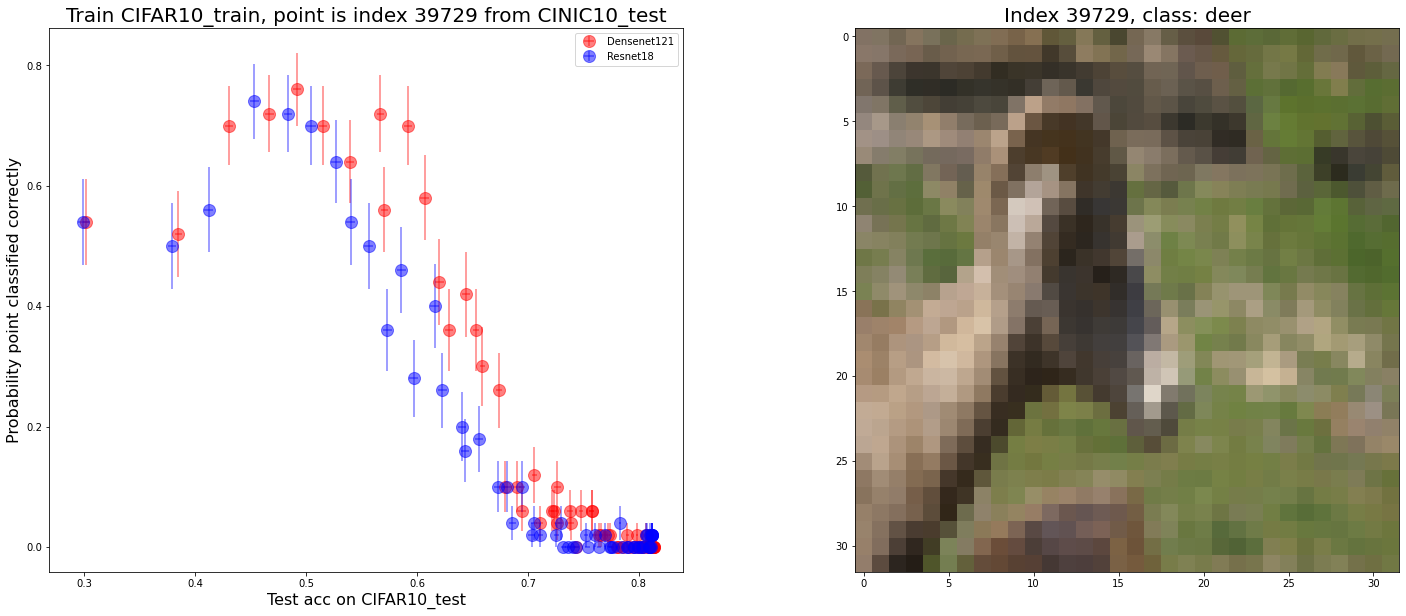

index 79633


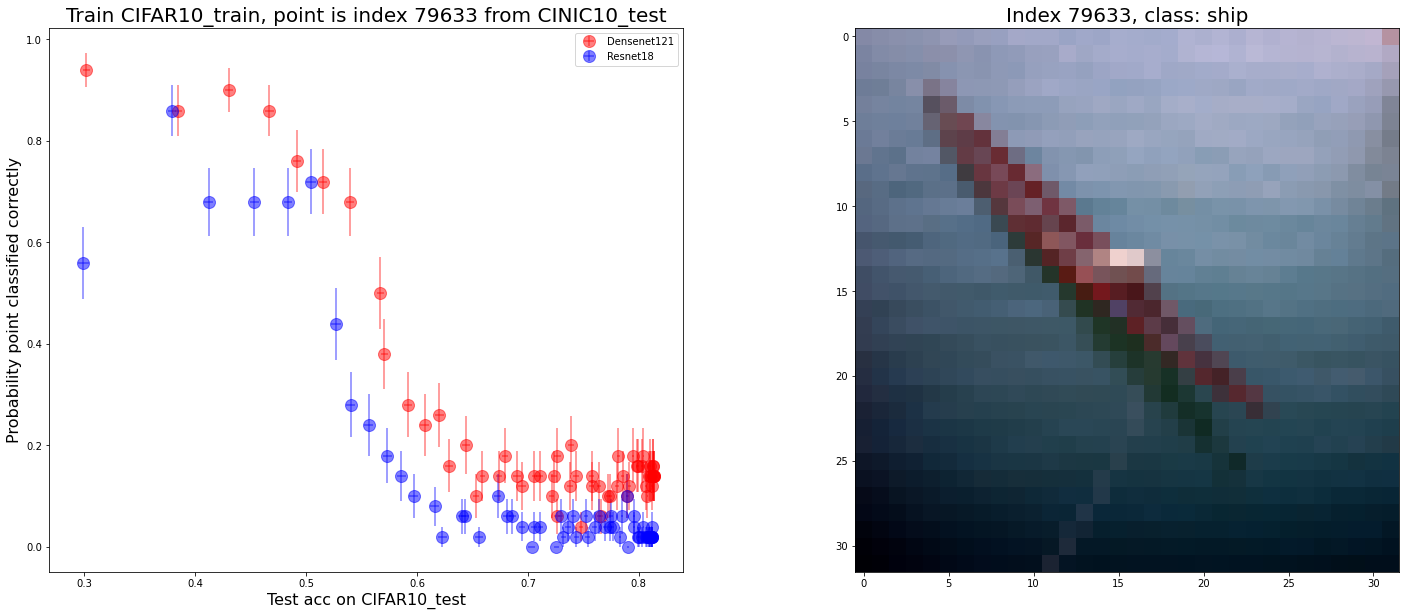

index 56338


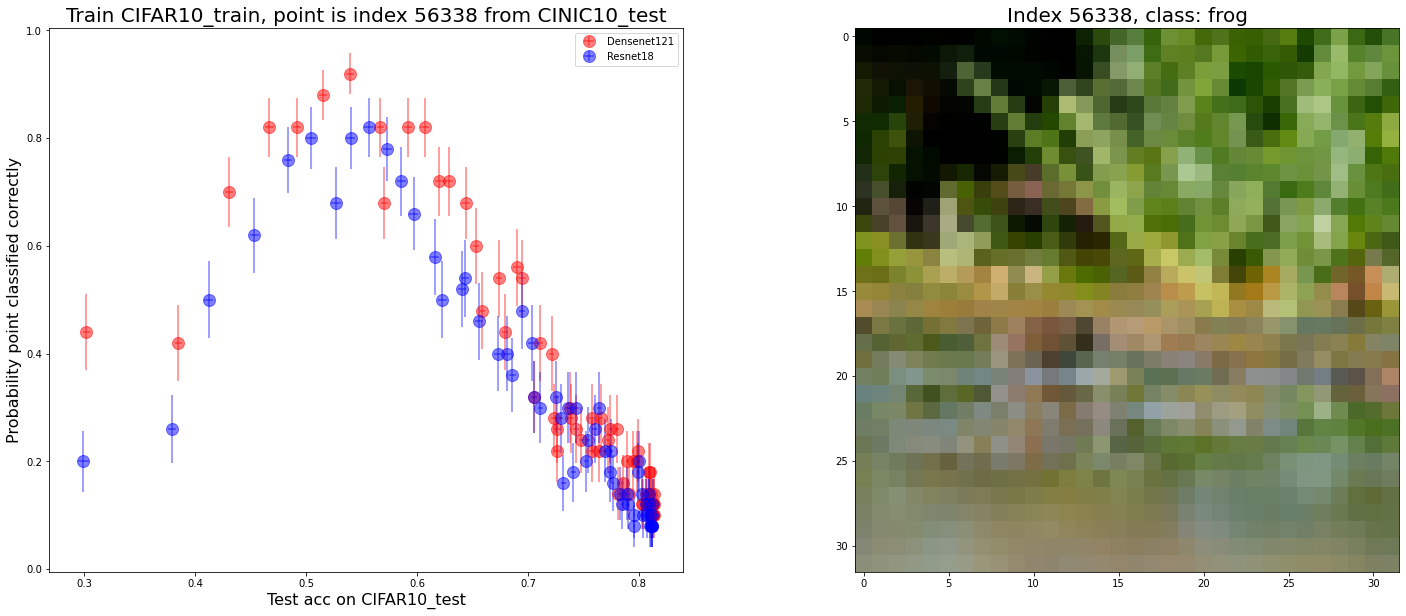

index 7651


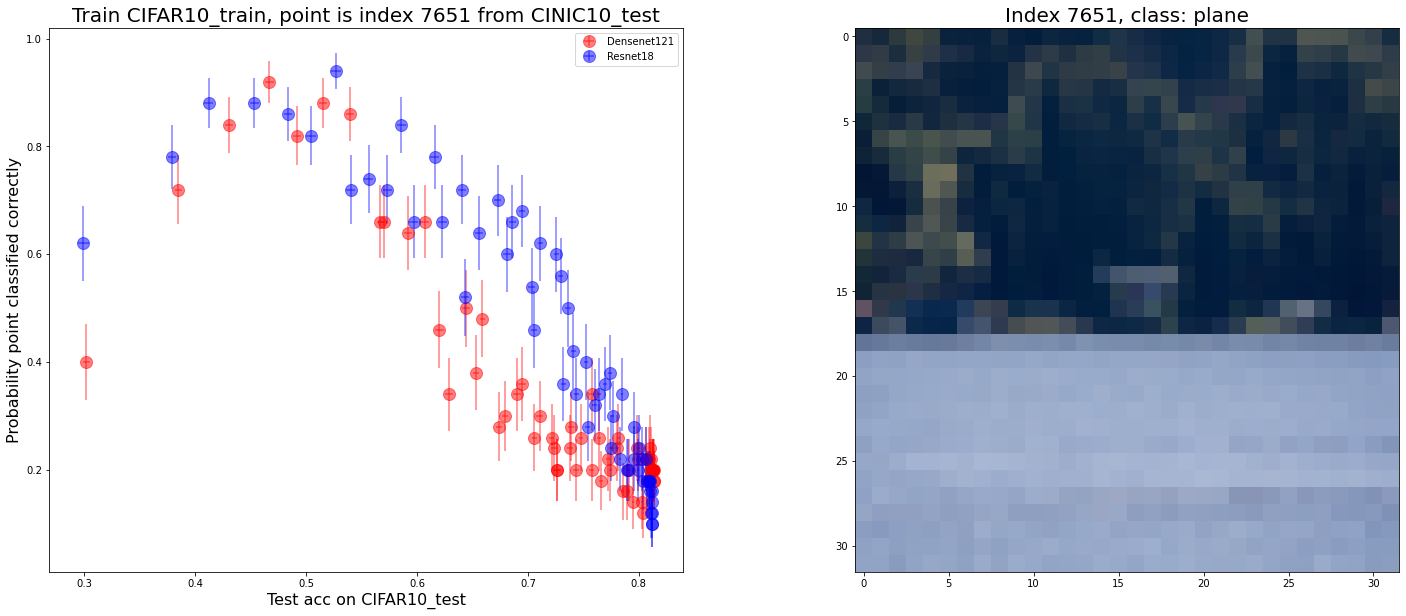

index 13424


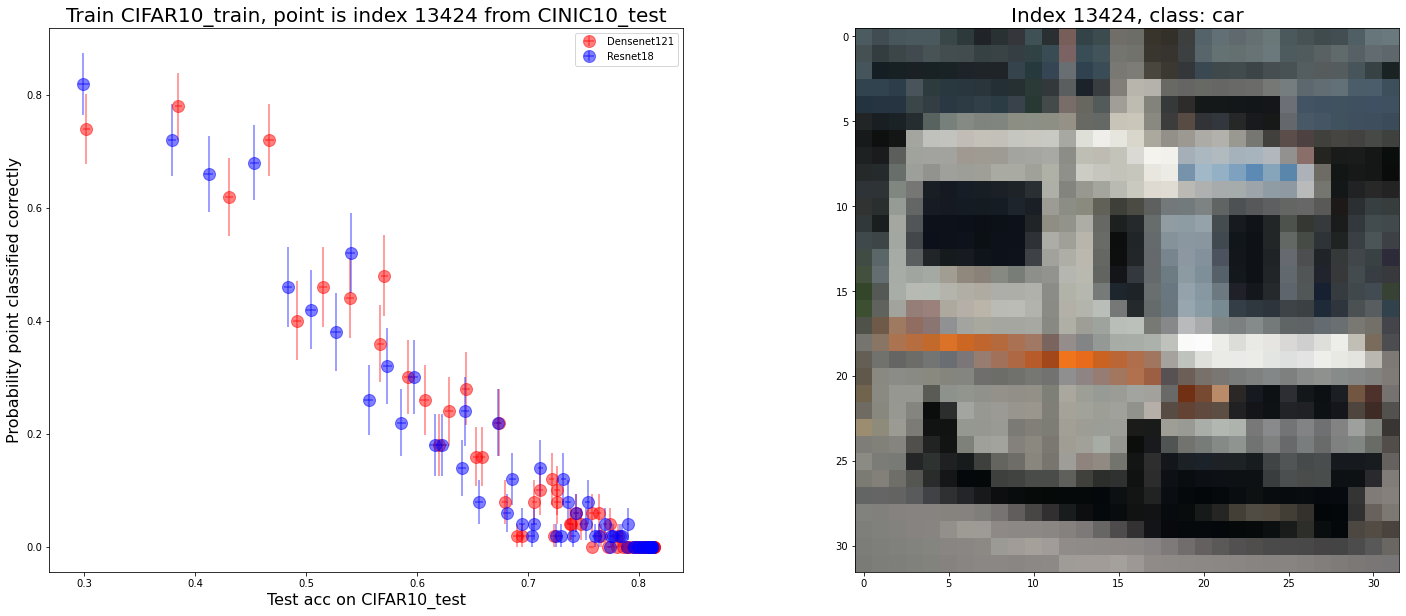

index 71021


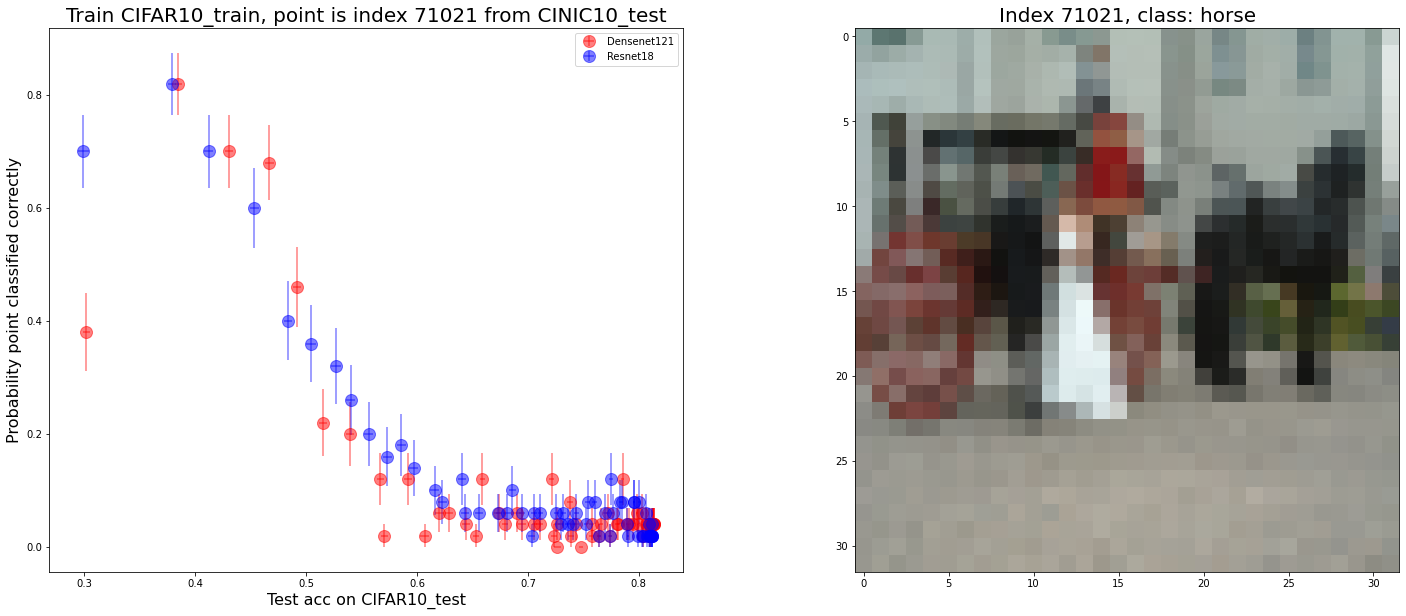

index 14920


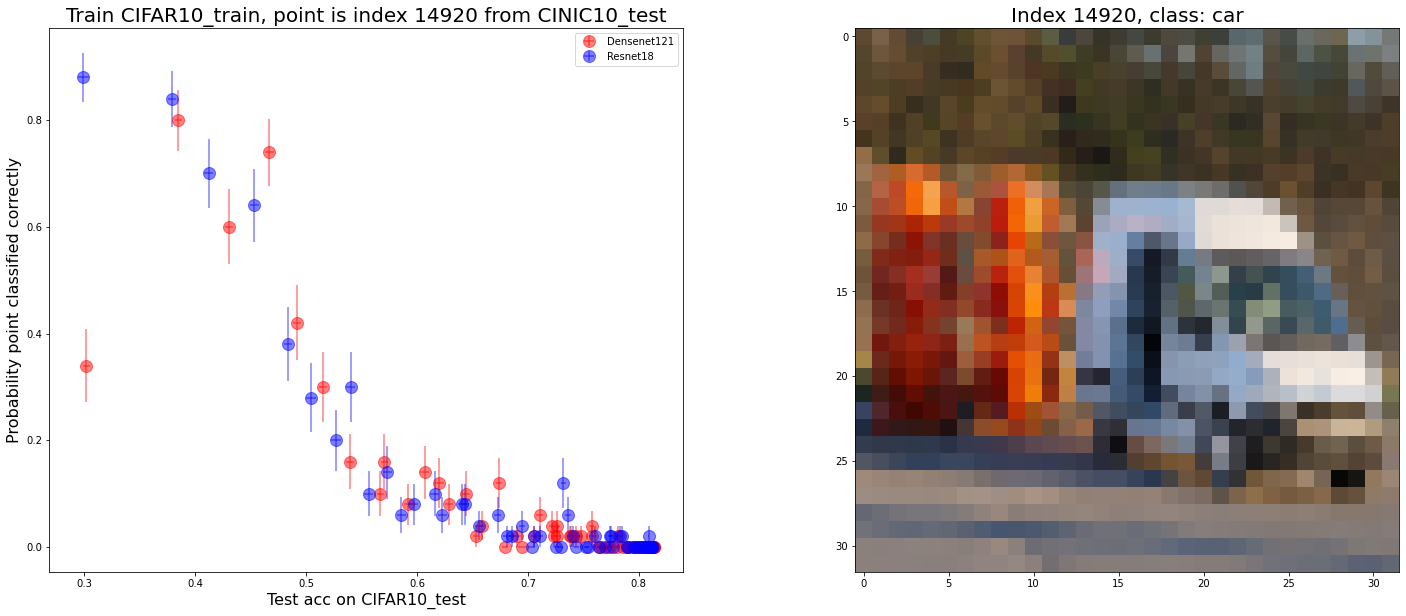

index 51335


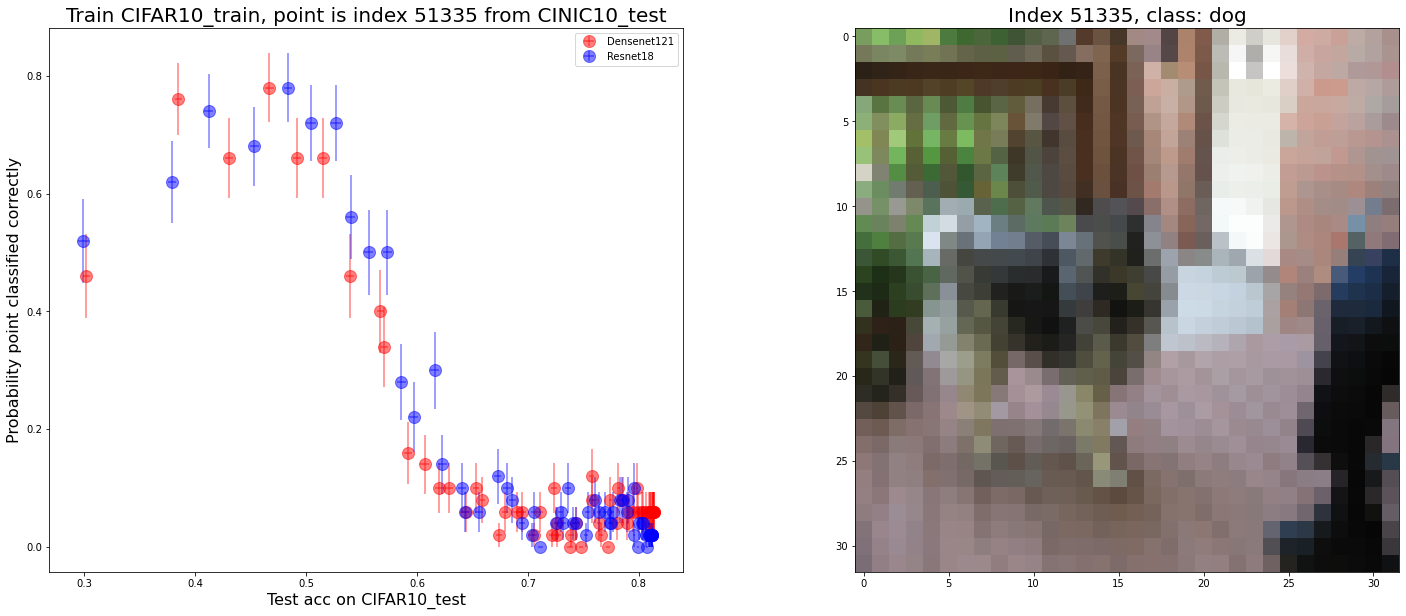

index 53513


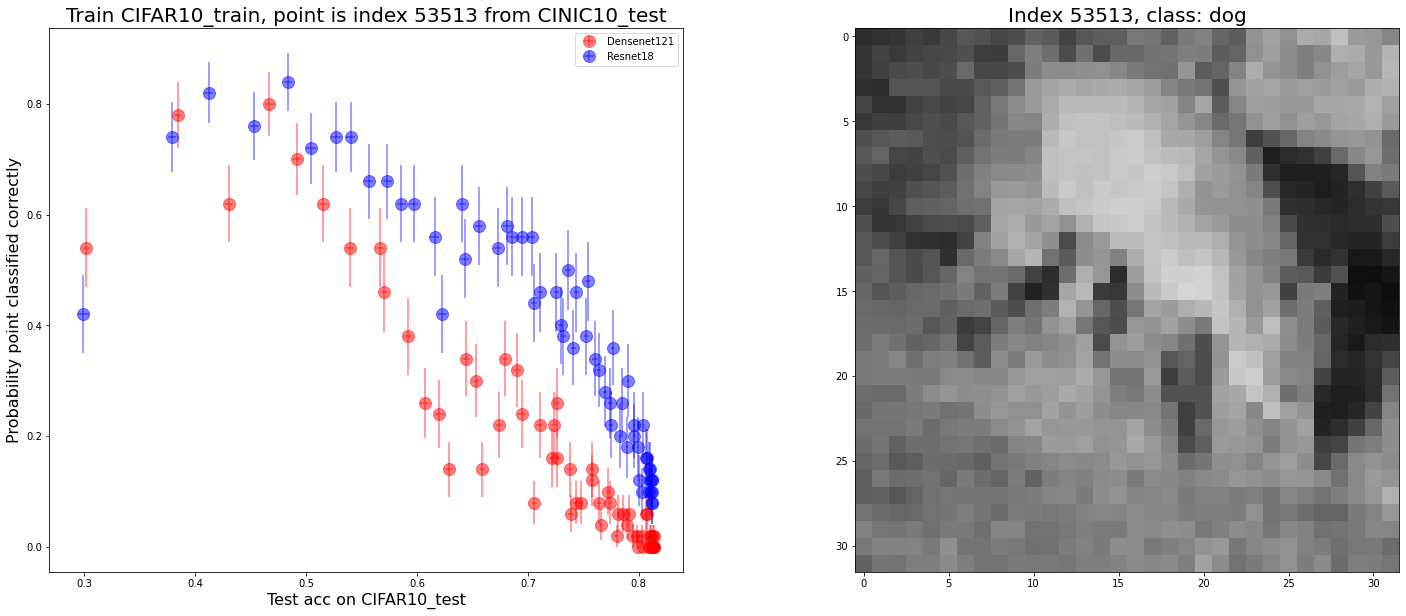

index 16404


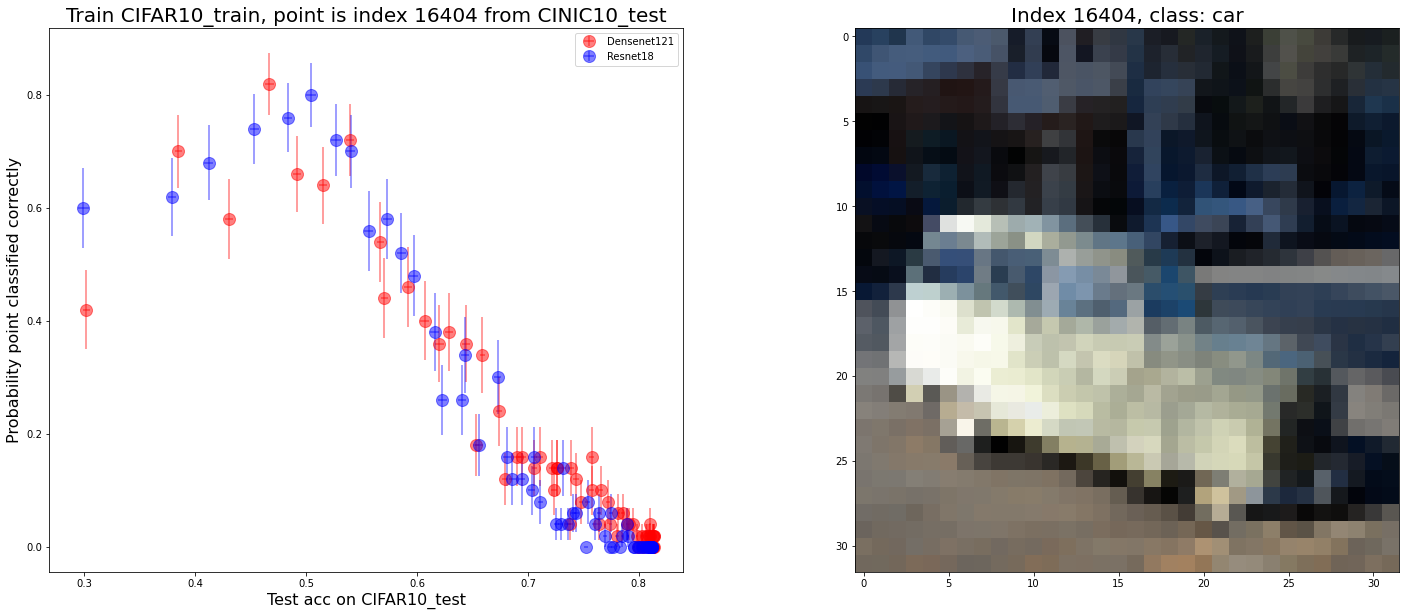

index 86551


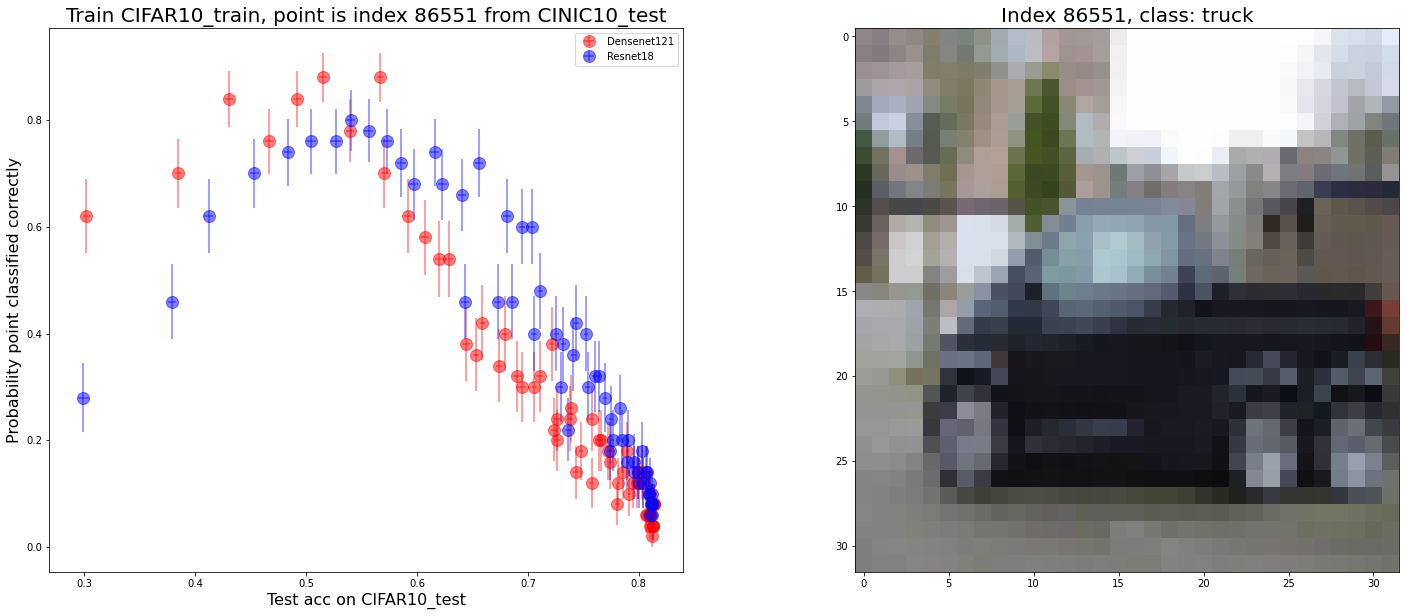

index 78892


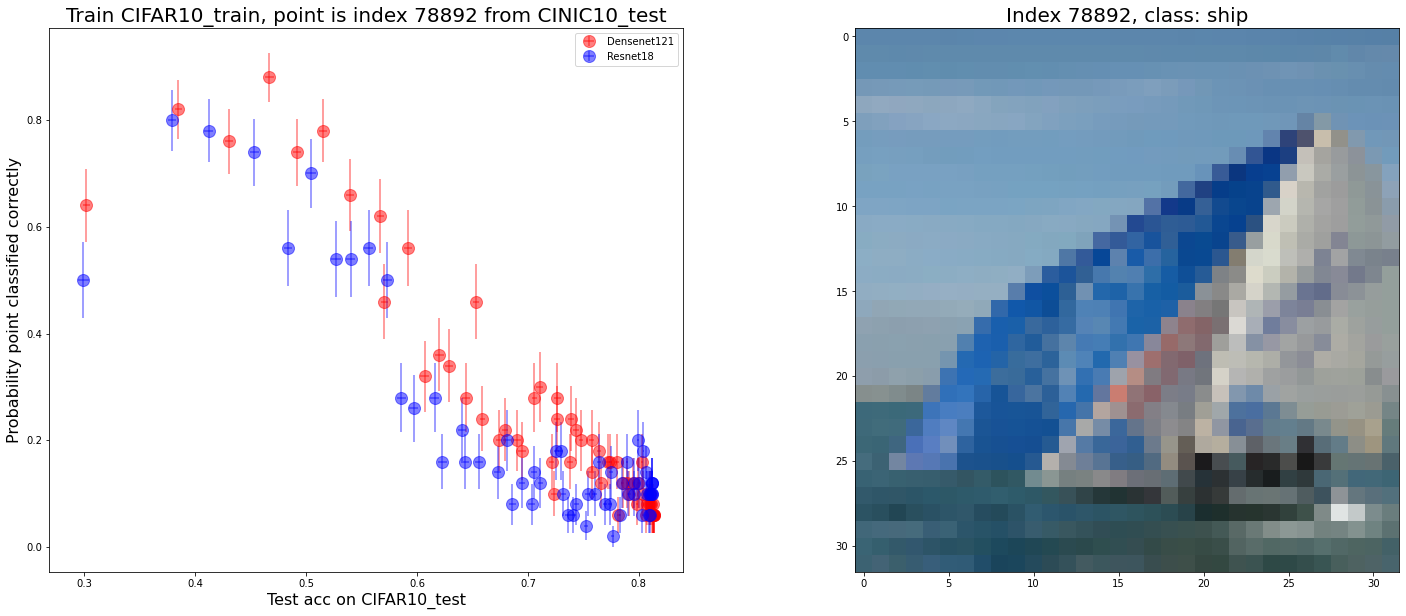

index 11124


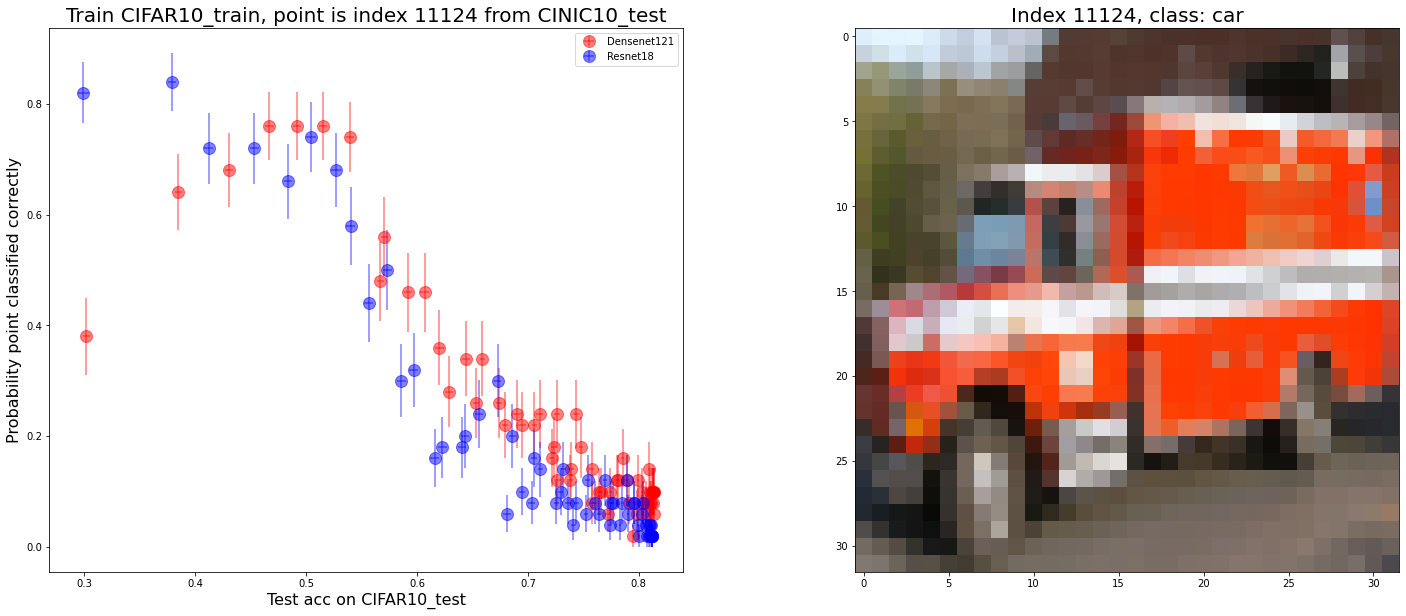

index 50487


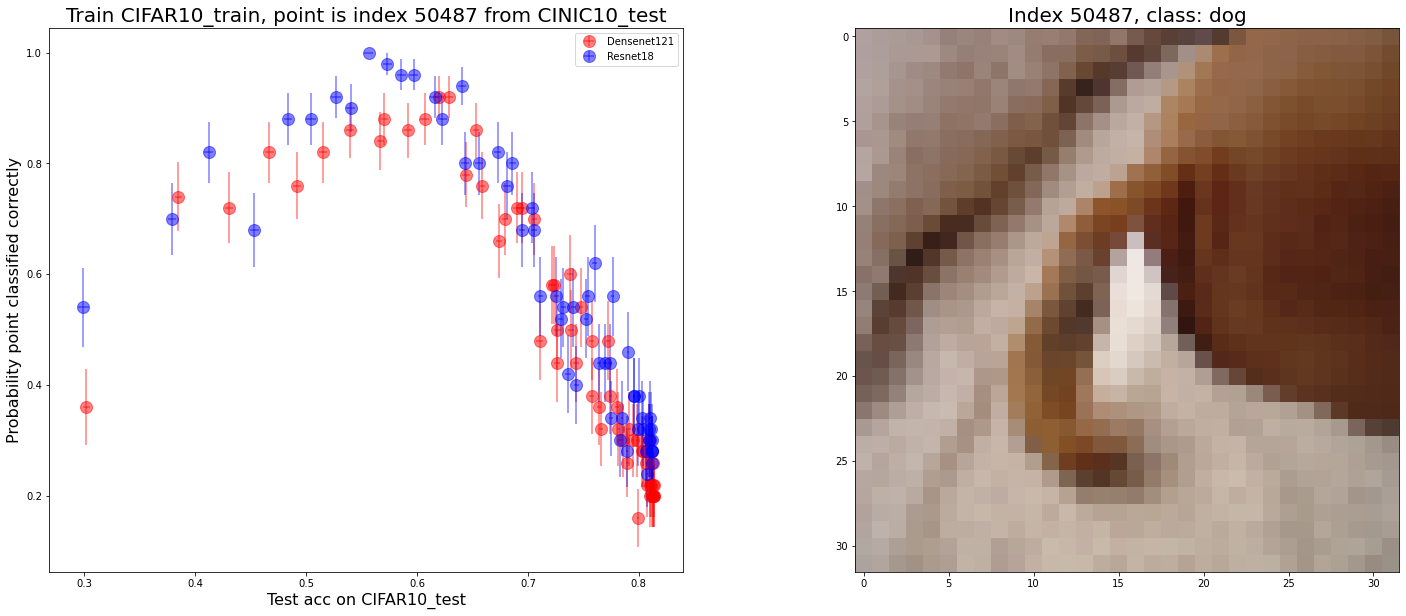

index 52305


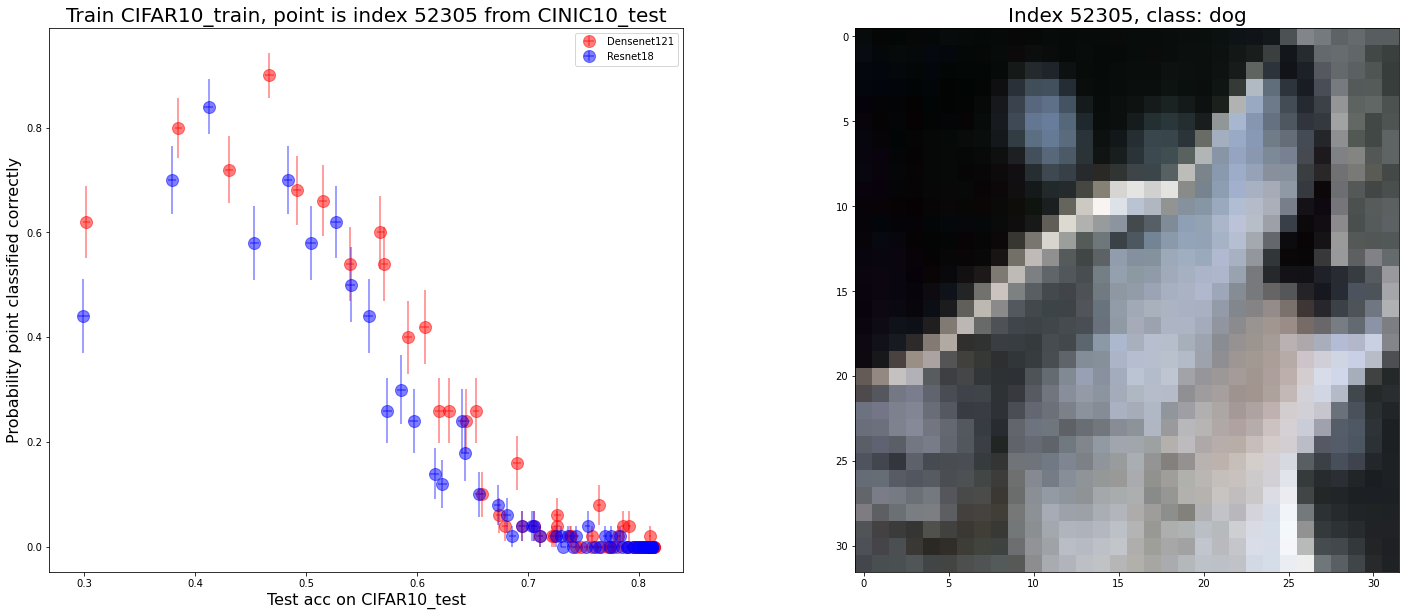

index 77731


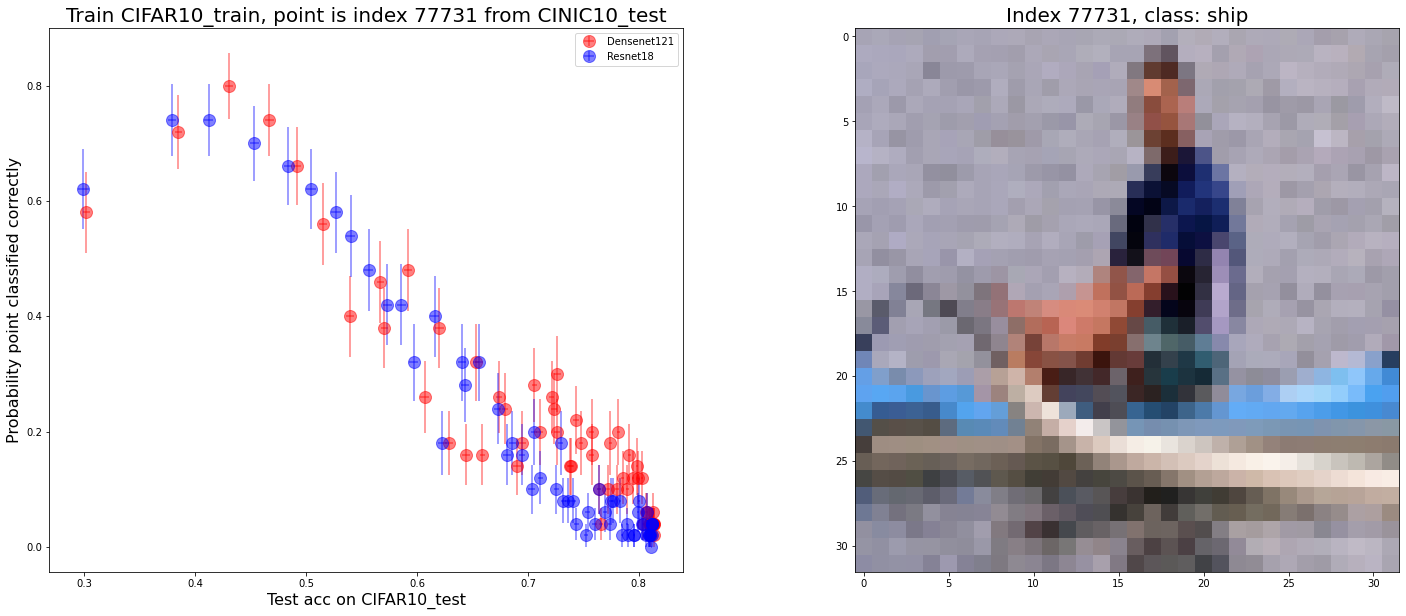

index 16182


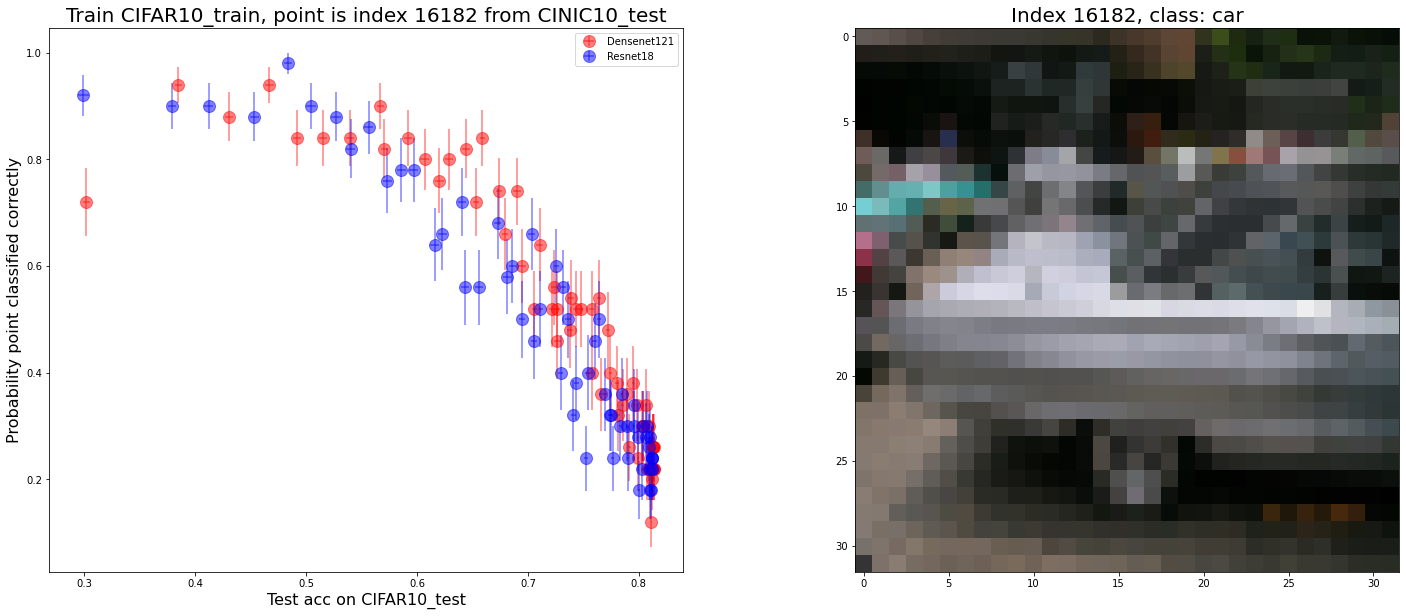

index 16508


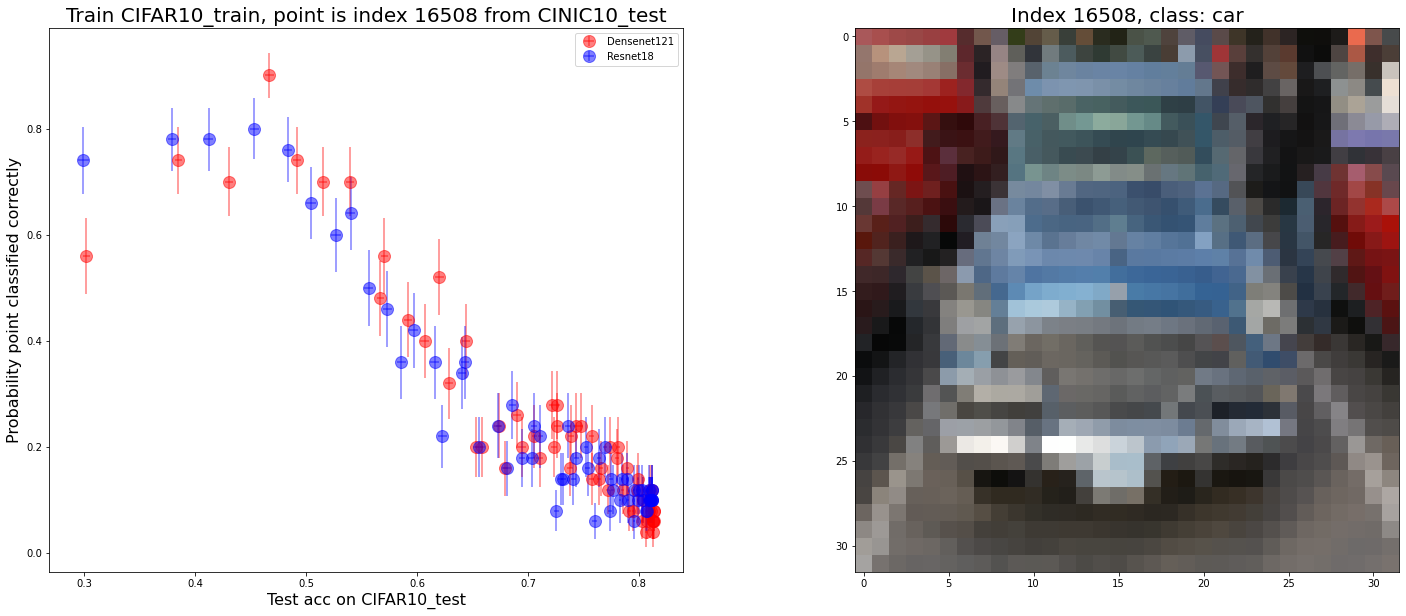

index 86941


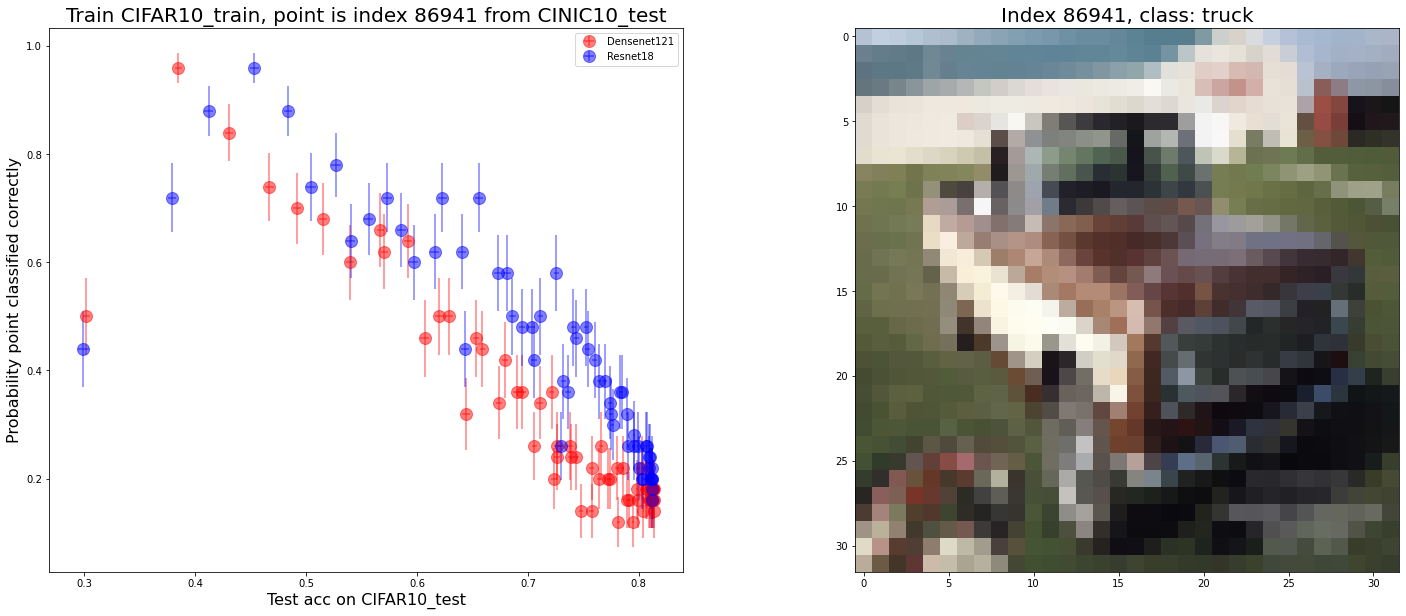

index 13433


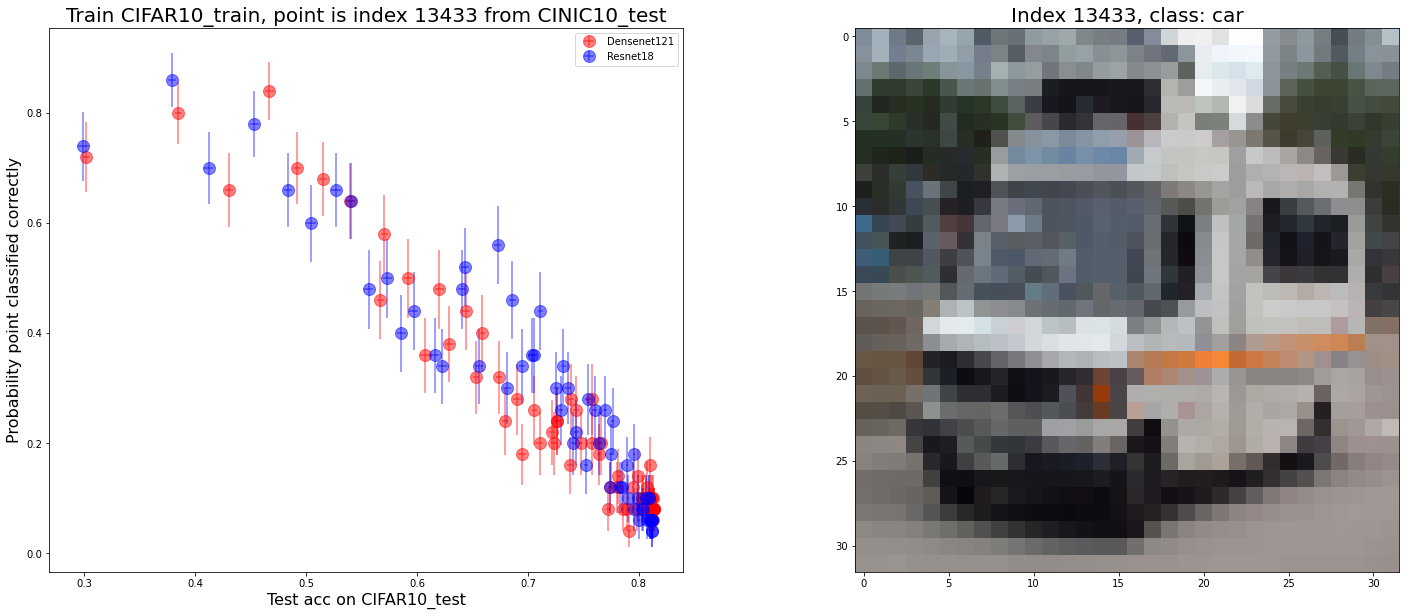

index 86400


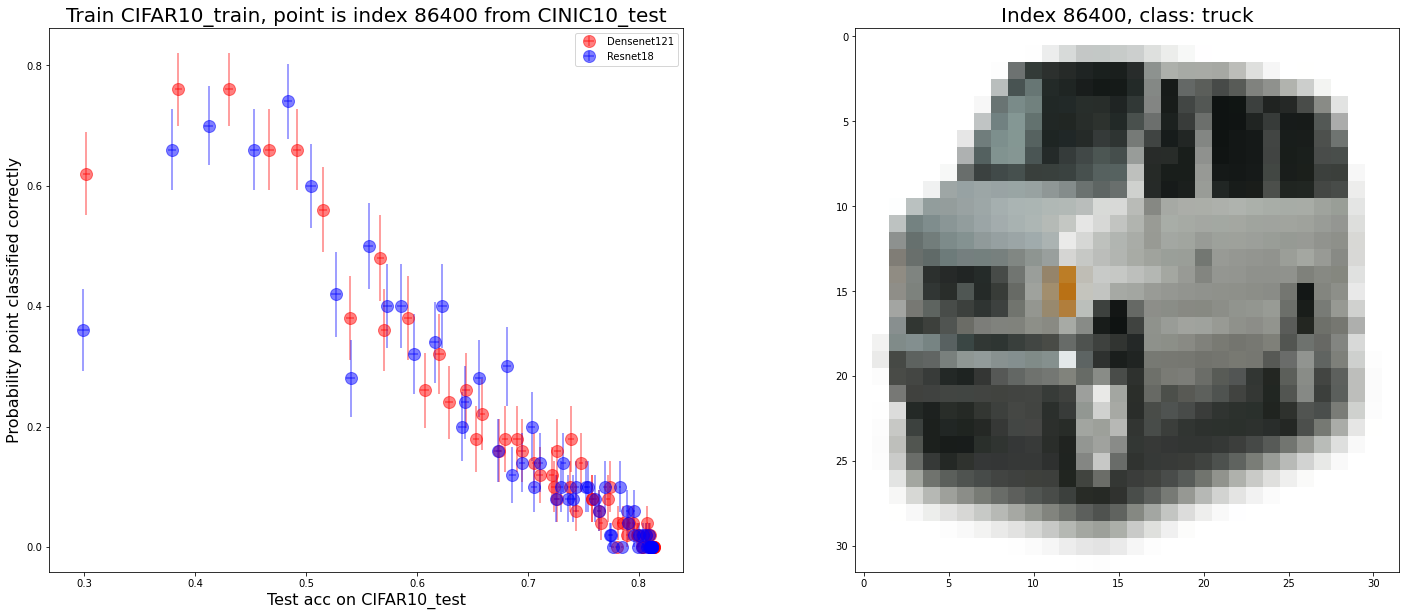

index 11086


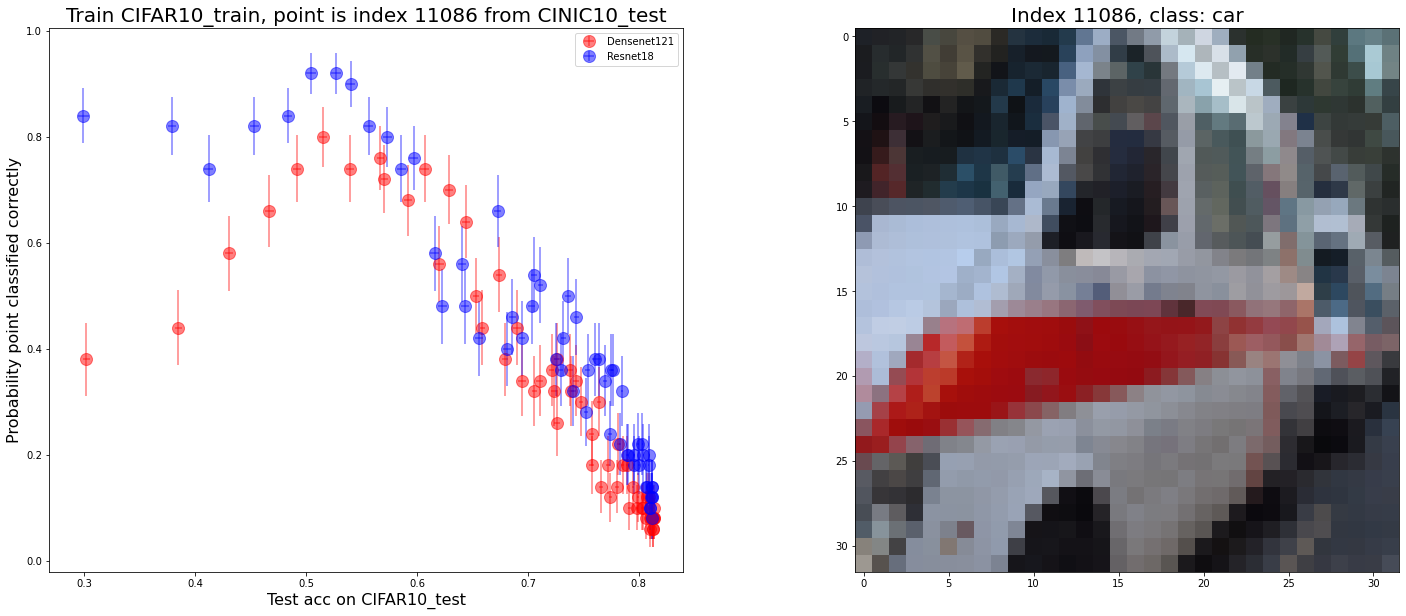

index 65331


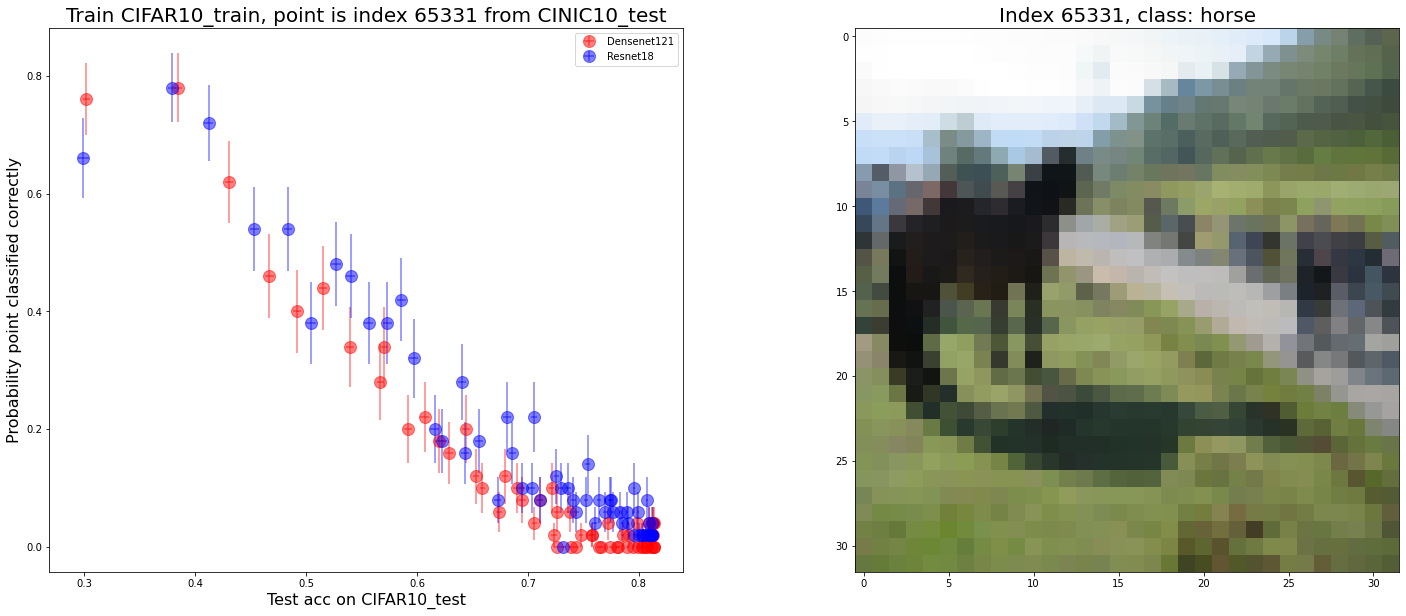

index 62820


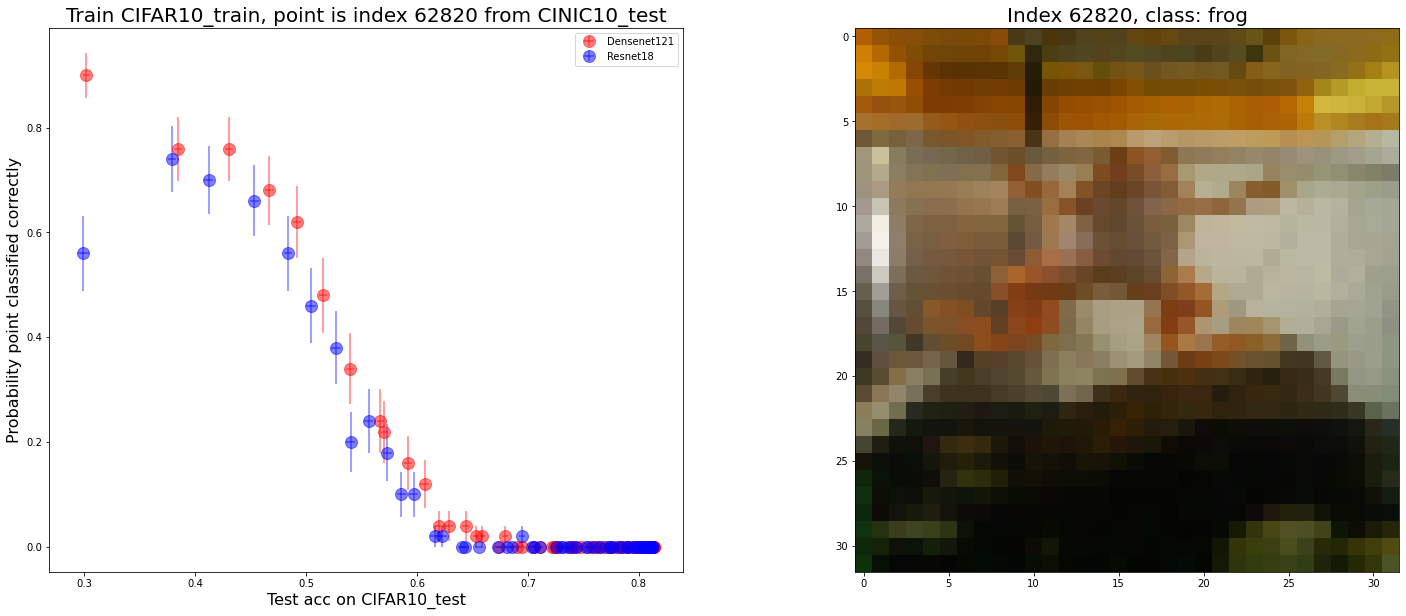

index 80903


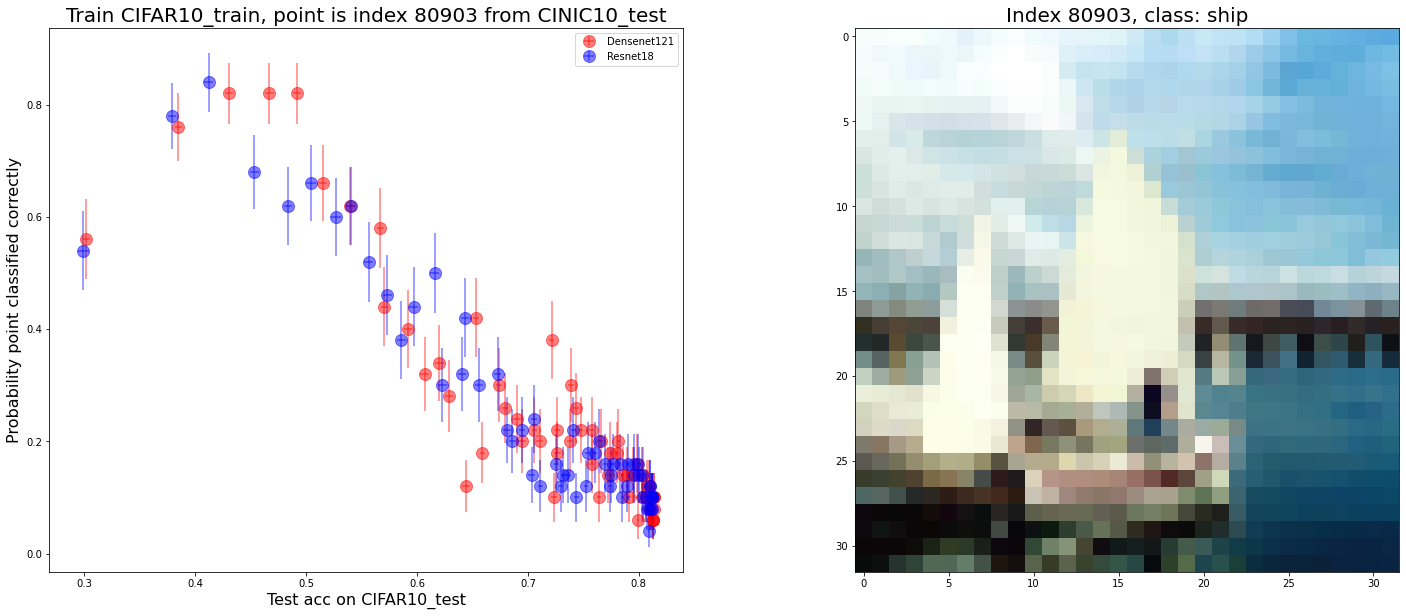

index 37272


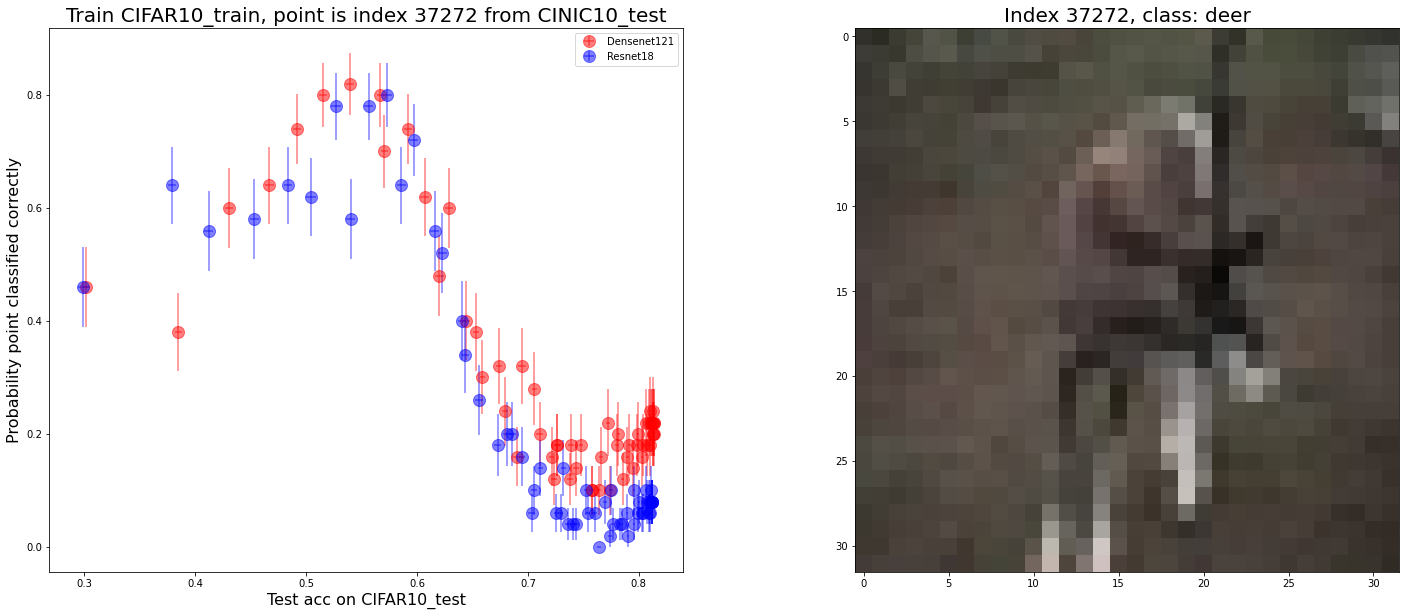

index 86367


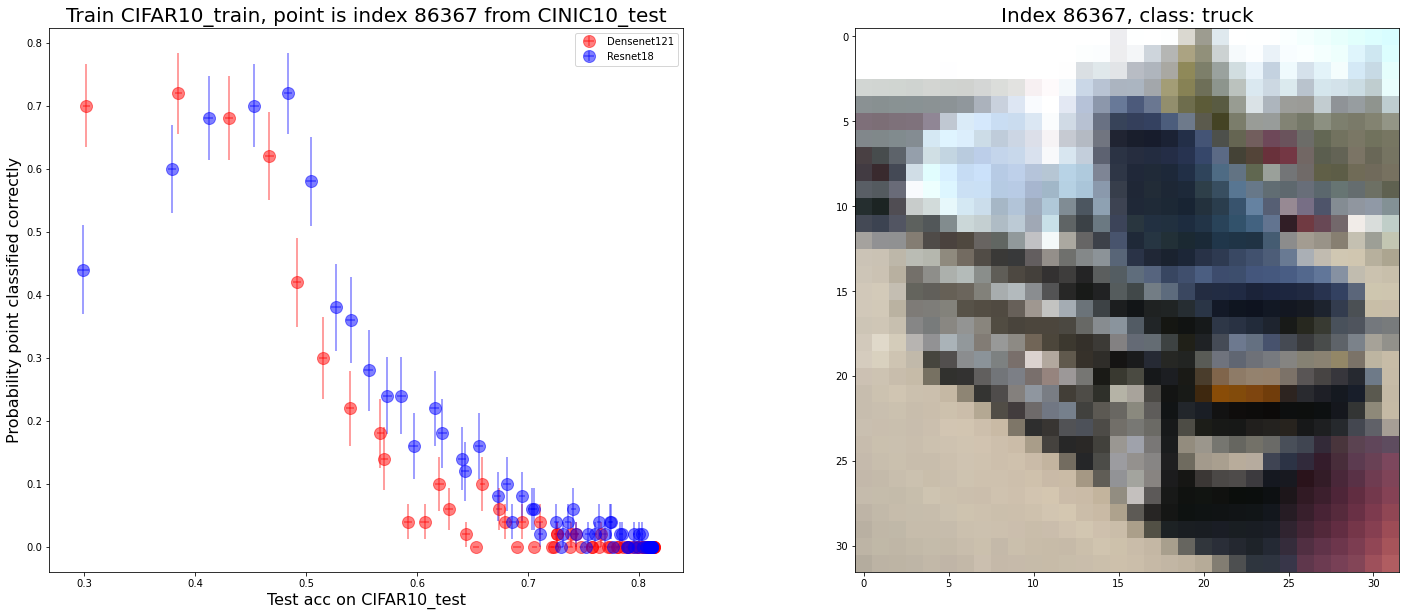

index 32887


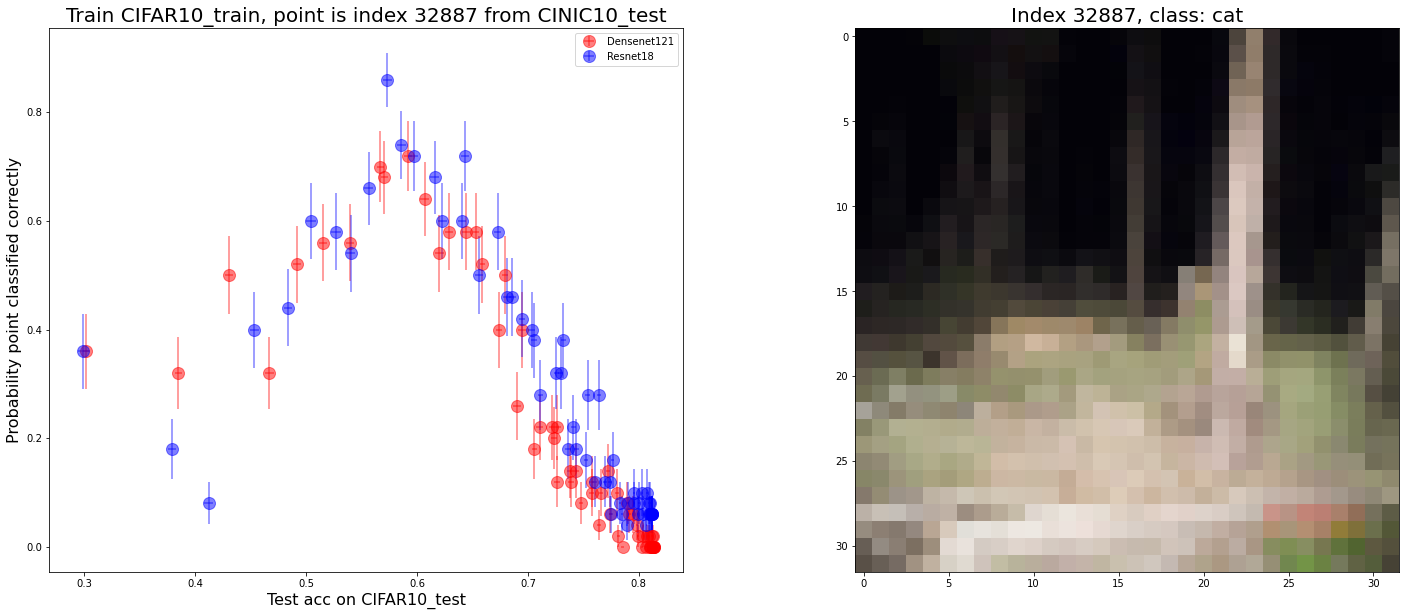

index 78712


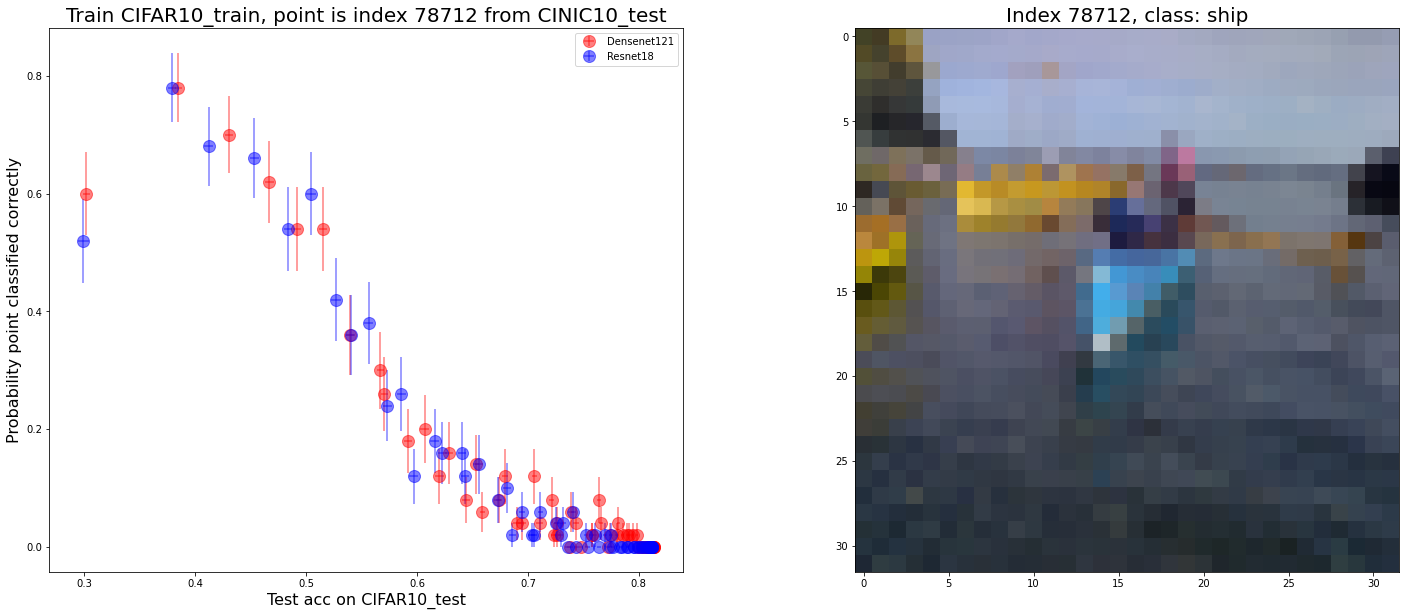

index 86781


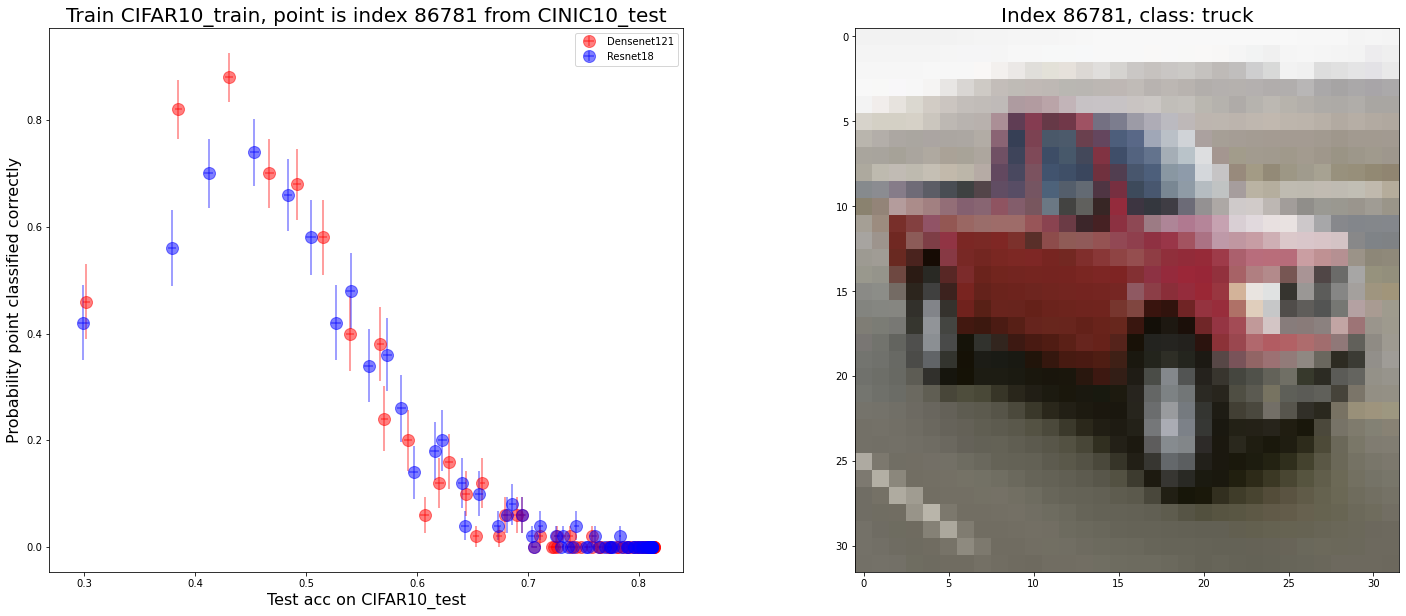

index 77721


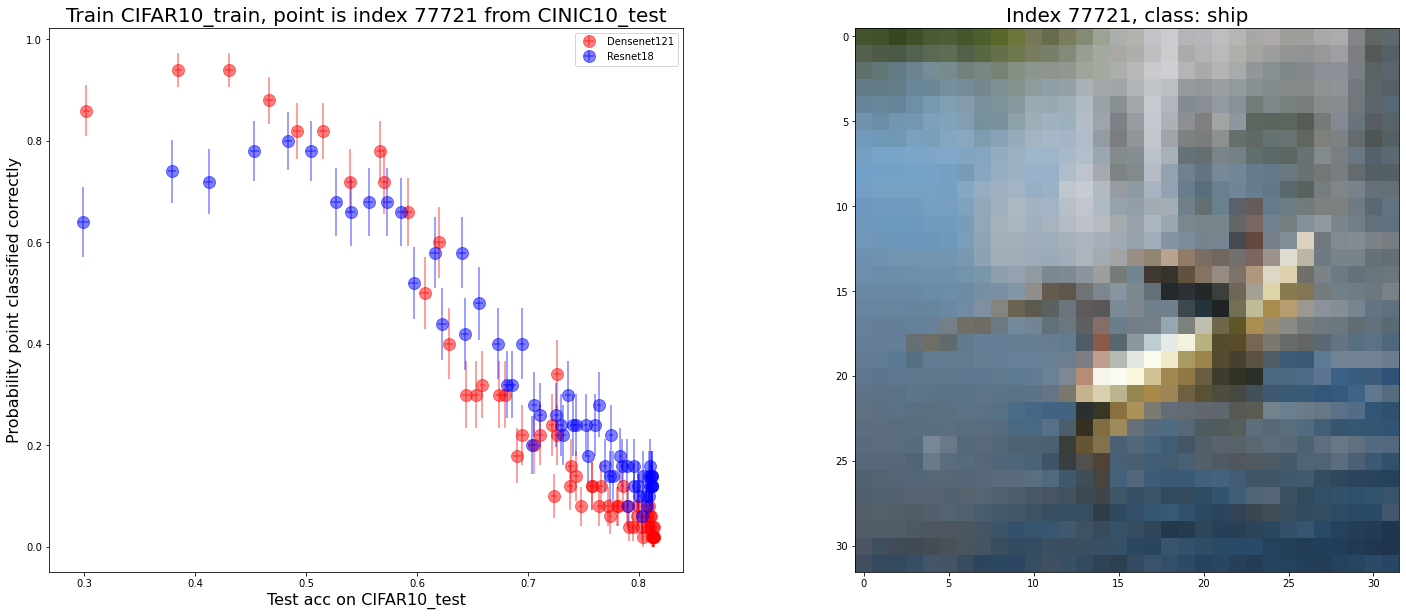

index 39054


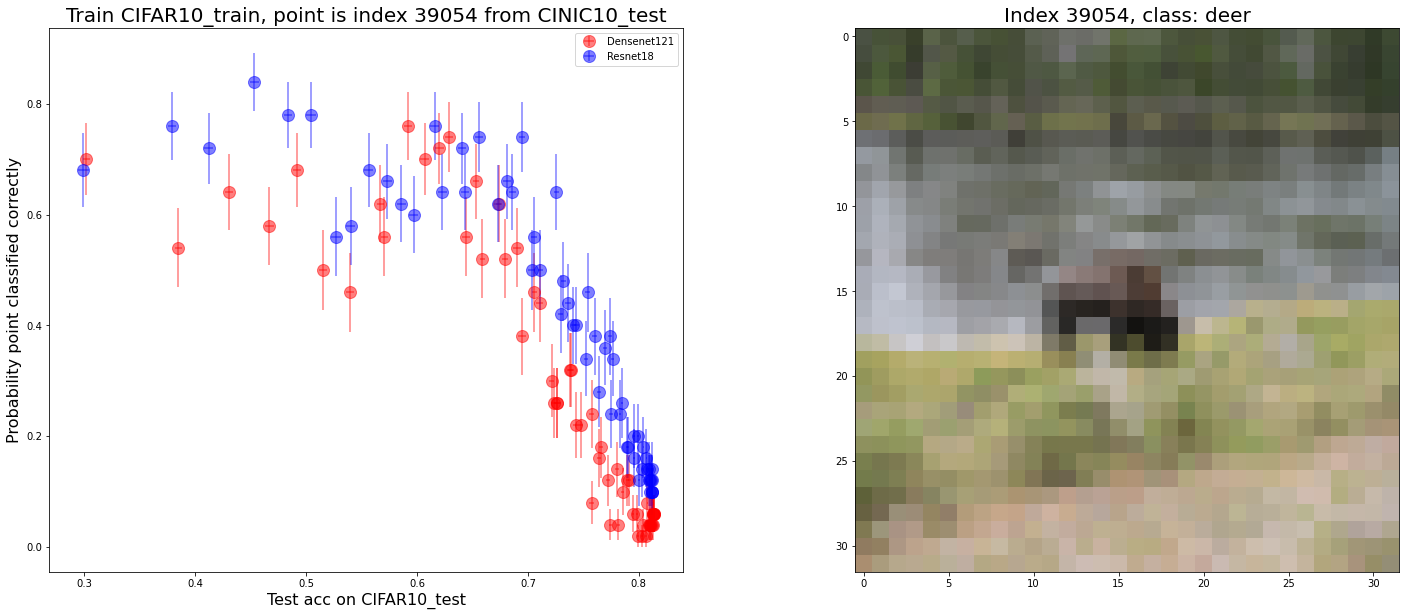

index 11050


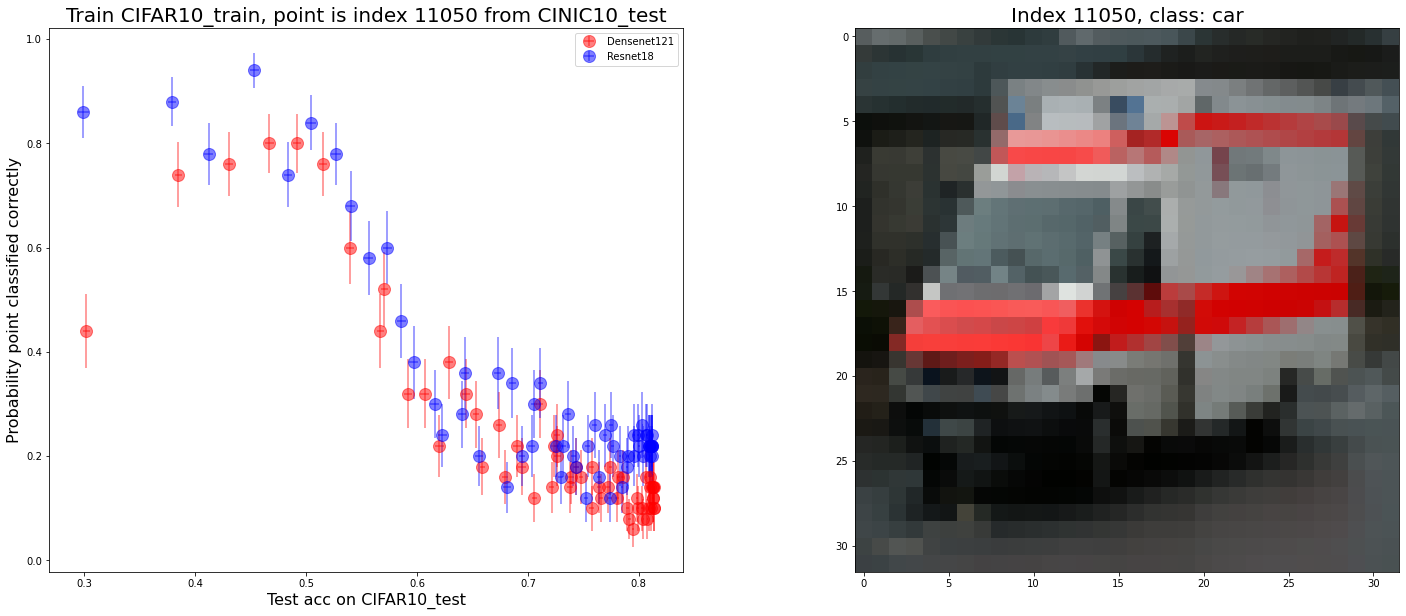

index 77661


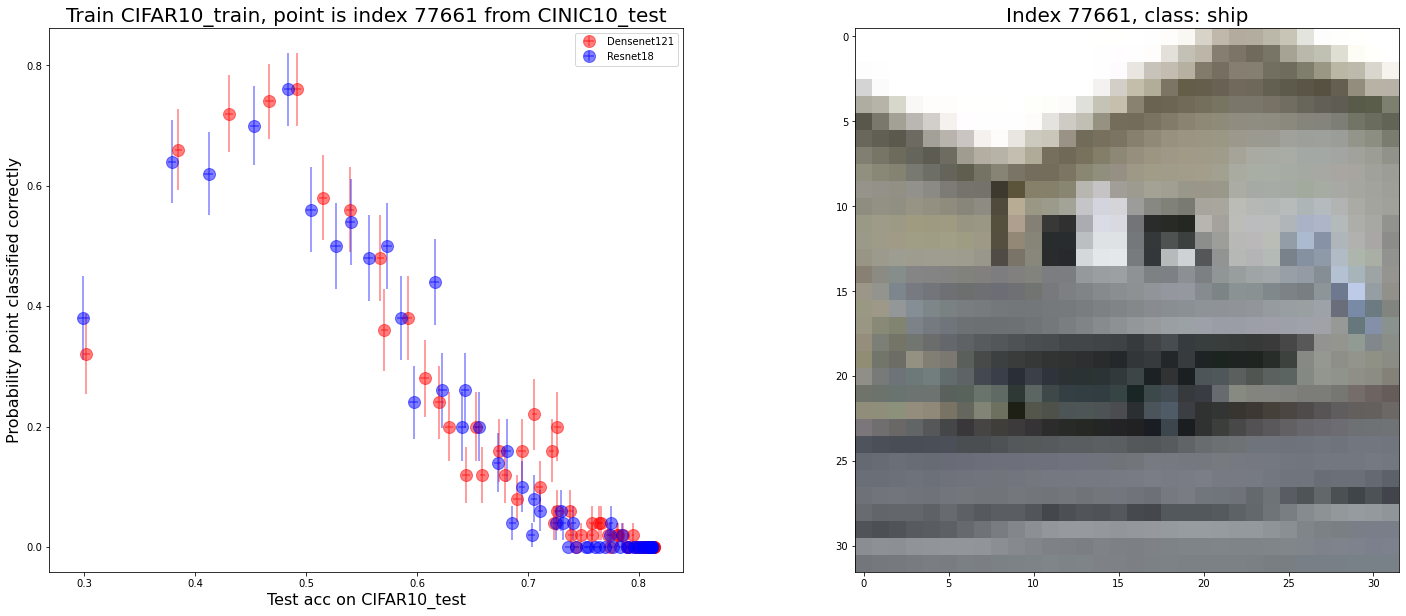

index 76780


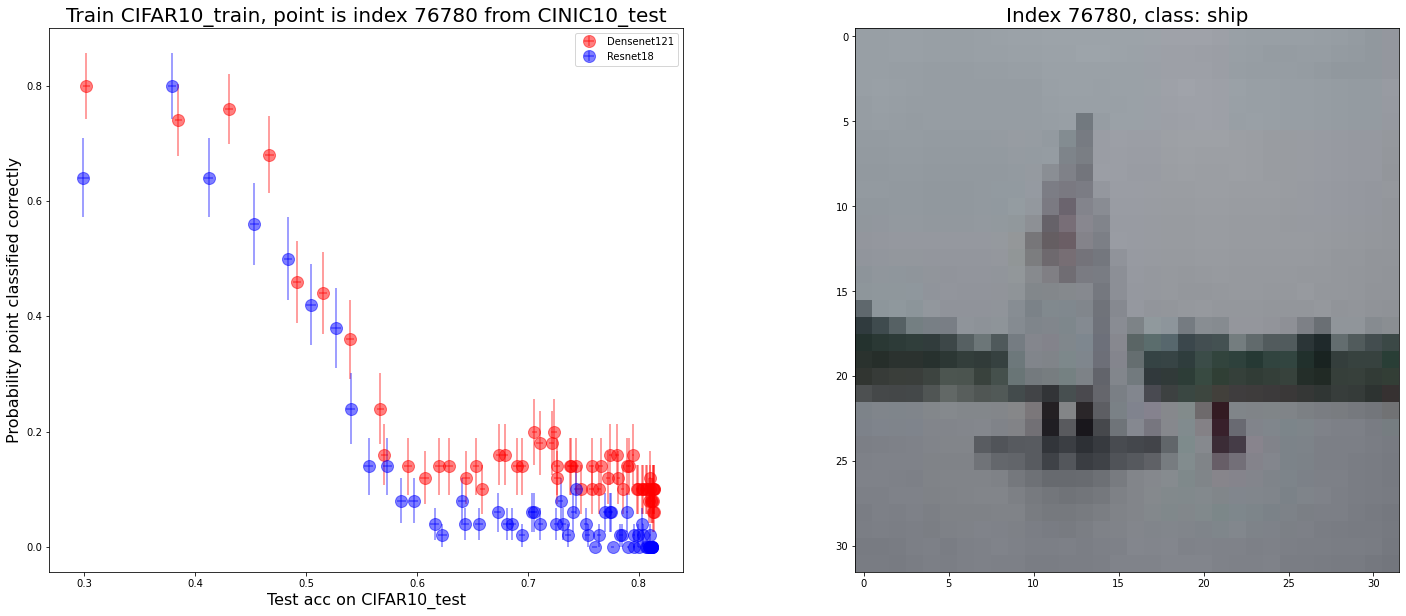

index 70333


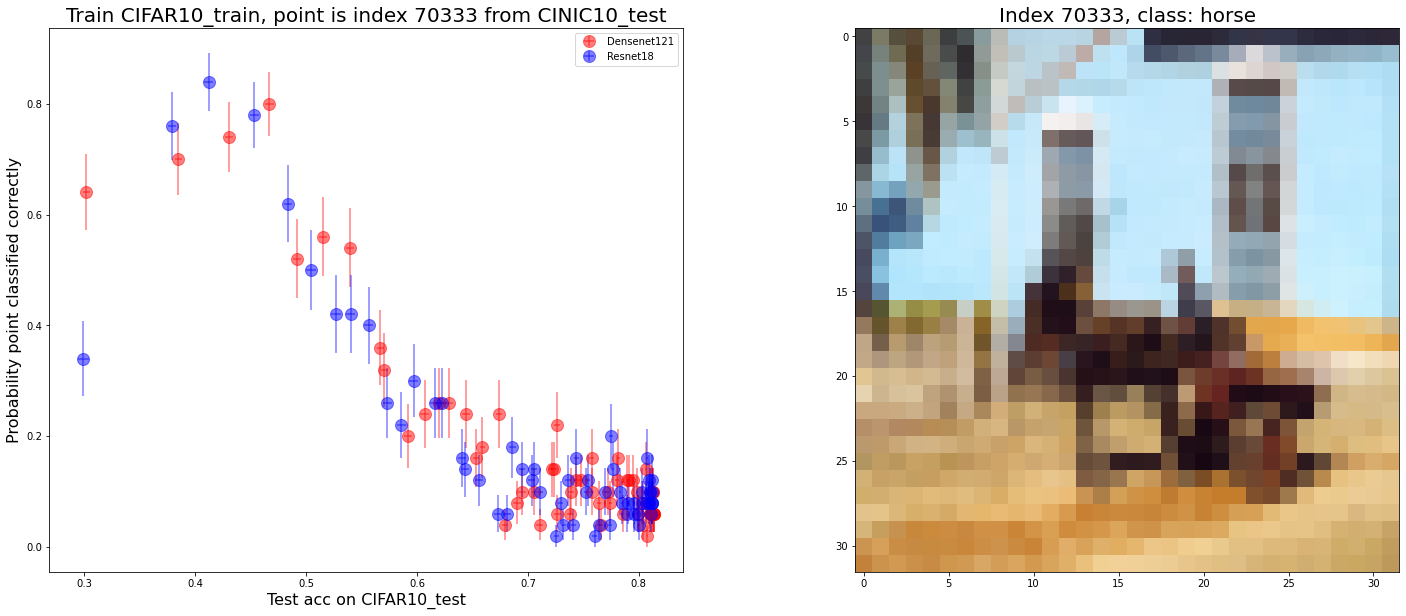

index 12803


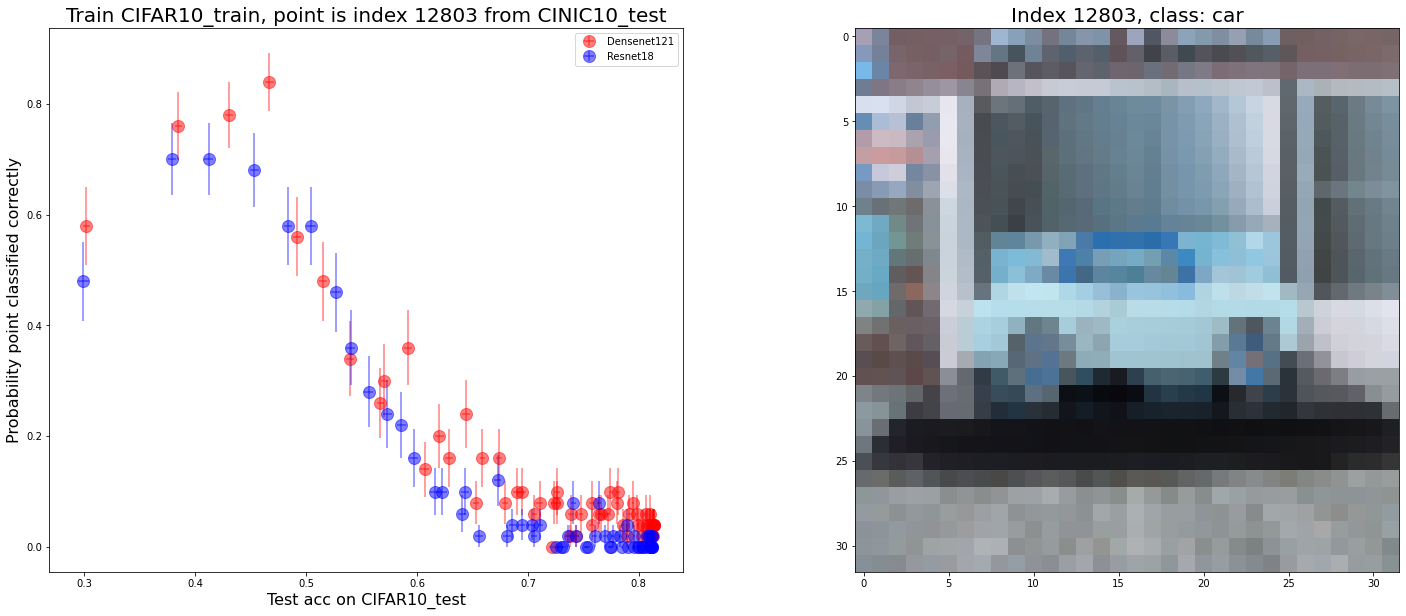

index 77232


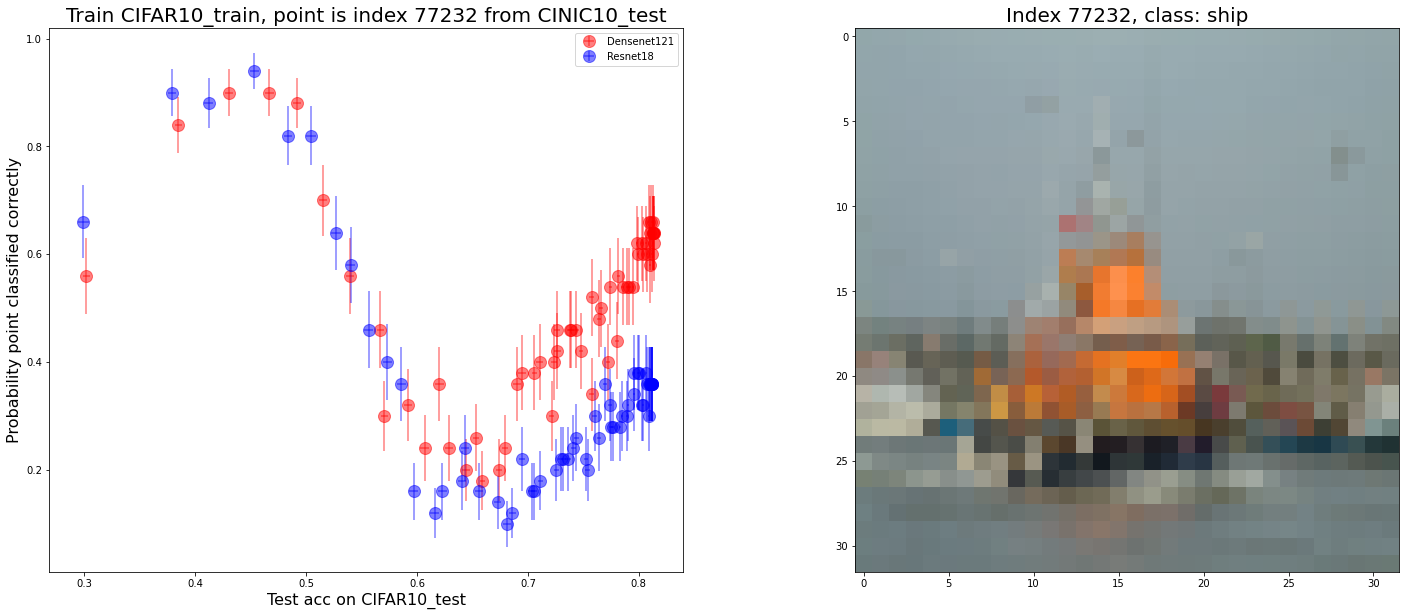

index 51116


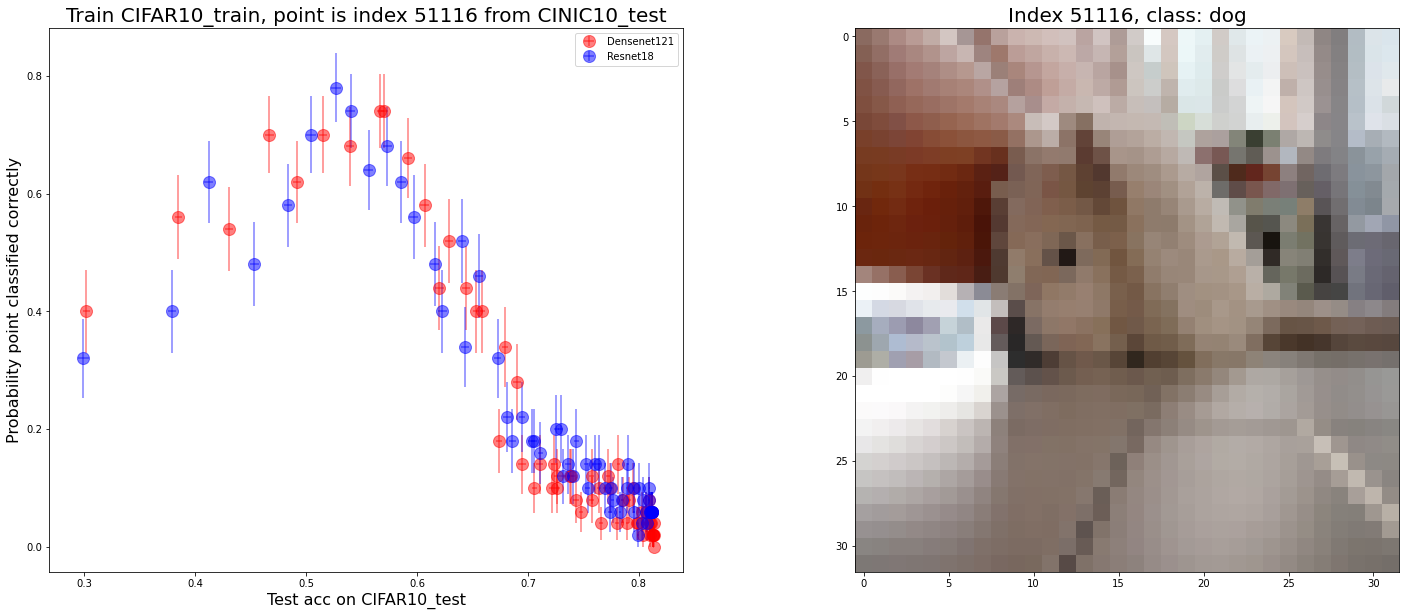

index 58123


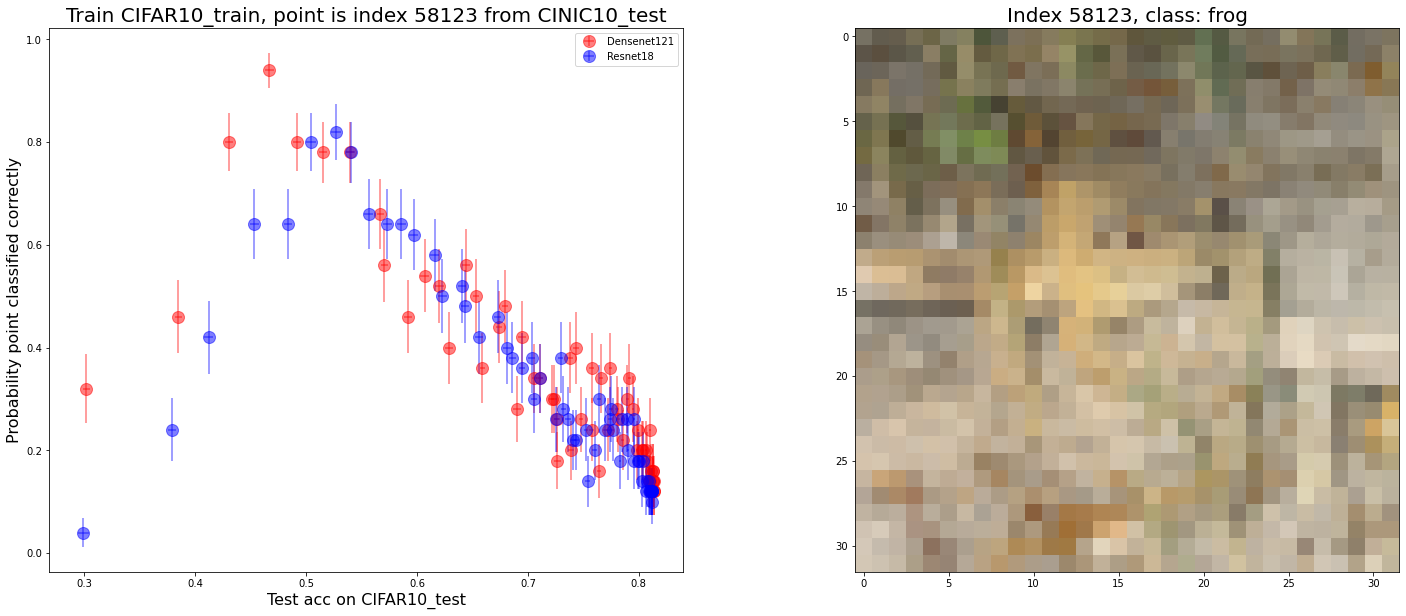

index 75963


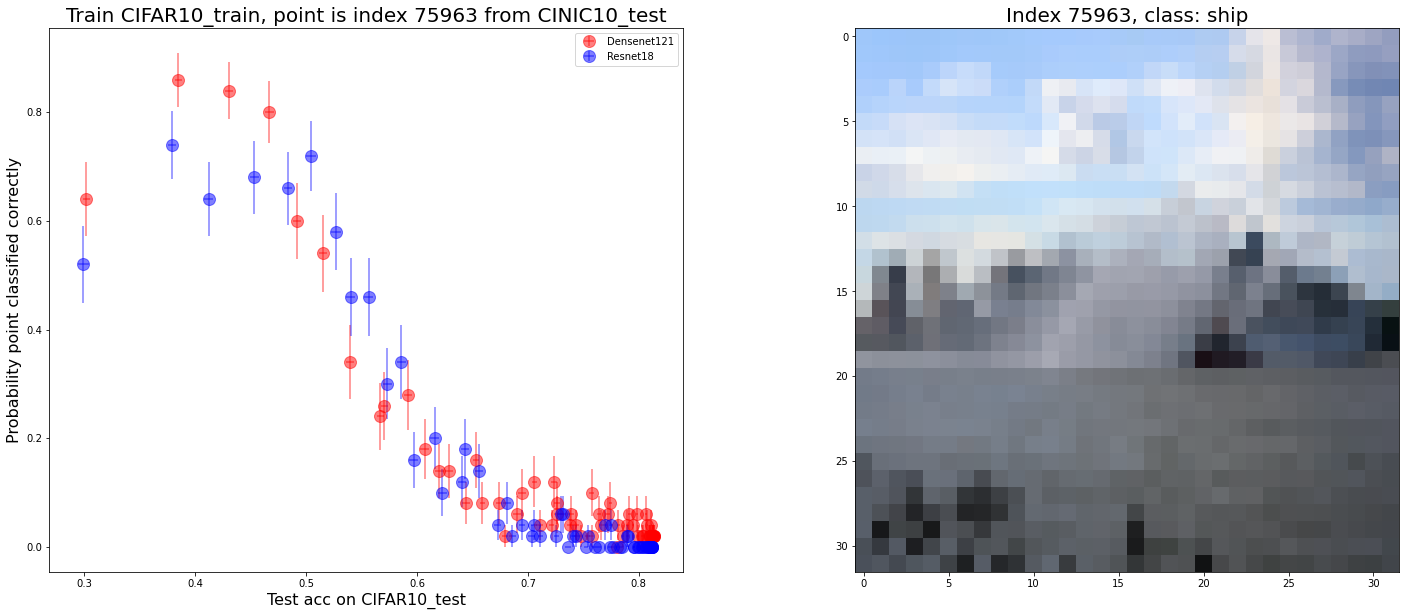

index 58603


KeyboardInterrupt: 

In [3]:
# point plots
for idx in indexes:
    print("index %d" % idx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        ax1.errorbar(
            dct["x"],
            dct["points"][idx], #soft_points
            yerr=dct["points_err"][idx], #soft_points_err
            xerr=dct["x_err"],
            fmt=fmts[plot_group],
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    ax1.set_xlabel("Test acc on %s" % "CIFAR10_test", fontsize=16)
    ax1.set_ylabel("Probability point classified correctly", fontsize=16)
    ax1.set_title(
        "Train %s, point is index %d from %s" % (train_set, idx, name),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset[name].__getitem__(idx)
    img = np.array(img) #.transpose(1,2,0)/255.0
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d, class: %s" % (idx, classes[label]), fontsize=20)
    # plot_path = join(save_dir, name, ind_type)
    # if not os.path.isdir(plot_path):
    #     os.mkdir(plot_path)
    # plt.savefig(join(plot_path, "plot_acc_" + str(idx) + ".png"))
    plt.show()
